# EDA

In [13]:
import pandas as pd
import numpy as np
import os
import warnings
import torch
import torch.utils.data as data
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn,scipy
from pytorch_model_summary import summary
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
plt.rc('font',family='Times New Roman')

## 不同人的电信号分布

In [14]:
num_to_letter = {101: 'A', 102: 'B', 103: 'C', 104: 'D', 105: 'E', 106: 'F', 107: 'G',
                 108: 'H', 109: 'I', 110: 'J', 111: 'K', 112: 'L', 113: 'M', 114: 'N',
                 115: 'O', 116: 'P', 117: 'Q', 118: 'R', 119: 'S', 120: 'T', 121: 'U',
                 122: 'V', 123: 'W', 124: 'X', 125: 'Y', 126: 'Z', 127: '1', 128: '2',
                 129: '3', 130: '4', 131: '5', 132: '6', 133: '7', 134: '8', 135: '9',
                 136: '0'}
letter_to_cr = {'A': [1, 7], 'B': [1, 8], 'C': [1, 9], 'D': [1, 10], 'E': [1, 11], 'F': [1, 12],
                'G': [2, 7], 'H': [2, 8], 'I': [2, 9], 'J': [2, 10], 'K': [2, 11], 'L': [2, 12],
                'M': [3, 7], 'N': [3, 8], 'O': [3, 9], 'P': [3, 10], 'Q': [3, 11], 'R': [3, 12],
                'S': [4, 7], 'T': [4, 8], 'U': [4, 9], 'V': [4, 10], 'W': [4, 11], 'X': [4, 12],
                'Y': [5, 7], 'Z': [5, 8], '1': [5, 9], '2': [5, 10], '3': [5, 11], '4': [5, 12],
                '5': [6, 7], '6': [6, 8], '7': [6, 9], '8': [6, 10], '9': [6, 11], '0': [6, 12]
                }
letter_mat = np.array('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 1 2 3 4 5 6 7 8 9 0'.split()).reshape(6, 6)
select_idx = np.array([ 9, 18,  7,  4,  5,  8, 19,  2,  6, 11, 16,  1,  0, 13,  3])

不同人分布不一样。

In [15]:
def normalize(data):
    data = data.values
    return (data - data.mean())/data.std()

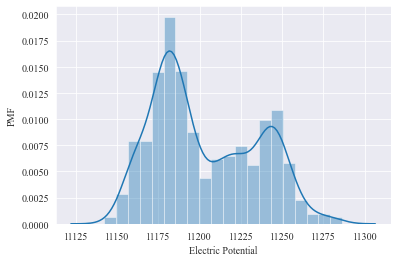

In [74]:
fig = plt.figure()
train = pd.read_excel('./data/S1/S1_test_data.xlsx', header=None, sheet_name=0)
sns.distplot(train[0])
plt.xlabel('Electric Potential')
plt.ylabel('PMF')
save_fig(fig, name='sig_for_dif_peo_1')

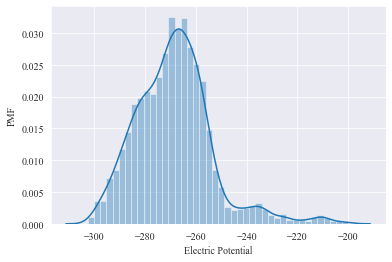

In [76]:
fig = plt.figure()
train = pd.read_excel('./data/S2/S2_test_data.xlsx', header=None, sheet_name=0)
sns.distplot(train[0])
plt.xlabel('Electric Potential')
plt.ylabel('PMF')
save_fig(fig, name='sig_for_dif_peo_2')

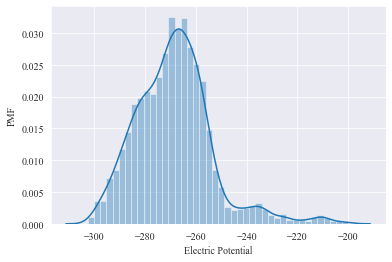

In [77]:
train = pd.read_excel('./data/S2/S2_test_data.xlsx', header=None, sheet_name=0)
fig = plt.figure()
sns.distplot(train[0])
plt.xlabel('Electric Potential')
plt.ylabel('PMF')
save_fig(fig, name='sig_for_same_peo_1')

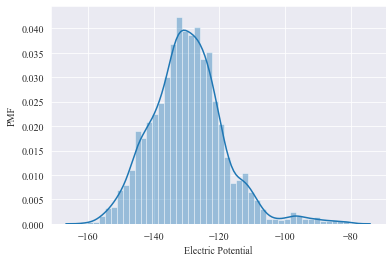

In [78]:
train = pd.read_excel('./data/S2/S2_test_data.xlsx', header=None, sheet_name=1)
fig = plt.figure()
sns.distplot(train[0])
plt.xlabel('Electric Potential')
plt.ylabel('PMF')
save_fig(fig, name='sig_for_same_peo_2')

## 不同字母的电信号

基线漂移，最简单的方法就是分开标准化

In [191]:
df = pd.DataFrame()
for i in range(12):
    train_data = pd.read_excel('./data/S1/S1_train_data.xlsx', header=None, sheet_name=i)
    df[i] = train_data.mean()

In [193]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,10907.096636,11002.290692,11074.119623,11097.904661,11268.482996,11296.372584,11312.931887,11366.829271,11440.929675,11492.305304,11585.346288,11622.594016
1,3887.616408,3775.447474,3598.152111,3108.732001,3014.194221,2913.092499,2834.050399,2729.676585,2601.128452,2431.607004,2383.830399,2303.155866
2,-3791.357972,-3787.953449,-3882.535909,-3879.290862,-3670.127212,-3651.271242,-3646.508972,-3723.002388,-3665.678128,-3685.789470,-3594.960066,-3566.522167
3,5174.845327,5190.676680,5182.638505,5034.922106,5110.554109,5055.746772,5021.058784,4968.144704,4917.810185,4814.204379,4804.378366,4792.113161
4,2613.724678,2645.886624,2681.451779,2590.870446,2746.192861,2783.955485,2867.306559,2967.648855,3046.185591,3058.346664,3218.604557,3296.055978
5,-788.932275,-784.884421,-880.977519,-984.690800,-978.284594,-1082.723657,-1138.128119,-1195.252395,-1267.204547,-1450.587562,-1471.474754,-1493.193019
6,2780.341238,2668.491085,2544.965719,2151.286231,2113.875391,2007.617046,1932.616872,1853.206384,1736.412396,1584.714612,1555.220934,1519.269306
7,810.759822,778.980937,563.881912,393.213445,414.251297,295.670938,186.572180,36.896791,-101.645316,-204.935649,-194.623705,-238.736652
8,504.849817,426.682614,345.783027,33.700081,15.757534,-3.351112,-45.683151,-115.329638,-223.283774,-368.806304,-378.443351,-418.491722
9,-9777.092997,-10028.806551,-10280.312628,-10854.372432,-11147.207201,-11421.901192,-11686.963098,-11835.887382,-12072.681049,-12481.536570,-12745.379153,-12889.281913


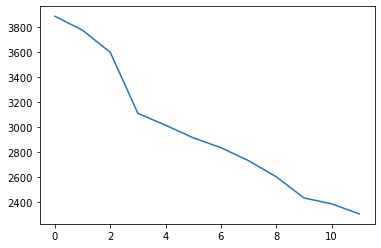

In [199]:
plt.plot(df.iloc[1])

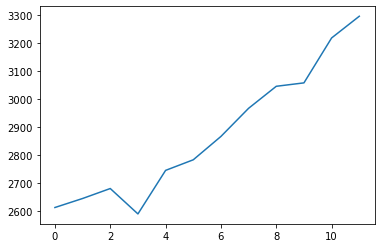

In [198]:
plt.plot(df.iloc[4])

In [201]:
df = pd.DataFrame()
for i in range(9):
    train_data = pd.read_excel('./data/S1/S1_test_data.xlsx', header=None, sheet_name=i)
    df[i] = train_data.mean()

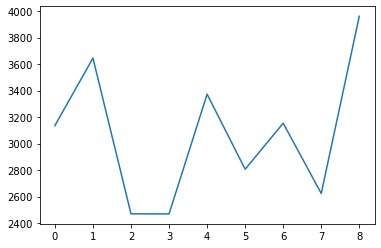

In [202]:
plt.plot(df.iloc[1])

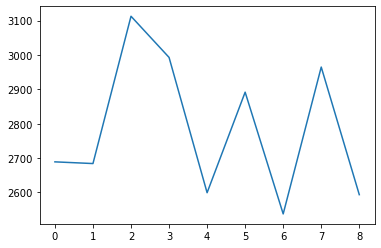

In [203]:
plt.plot(df.iloc[4])

## 标签

In [16]:
num_to_letter = {101: 'A', 102: 'B', 103: 'C', 104: 'D', 105: 'E', 106: 'F', 107: 'G',
                 108: 'H', 109: 'I', 110: 'J', 111: 'K', 112: 'L', 113: 'M', 114: 'N',
                 115: 'O', 116: 'P', 117: 'Q', 118: 'R', 119: 'S', 120: 'T', 121: 'U',
                 122: 'V', 123: 'W', 124: 'X', 125: 'Y', 126: 'Z', 127: '1', 128: '2',
                 129: '3', 130: '4', 131: '5', 132: '6', 133: '7', 134: '8', 135: '9',
                 136: '0'}
letter_to_cr = {'A': [1, 7], 'B': [1, 8], 'C': [1, 9], 'D': [1, 10], 'E': [1, 11], 'F': [1, 12],
                'G': [2, 7], 'H': [2, 8], 'I': [2, 9], 'J': [2, 10], 'K': [2, 11], 'L': [2, 12],
                'M': [3, 7], 'N': [3, 8], 'O': [3, 9], 'P': [3, 10], 'Q': [3, 11], 'R': [3, 12],
                'S': [4, 7], 'T': [4, 8], 'U': [4, 9], 'V': [4, 10], 'W': [4, 11], 'X': [4, 12],
                'Y': [5, 7], 'Z': [5, 8], '1': [5, 9], '2': [5, 10], '3': [5, 11], '4': [5, 12],
                '5': [6, 7], '6': [6, 8], '7': [6, 9], '8': [6, 10], '9': [6, 11], '0': [6, 12]
                }

In [17]:
train_event = pd.read_excel('./data/S1/S1_train_event.xlsx', header=None, sheet_name=0)

In [18]:
tar_letter = num_to_letter[train_event[0][0]]
tar_cr = letter_to_cr[tar_letter]

In [19]:
p300_points = train_event[1][(train_event[0]==tar_cr[0]) | (train_event[0]==tar_cr[1])]

## P300信号查看

去除初始250的点，数据会产生基线漂移，等待处理。

In [157]:
p300_points

2      296
4      383
24    1217
25    1263
29    1396
36    1700
44    2004
49    2221
58    2568
59    2612
Name: 1, dtype: int64

In [104]:
train_data = pd.read_excel('./data/S1/S1_train_data.xlsx', header=None, sheet_name=1)

In [105]:
train_event = pd.read_excel('./data/S1/S1_train_event.xlsx', header=None, sheet_name=1)

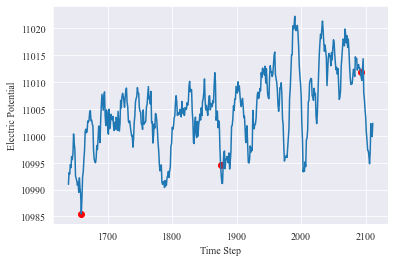

In [81]:
fig = plt.figure()
channel = 0
x = p300_points.values[5:8]
left = x[0]-20
right = x[-1]+20
y = [train_data[channel][i] for i in x]
plt.plot(train_data[channel][left:right])
plt.scatter(x, y, c = 'red')
plt.xlabel('Time Step')
plt.ylabel('Electric Potential')
save_fig(fig, 'p300_peek')

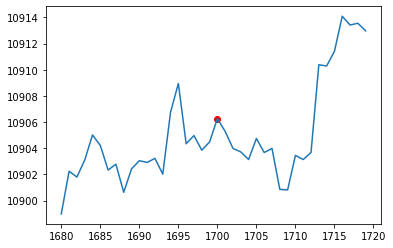

In [182]:
channel = 0
x = p300_points.values[5:6]
left = x[0]-20
right = x[-1]+20
y = [train_data[channel][i] for i in x]
plt.plot(train_data[channel][left:right])
plt.scatter(x, y, c = 'red')

## 基线漂移

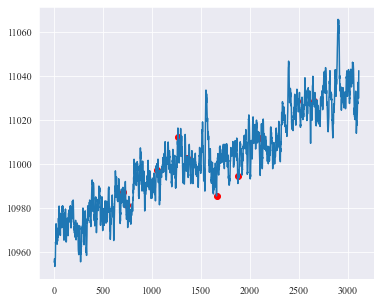

In [152]:
import pywt
train_data = pd.read_excel('./data/S1/S1_train_data.xlsx', header=None, sheet_name=1)
train_event = pd.read_excel('./data/S1/S1_train_event.xlsx', header=None, sheet_name=1)
p300_points = train_event[1][(train_event[0]==tar_cr[0]) | (train_event[0]==tar_cr[1])]
channel = 0
x_p = p300_points.values
left = 0
right = -1
fig = plt.figure(figsize=(6,5))
y_p = [train_data[channel][i] for i in x_p]
plt.plot(train_data[channel][left:right])
plt.scatter(x_p, y_p, c = 'red')
save_fig(fig, 'base_shift')

In [30]:
len(signals)

5

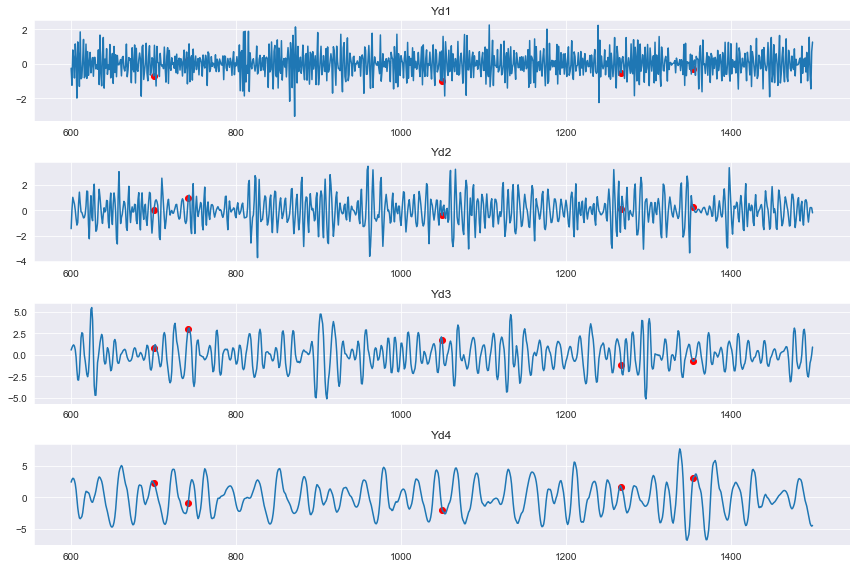

In [31]:
y = signals['yd3']+ signals['yd4']
x = range(len(y))

plt.figure(figsize=(12, 8))
num = len(signals)-1
for i in range(num,0,-1):
    y = signals[f'yd{i}']
    x = range(len(y))
    plot_signal(x, y, x_p, num, i, l = 600, r = 1500, title=f'yd{i}')
    plt.tight_layout()

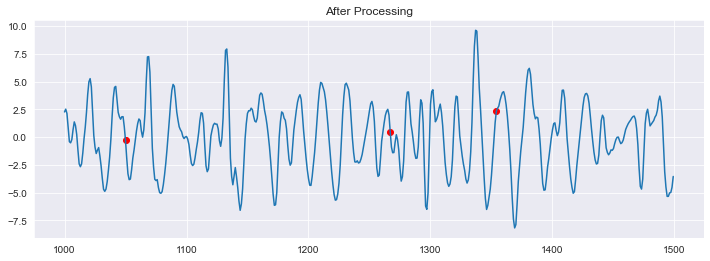

In [32]:
plt.figure(figsize=(12,4))
plot_signal(x, signals['yd3']+signals['yd4'], x_p, 1, 1, l = 1000, r = 1500, title='after processing')

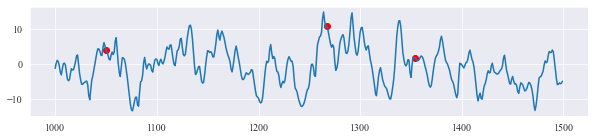

In [120]:
list_ = list(signals.values())[1:-1]
y = np.array(list_).sum(axis=0)
x = range(len(y))
fig = plt.figure(figsize=(10,2))
plot_signal(x, y, x_p, 1, 1, l = 1000, r = 1500, title='')
save_fig(fig, 'pb5_7dec')

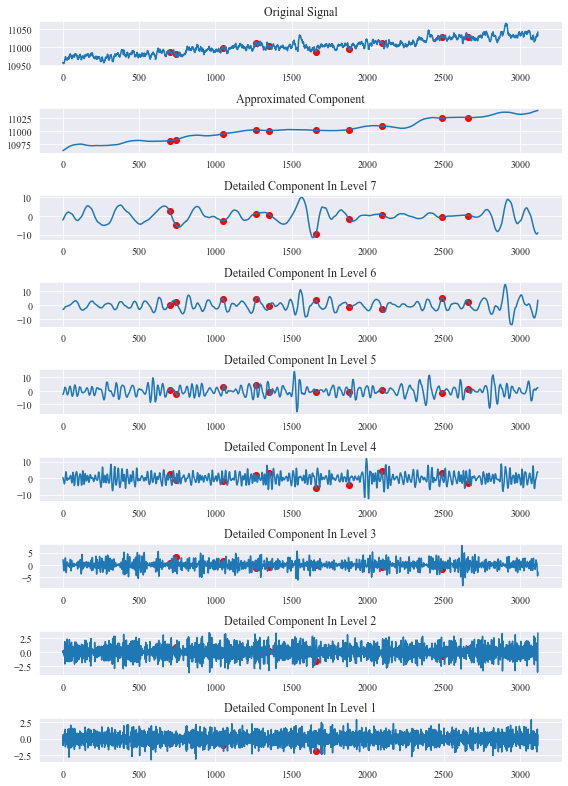

In [119]:
def plot_signal(x, y, x_p, num, i, title='', l=0, r=-1):
    x_p = np.array(x_p)
    if r != -1:
        x_p = x_p[(x_p < r)&(x_p > l)]
    plt.subplot(num, 1, i)
    plt.plot(x[l:r], y[l:r])
    plt.scatter(x_p, [y[j] for j in x_p], c= 'red')
    plt.title(title.title())
def save_fig(fig, name):
    fig.savefig(f'./img/{name}.png', format = 'png', dpi = 300,bbox_inches="tight")
def show_walveles(data, x_p, w_type, level, l = 0, r = -1, if_save = True):
    x = range(len(data))
    y = data
    coeffs = pywt.wavedec(y, w_type, level=level) 
    list_ = []
    idt = np.identity(level+1)
    for i in range(level+1):
        list_.append(pywt.waverec(np.multiply(coeffs, idt[i]).tolist(), w_type))
    fig = plt.figure(figsize=(8,12))
    num = len(list_)
    plot_signal(x, y, x_p, num+2, 1, title= 'Original Signal', l = l, r = r)
    for i in range(2, num+2):
        if i==2:
            plot_signal(x, list_[i-2], x_p, num+2, i, title=f'Approximated Component', l = l, r = r)
        else:
            plot_signal(x, list_[i-2], x_p, num+2, i, title=f'detailed Component in Level {num+2-i}', l = l, r = r)
    plt.tight_layout()
    plt.show()
 
    dict_ = dict(zip(['ya']+['yd'+str(num-i-1) for i in range(num)], list_))
    if if_save:
        fig.savefig('./img/signals_dec.png', format = 'png', dpi = 300,bbox_inches="tight")
    return dict_
signals = show_walveles(train_data[channel][left:right], x_p, 'db5', 7, l = 0, r = -1, if_save = False)

In [523]:
wp = pywt.WaveletPacket(data=train_data[channel][left:right], wavelet='db1',mode='symmetric',maxlevel=7)

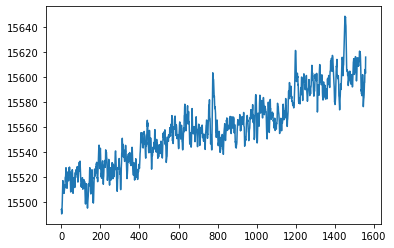

In [530]:
plt.plot(wp['a'].data)

In [553]:
def wpd_plt(signal,n):
    #wpd分解
    wp = pywt.WaveletPacket(data=signal, wavelet='db1',mode='symmetric',maxlevel=n)
 
    #计算每一个节点的系数，存在map中，key为'aa'等，value为列表
    map = {}
    map[1] = signal
    for row in range(1,n+1):
        lev = []
        for i in [node.path for node in wp.get_level(row, 'freq')]:
            map[i] = wp[i].data
 
    #作图
    plt.figure(figsize=(15, 10))
    plt.subplot(n+1,1,1) #绘制第一个图
    plt.plot(map[1])
    for i in range(2,n+2):
        level_num = pow(2,i-1)  #从第二行图开始，计算上一行图的2的幂次方
        #获取每一层分解的node：比如第三层['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']
        re = [node.path for node in wp.get_level(i-1, 'freq')]  
        for j in range(1,level_num+1):
            plt.subplot(n+1,level_num,level_num*(i-1)+j)
            plt.plot(map[re[j-1]]) #列表从0开始

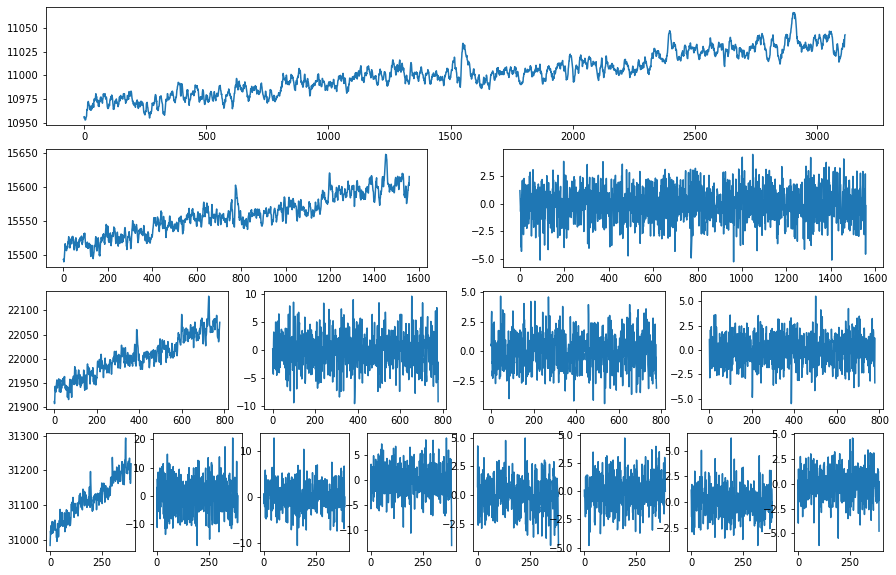

In [555]:
wpd_plt(train_data[channel][left:right],3)

In [635]:
def waverec(vec):
    coeffs = pywt.wavedec(vec, 'db4', level=4) 
    ya4 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist(), 'db4')
    yd4 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist(), 'db4')
    yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0]).tolist(), 'db4')
    yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0]).tolist(), 'db4')
    yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1]).tolist(), 'db4')
    return yd1+yd2+yd3+yd4

In [636]:
train_data[channel]

0       10956.913886
1       10955.259857
2       10956.109223
3       10955.617485
4       10953.516421
            ...     
3112    11029.780568
3113    11036.262574
3114    11042.074027
3115    11042.342248
3116    11042.968097
Name: 0, Length: 3117, dtype: float64

In [640]:
len(waverec(train_data[channel][:-3]))

3114

In [641]:
len(train_data[channel][:-3])

3114

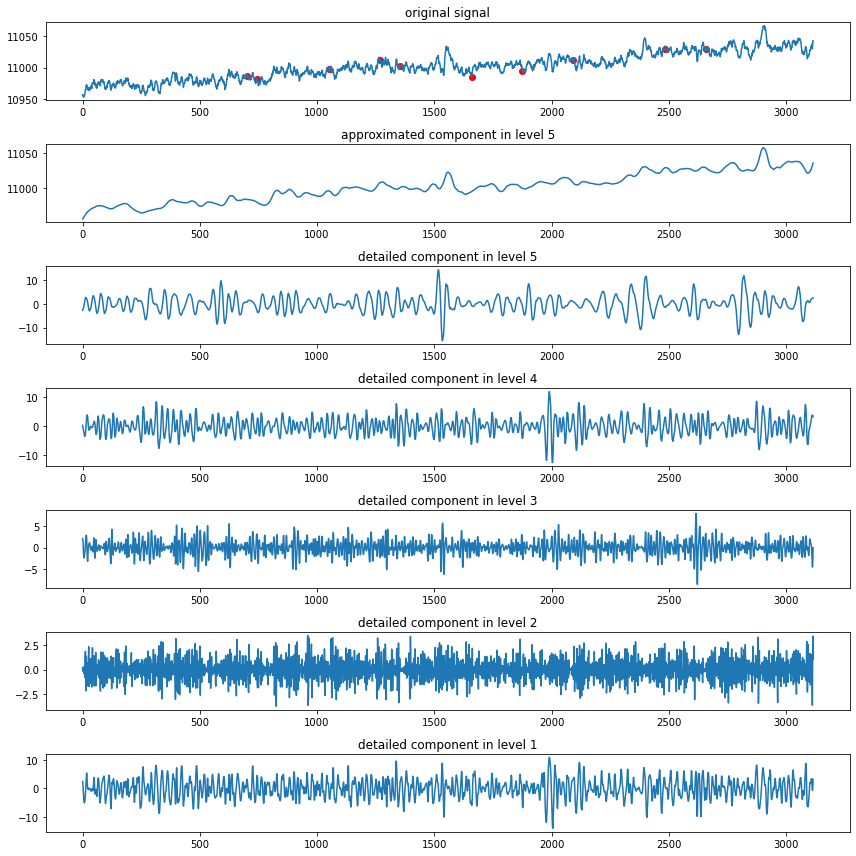

In [518]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

y = train_data[channel][left:right]
x = range(len(y))

coeffs = pywt.wavedec(y, 'db5', level=5) 
ya5 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0, 0]).tolist(), 'db5')
yd5 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0, 0]).tolist(), 'db5')
yd4 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0, 0]).tolist(), 'db5')
yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0, 0]).tolist(), 'db5')
yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1, 0]).tolist(), 'db5')
yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 0, 1]).tolist(), 'db5')


plt.figure(figsize=(12, 12))
plt.subplot(711)
plt.scatter(x_p, y_p, c = 'red')
plt.plot(x, y)
plt.title('original signal')
plt.subplot(712)
plt.plot(x, ya5)
plt.scatter(x_p, [ya5[i] for i in x_p], c = 'red')
plt.title('approximated component in level 5')
plt.subplot(713)
plt.plot(x, yd5)
plt.scatter(x_p, [yd5[i] for i in x_p], c = 'red')
plt.title('detailed component in level 5')
plt.subplot(714)
plt.plot(x, yd4)
plt.scatter(x_p, [yd4[i] for i in x_p], c = 'red')
plt.title('detailed component in level 4')
plt.subplot(715)
plt.plot(x, yd3)
plt.scatter(x_p, [yd3[i] for i in x_p], c = 'red')
plt.title('detailed component in level 3')
plt.subplot(716)
plt.plot(x, yd2)
plt.scatter(x_p, [yd2[i] for i in x_p], c = 'red')
plt.title('detailed component in level 2')
plt.subplot(717)
plt.plot(x, yd1)
plt.scatter(x_p, [yd1[i] for i in x_p], c = 'red')
plt.title('detailed component in level 1')
plt.tight_layout()
plt.show()

In [4]:
len(coeffs[0])

NameError: name 'coeffs' is not defined

In [ ]:
len(train_data[0])

In [ ]:
len(wavervec(train_data[0]))

In [22]:
from sklearn.decomposition import FastICA

In [ ]:
ica = FastICA(n_components=10)
u = ica.fit_transform(y.values.reshape(-1,1))

IndexError: index 10 is out of bounds for axis 0 with size 10

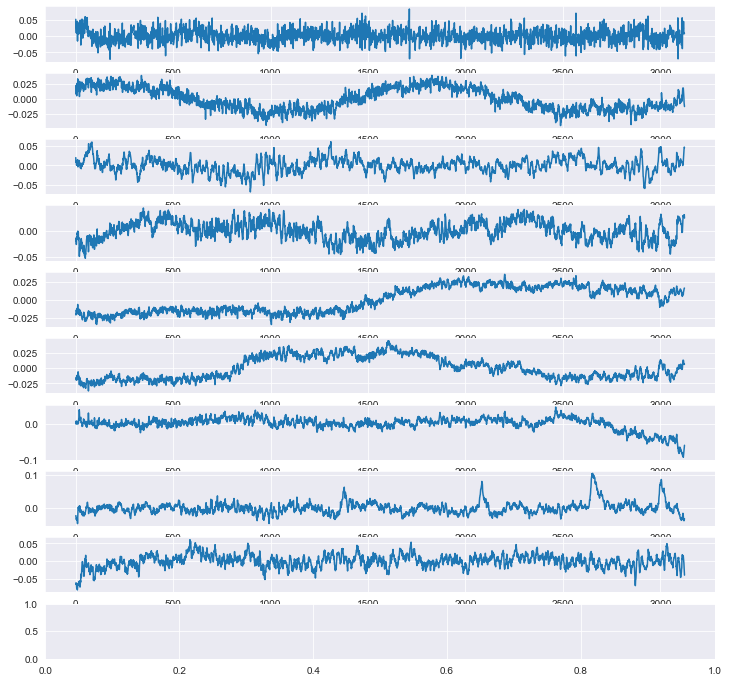

In [35]:
from sklearn.decomposition import FastICA
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('D:/P/kaggle/EEG/data/S1/S1_train_data.xlsx', header = None)
ica = FastICA(n_components=10)
u = ica.fit_transform(df.values)
u = u.T
plt.figure(figsize=(12,12))
for i in range(1, len(u)+1):
    plt.subplot(len(u), 1, i)
    plt.plot(u[i])

# 数据预处理

## 20个信号

In [23]:
def get_transient_data(name):
    train_x = []
    train_y = []
    train_datas = []
    for sheet_idx in range(12):
        train_data = pd.read_excel(f'./data/{name}/{name}_train_data.xlsx', header=None, sheet_name =  sheet_idx)
        train_event = pd.read_excel(f'./data/{name}/{name}_train_event.xlsx', header=None, sheet_name =  sheet_idx)
        # 获得p300的点
        tar_letter = num_to_letter[train_event[0][0]]
        tar_cr = letter_to_cr[tar_letter]
        p300_idx = (train_event[0]==tar_cr[0]) | (train_event[0]==tar_cr[1])
        # 瞬时特征
        x_t = train_data.iloc[train_event[1]]
        y_t = np.zeros(len(x_t), dtype = np.int16)
        y_t[p300_idx] = 1
        train_x.append(x_t)
        train_y.append(y_t)

        train_datas.append(train_data) 
    # 标准化
    train_datas = np.concatenate(train_datas)
    train_x = np.concatenate(train_x)
    train_y = np.concatenate(train_y)
    mean = train_datas.mean(axis = 0)
    std = train_datas.std(axis = 0)
    train_x = (train_x - mean)/std
    # 测试集
    test_x = []

    for sheet_idx in range(12):
        try:
            test_data = pd.read_excel(f'./data/{name}/{name}_test_data.xlsx', header=None, sheet_name =  sheet_idx)
            test_event = pd.read_excel(f'./data/{name}/{name}_test_event.xlsx', header=None, sheet_name =  sheet_idx)
            test_x.append(test_data.iloc[test_event[(test_event[0]!=666) & (test_event[0]!=100)][1]].values)
        except IndexError:
            print(sheet_idx," is not exit")
            break
    test_x = np.concatenate(test_x)
    test_x = (test_x - mean)/std
    return train_x, train_y, test_x

10  is not exit


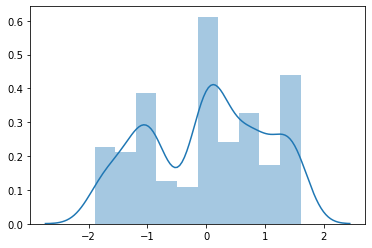

9  is not exit


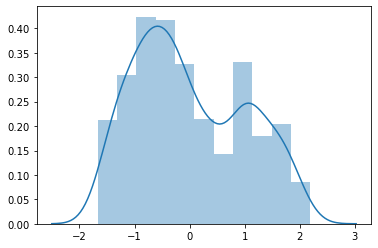

9  is not exit


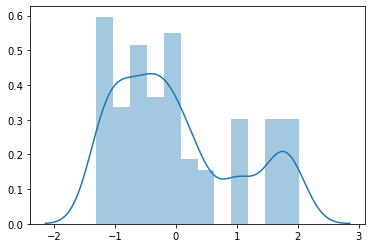

10  is not exit


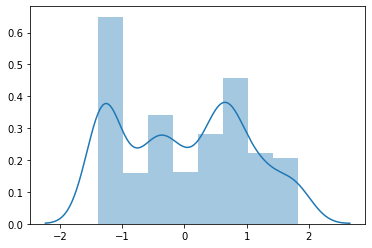

10  is not exit


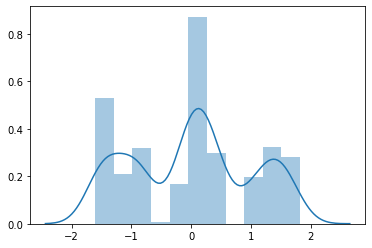

In [312]:
files = ['S1','S2','S3','S4','S5']
train_x,train_y, test_x = [], [], []
for file_ in files:
    train_x_s, train_y_s, test_x_s = get_transient_data(file_)
    sns.distplot(train_x_s[:, 0])
    plt.show()
    train_x.append(train_x_s)
    train_y.append(train_y_s)
    test_x.append(test_x_s)
train_x = np.concatenate(train_x)
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)

In [313]:
np.save('./data/train_x_tst.npy', train_x)
np.save('./data/train_y_tst.npy', train_y)
np.save('./data/test_x_tst.npy', test_x)

<AxesSubplot:>

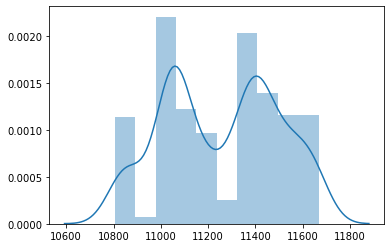

In [300]:
sns.distplot(test_x[:,0])

<AxesSubplot:>

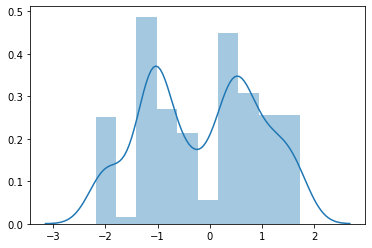

In [302]:
sns.distplot(((test_x-mean)/std)[:,0])

## TS

In [24]:
def ext_ts_data(idx, data):
    x = []
    y = []
    y = np.zeros((len(idx),), dtype = np.int16)
    for i in idx:
        x.append(data[i+50:i+125, :])
    return np.stack(x), y

In [25]:
def get_ts_data(name):
    name = 'S1'
    train_x = []
    train_y = []
    train_datas = []
    aug_datas = []
    for sheet_idx in range(12):
        train_data = pd.read_excel(f'./data/{name}/{name}_train_data.xlsx', header=None, sheet_name =  sheet_idx)
        train_event = pd.read_excel(f'./data/{name}/{name}_train_event.xlsx', header=None, sheet_name =  sheet_idx)
        # 获得p300的点
        tar_letter = num_to_letter[train_event[0][0]]
        tar_cr = letter_to_cr[tar_letter]
        p300_idx = (train_event[0]==tar_cr[0]) | (train_event[0]==tar_cr[1])
        # 提取ts数据
        x_t, y_t = ext_ts_data(train_event[1],train_data.values)
        y_t[p300_idx] = 1
        train_x.append(x_t)
        train_y.append(y_t)

        train_datas.append(train_data) 
        # 保存aug数据
        aug_idx = np.ones((len(train_data), ), dtype=np.int8)
        aug_idx[train_event[1].values] = 0
        aug_data = train_data[aug_idx==1]
        aug_datas.append(aug_data)

    train_datas = np.concatenate(train_datas)
    train_x = np.concatenate(train_x)
    train_y = np.concatenate(train_y)
    mean = train_datas.mean(axis = 0)
    std = train_datas.std(axis = 0)
    # 测试集
    test_x = []
    for sheet_idx in range(12):
        try:
            test_data = pd.read_excel(f'./data/{name}/{name}_test_data.xlsx', header=None, sheet_name =  sheet_idx)
            test_event = pd.read_excel(f'./data/{name}/{name}_test_event.xlsx', header=None, sheet_name =  sheet_idx)
            idx = test_event[(test_event[0]!=666) & (test_event[0]!=100)][1]
            test_x.append(ext_ts_data(idx,test_data.values)[0])
            # 保存aug数据
            aug_idx = np.ones((len(test_data), ), dtype=np.int8)
            aug_idx[test_event[1].values] = 0
            aug_data = test_data[aug_idx==1]
            aug_datas.append(aug_data)
        except IndexError:
            print(sheet_idx," is not exit")
            break
    test_x = np.concatenate(test_x)
    aug_datas = np.concatenate(aug_datas)
    # 标准化
    train_x = (train_x - mean)/std
    test_x = (test_x - mean)/std
    aug_datas = (aug_datas - mean)/std
    print(train_x.shape, test_x.shape, aug_datas.shape)
    return train_x,train_y, test_x, aug_datas


In [535]:
files = ['S1','S2','S3','S4','S5']
train_x,train_y, test_x, aug_datas = [], [], [], []
for file_ in files:
    train_x_s, train_y_s, test_x_s,aug_data = get_ts_data(file_)
#     sns.distplot(train_x_s[:, 0])
#     plt.show()
    train_x.append(train_x_s)
    train_y.append(train_y_s)
    test_x.append(test_x_s)
    aug_datas.append(aug_data)
train_x = np.concatenate(train_x)
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)
aug_datas = np.concatenate(aug_datas)

10  is not exit
(792, 75, 20) (600, 75, 20) (67082, 20)
10  is not exit
(792, 75, 20) (600, 75, 20) (67082, 20)
10  is not exit
(792, 75, 20) (600, 75, 20) (67082, 20)
10  is not exit
(792, 75, 20) (600, 75, 20) (67082, 20)
10  is not exit
(792, 75, 20) (600, 75, 20) (67082, 20)


In [536]:
print(train_x.shape, train_y.shape, test_x.shape, aug_datas.shape)
np.save('./data/train_x_ts.npy', train_x)
np.save('./data/train_y_ts.npy', train_y)
np.save('./data/test_x_ts.npy', test_x)
np.save('./data/aug_data_ts.npy', aug_datas)

(3960, 75, 20) (3960,) (3000, 75, 20) (335410, 20)


## Walvelets

In [26]:
def waverec(vec):
    coeffs = pywt.wavedec(vec, 'db5', level=5) 
    ya5 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0, 0]).tolist(), 'db5')
    yd5 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0, 0]).tolist(), 'db5')
    yd4 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0, 0]).tolist(), 'db5')
    yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0, 0]).tolist(), 'db5')
    yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1, 0]).tolist(), 'db5')
    yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 0, 1]).tolist(), 'db5')
    return yd4+yd5
#     return yd5+yd3+yd4+yd2

def waverdf(df):
    if len(df)%2!=0:
        df = df.iloc[:-1]
    for col in df.columns:
        df[col] = waverec(df[col])
    return df

In [27]:
def get_ts_data(name):
    train_x = []
    train_y = []
    train_datas = []
    aug_datas = []
    for sheet_idx in range(12):
        train_data = pd.read_excel(f'./data/{name}/{name}_train_data.xlsx', header=None, sheet_name =  sheet_idx)
        train_event = pd.read_excel(f'./data/{name}/{name}_train_event.xlsx', header=None, sheet_name =  sheet_idx)
        train_data = waverdf(train_data)
        # 获得p300的点
        tar_letter = num_to_letter[train_event[0][0]]
        tar_cr = letter_to_cr[tar_letter]
        p300_idx = (train_event[0]==tar_cr[0]) | (train_event[0]==tar_cr[1])
        # 提取ts数据
        x_t, y_t = ext_ts_data(train_event[1],train_data.values)
        y_t[p300_idx] = 1
        train_x.append(x_t)
        train_y.append(y_t)

        train_datas.append(train_data) 
        # 保存aug数据
        aug_idx = np.ones((len(train_data), ), dtype=np.int8)
        aug_idx[train_event[1].values] = 0
        aug_data = train_data[aug_idx==1]
        aug_datas.append(aug_data)

    train_datas = np.concatenate(train_datas)
    train_x = np.concatenate(train_x)
    train_y = np.concatenate(train_y)
    mean = train_datas.mean(axis = 0)
    std = train_datas.std(axis = 0)
    # 测试集
    test_x = []
    for sheet_idx in range(12):
        try:
            test_data = pd.read_excel(f'./data/{name}/{name}_test_data.xlsx', header=None, sheet_name =  sheet_idx)
            test_event = pd.read_excel(f'./data/{name}/{name}_test_event.xlsx', header=None, sheet_name =  sheet_idx)
            test_data = waverdf(test_data)
            idx = test_event[(test_event[0]!=666) & (test_event[0]!=100)][1]
            test_x.append(ext_ts_data(idx,test_data.values)[0])
            # 保存aug数据
            aug_idx = np.ones((len(test_data), ), dtype=np.int8)
            aug_idx[test_event[1].values] = 0
            aug_data = test_data[aug_idx==1]
            aug_datas.append(aug_data)
        except IndexError:
            print(sheet_idx," is not exit")
            break
    test_x = np.concatenate(test_x)
    aug_datas = np.concatenate(aug_datas)
    # 标准化
    train_x = (train_x - mean)/std
    test_x = (test_x - mean)/std
    aug_datas = (aug_datas - mean)/std
    print(train_x.shape, test_x.shape, aug_datas.shape)
    return train_x,train_y, test_x, aug_datas

In [665]:
files = ['S1','S2','S3','S4','S5']
train_x,train_y, test_x, aug_datas = [], [], [], []
for file_ in files:
    print(file_)
    train_x_s, train_y_s, test_x_s,aug_data = get_ts_data(file_)
#     sns.distplot(train_x_s[:, 0])
#     plt.show()
    train_x.append(train_x_s)
    train_y.append(train_y_s)
    test_x.append(test_x_s)
    aug_datas.append(aug_data)
train_x = np.concatenate(train_x)
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)
aug_datas = np.concatenate(aug_datas)

S1
10  is not exit
(792, 75, 20) (600, 75, 20) (67068, 20)
S2
9  is not exit
(792, 75, 20) (540, 75, 20) (63992, 20)
S3
9  is not exit
(792, 75, 20) (540, 75, 20) (63910, 20)
S4
10  is not exit
(792, 75, 20) (600, 75, 20) (66918, 20)
S5
10  is not exit
(792, 75, 20) (600, 75, 20) (67056, 20)


In [666]:
print(train_x.shape, train_y.shape, test_x.shape, aug_datas.shape)
np.save('./data/train_x_ts_w_45.npy', train_x)
np.save('./data/train_y_ts_w_45.npy', train_y)
np.save('./data/test_x_ts_w_45.npy', test_x)
np.save('./data/aug_data_ts_w_45.npy', aug_datas)

(3960, 75, 20) (3960,) (2880, 75, 20) (328944, 20)


# Model

## TS  Model

In [28]:
import torch.nn as nn
import time
DEVICE = torch.device('cuda')

In [29]:
class EggTSTDataset(data.Dataset):
    def __init__(self, x, y = None, mode = 'train'):
        self.mode = mode
        self.x = x
        self.y = y
        
    def init_data(self):
        pass
        
    def __getitem__(self, i):
        if self.mode == 'eval':
            return self.x[i]
        return self.x[i], self.y[i]
    
    def __len__(self):
        return len(self.x)
    
class EggTSAugDataset(data.Dataset):
    def __init__(self, train_x, train_y, test_x, aug_data):
        # train + test
        self.x_base = np.concatenate([train_x, test_x])
        self.y_base = np.ones((len(train_y)+len(test_x),), dtype=np.int16)
        self.aug_data = aug_data
        self.init_data()
        
    def init_data(self):
        aug_idx = np.arange(len(self.aug_data))[:-126]
        np.random.shuffle(aug_data)
        aug_idx = aug_idx[:len(self.y_base) * 2]
        x_aug, y_aug = ext_ts_data(aug_idx, aug_data)
#         print(x_aug.shape)
        self.x = np.concatenate([self.x_base,x_aug])
        self.y = np.concatenate([self.y_base, y_aug])
        
    def __getitem__(self, i):
        
        return self.x[i], self.y[i]
    
    def __len__(self):
        return len(self.x)

In [30]:
class TSModel(nn.Module):
    def __init__(self, input_dim = 20):
        super(TSModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, num_layers = 2, dropout = 0.5, batch_first = True, bidirectional = True)
        self.fc = nn.Sequential(
            nn.Linear(128, 2)
        )

    def forward(self, x):
        out,_ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [31]:
print(summary(TSModel(), torch.zeros(5,75,20), show_input = True, show_hierarchical =True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
            LSTM-1         [5, 75, 20]         143,360         143,360
          Linear-2            [5, 128]             258             258
Total params: 143,618
Trainable params: 143,618
Non-trainable params: 0
-----------------------------------------------------------------------


========================================= Hierarchical Summary =========================================

TSModel(
  (lstm): LSTM(20, 64, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True), 143,360 params
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=2, bias=True), 258 params
  ), 258 params
), 143,618 params





In [32]:
def run_epoch(model, dataloader, loss_func, optimizer = None, mode = 'eval'):
    acc_w = 0.0 
    acc = 0.0
    loss = 0.0
    preds = []
    probs = []
    if mode == 'eval':
        model.eval()
        with torch.no_grad():
            for i, (x_batch, y_batch) in enumerate(dataloader): 
#                 print(f'Evaling {i}/{len(dataloader)}', end='\r')
                x_batch = x_batch.float().to(DEVICE)
                y_batch = y_batch.long().to(DEVICE)
                # forward
                pred_batch = model(x_batch) 
                loss_batch = loss_func(pred_batch, y_batch)
                # log
                pred = pred_batch.argmax(dim = 1).cpu().numpy()
                prob = pred_batch.detach().cpu().numpy()
                preds.append(pred)
                probs.append(prob)
                # weighted acc
                y_label = y_batch.cpu().numpy()
                acc_t = np.sum(y_label[y_label==0]==pred[y_label==0])/(np.sum(y_label==0)+1e-13) + np.sum(y_label[y_label==1]==pred[y_label==1])/(np.sum(y_label==1)+1e-13)
                acc_w += acc_t/2
                acc += np.sum(pred == y_batch.cpu().numpy()) 
                loss += loss_batch.detach().cpu().numpy() * len(y_batch)  

    else:
        model.train()
        for i, (x_batch, y_batch) in enumerate(dataloader): 
#             print(f'Training {i}/{len(dataloader)}', end='\r')
            x_batch = x_batch.float().to(DEVICE)
            y_batch = y_batch.long().to(DEVICE)
            # forward
            pred_batch = model(x_batch) 
            loss_batch = loss_func(pred_batch, y_batch)
            # backward
            optimizer.zero_grad() 
            loss_batch.backward()
            optimizer.step()
            # log
            pred = pred_batch.argmax(dim = 1).cpu().numpy()
            prob = pred_batch.detach().cpu().numpy()
            preds.append(pred)
            probs.append(prob)

            acc += np.sum(pred == y_batch.cpu().numpy())
            
            y_label = y_batch.cpu().numpy()
            acc_t = np.sum(y_label[y_label==0]==pred[y_label==0])/(np.sum(y_label==0)+1e-13) + np.sum(y_label[y_label==1]==pred[y_label==1])/(np.sum(y_label==1)+1e-13)
            acc_w += acc_t/2
            loss += loss_batch.detach().cpu().numpy() * len(y_batch)
       
    return acc / len(dataloader.dataset),acc_w / len(dataloader), loss / len(dataloader.dataset), np.concatenate(preds), np.concatenate(probs)

def training(model, train_loader, test_loader, optimizer, num_epoch = 10, lr = 1e-3,
                 if_save = False, save_path = './model', save_name = 'best.model',loss_func = nn.CrossEntropyLoss()):
    
#     optimizer = torch.optim.Adam(model.parameters(), lr = lr) # optim take charge of gradient descent
#     optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum=0.9)
    # log
#     mkdir_p(save_path)
    logs ={'time':[], 'train_loss': [], 'train_acc':[], 'val_loss':[], 'val_acc': [], 'train_acc_w':[], 'val_acc_w':[]}
    best = 0
    for epoch in range(num_epoch):
        epoch_start_time = time.time() 
        # renew normal samples in train_loader 
        train_loader.dataset.init_data()
        # train
        train_acc,train_acc_w, train_loss,_,probs = run_epoch(model, train_loader, loss_func, optimizer=optimizer, mode='train')
#         print(probs)
        # val
        val_acc, val_acc_w, val_loss, preds, _ = run_epoch(model, test_loader, loss_func)
#         print(preds)
        
        # print log
        logs['time'].append(time.time()-epoch_start_time)
        logs['train_acc'].append(train_acc)
        logs['train_loss'].append(train_loss)
        logs['val_acc'].append(val_acc)
        logs['val_loss'].append(val_loss) 
        logs['train_acc_w'].append(train_acc_w)
        logs['val_acc_w'].append(val_acc_w)


        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.5f Loss: %3.6f | Val Acc: %3.5f loss: %3.4f\n >                    Train Accw: %3.5f Val Accw: %3.5f' % \
                (epoch + 1, num_epoch,  logs['time'][-1], \
                train_acc , train_loss, val_acc, val_loss, train_acc_w, val_acc_w))
        if val_acc_w > best:
            best = val_acc_w
            if if_save:
                print("Saving with acc : {}".format(val_acc_w))
                torch.save(model, os.path.join(save_path, f'{save_name}_best.model'))
    if if_save:
        np.save(os.path.join(save_path, f'{save_name}_best_log.npy'), logs)
    return best

def training_kfold(train_x, train_y, num_epoch = 10, 
                 if_save = False, lr=1e-3, kfold_n = 5, loss_func= nn.CrossEntropyLoss(), batch_size = 16, save_path = './model', save_name = 'best.model'):

    kfold = KFold(n_splits=kfold_n, shuffle = True)
    kfold_acc = []
    for i,(train_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
        train_x_fold = train_x[train_idx]
        val_x_fold = train_x[val_idx]
        train_y_fold = train_y[train_idx]
        val_y_fold = train_y[val_idx]
        
#         idx = np.concatenate([np.where(train_y_fold==0)[0][:500], np.where(train_y_fold==1)[0]])
#         train_x_fold = train_x_fold[idx]
#         train_y_fold = train_y_fold[idx]
        # torch dataset
        train_set = EggTSTDataset(train_x_fold, y = train_y_fold)
        val_set = EggTSTDataset(val_x_fold, y = val_y_fold)
        train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
        val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
        model = TSModel().to(DEVICE)
        adam = torch.optim.Adam(model.parameters(), lr = lr)
        
        name = save_name+f'_{i}'
        val_acc = training(model, train_loader, val_loader, adam, num_epoch=num_epoch,
                lr=lr, if_save=if_save, save_path=save_path, save_name=name, loss_func=loss_func)
        kfold_acc.append(val_acc)
        
    print('KFold Score: ', np.mean(kfold_acc))
        

In [33]:
def random_split_indices(n, split_rate):
    indexes = np.arange(n)
    np.random.shuffle(indexes)
    bound = int(n*(1-split_rate))
    return indexes[:bound],indexes[bound:]

def random_split(x,y, split_rate = 0.1, return_idx = False):
    train_idx, test_idx = random_split_indices(len(y), split_rate)
    if return_idx:
        return x[train_idx],y[train_idx],x[test_idx],y[test_idx],train_idx,test_idx
    return x[train_idx],y[train_idx],x[test_idx],y[test_idx]

## Base

In [150]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)
idx = np.concatenate([np.where(train_y==0)[0][:500], np.where(train_y==1)[0]])
train_x = train_x[idx]
train_y = train_y[idx]


train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 128

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.CrossEntropyLoss()
# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=16, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_base.model')
# w_43_base_40timestep 57.5
# w_43_base 500 58.5
# w_43_base 500 5fold scores 53.5
# w_43_base weighted 5fold scores 0.5434681855030643

[001/200] 0.98 sec(s) Train Acc: 0.51483 Loss: 0.693106 | Val Acc: 0.14394 loss: 0.7134
 >                    Train Accw: 0.49496 Val Accw: 0.44250
Saving with acc : 0.4424999999999782
[002/200] 0.98 sec(s) Train Acc: 0.52153 Loss: 0.692091 | Val Acc: 0.14141 loss: 0.7192
 >                    Train Accw: 0.50061 Val Accw: 0.44125
[003/200] 0.98 sec(s) Train Acc: 0.52344 Loss: 0.691625 | Val Acc: 0.14141 loss: 0.7183
 >                    Train Accw: 0.50336 Val Accw: 0.44125
[004/200] 0.96 sec(s) Train Acc: 0.52536 Loss: 0.691171 | Val Acc: 0.14899 loss: 0.7217
 >                    Train Accw: 0.50467 Val Accw: 0.44526
Saving with acc : 0.445261904761883
[005/200] 0.96 sec(s) Train Acc: 0.52440 Loss: 0.690146 | Val Acc: 0.14899 loss: 0.7260
 >                    Train Accw: 0.50306 Val Accw: 0.44526
[006/200] 0.96 sec(s) Train Acc: 0.53397 Loss: 0.690047 | Val Acc: 0.15657 loss: 0.7245
 >                    Train Accw: 0.51288 Val Accw: 0.44990
Saving with acc : 0.4498956043955825
[0

[053/200] 0.97 sec(s) Train Acc: 0.72440 Loss: 0.533414 | Val Acc: 0.57071 loss: 0.8293
 >                    Train Accw: 0.72873 Val Accw: 0.53022
[054/200] 0.99 sec(s) Train Acc: 0.72632 Loss: 0.518393 | Val Acc: 0.53030 loss: 0.8975
 >                    Train Accw: 0.72691 Val Accw: 0.52013
[055/200] 0.98 sec(s) Train Acc: 0.73301 Loss: 0.530607 | Val Acc: 0.53535 loss: 0.8957
 >                    Train Accw: 0.72687 Val Accw: 0.54054
[056/200] 0.98 sec(s) Train Acc: 0.72344 Loss: 0.520393 | Val Acc: 0.63384 loss: 0.7663
 >                    Train Accw: 0.71944 Val Accw: 0.54839
[057/200] 0.96 sec(s) Train Acc: 0.74928 Loss: 0.510221 | Val Acc: 0.50000 loss: 0.9798
 >                    Train Accw: 0.74964 Val Accw: 0.53817
[058/200] 0.96 sec(s) Train Acc: 0.74450 Loss: 0.508808 | Val Acc: 0.56313 loss: 0.8875
 >                    Train Accw: 0.74065 Val Accw: 0.52035
[059/200] 0.98 sec(s) Train Acc: 0.75598 Loss: 0.501598 | Val Acc: 0.51010 loss: 1.0177
 >                    Tr

[109/200] 0.96 sec(s) Train Acc: 0.92440 Loss: 0.212264 | Val Acc: 0.47222 loss: 1.7899
 >                    Train Accw: 0.92648 Val Accw: 0.43453
[110/200] 0.97 sec(s) Train Acc: 0.91196 Loss: 0.203736 | Val Acc: 0.48232 loss: 1.7782
 >                    Train Accw: 0.91379 Val Accw: 0.42724
[111/200] 0.99 sec(s) Train Acc: 0.93206 Loss: 0.182322 | Val Acc: 0.47475 loss: 1.8144
 >                    Train Accw: 0.93519 Val Accw: 0.42541
[112/200] 0.99 sec(s) Train Acc: 0.93301 Loss: 0.183349 | Val Acc: 0.49495 loss: 1.8133
 >                    Train Accw: 0.93219 Val Accw: 0.42113
[113/200] 0.97 sec(s) Train Acc: 0.92057 Loss: 0.199559 | Val Acc: 0.47222 loss: 1.9283
 >                    Train Accw: 0.92154 Val Accw: 0.45678
[114/200] 0.97 sec(s) Train Acc: 0.93684 Loss: 0.172213 | Val Acc: 0.53283 loss: 1.7532
 >                    Train Accw: 0.93442 Val Accw: 0.46774
[115/200] 0.97 sec(s) Train Acc: 0.93206 Loss: 0.172942 | Val Acc: 0.47475 loss: 2.1386
 >                    Tr

[165/200] 0.96 sec(s) Train Acc: 0.98660 Loss: 0.043199 | Val Acc: 0.46212 loss: 3.2574
 >                    Train Accw: 0.98705 Val Accw: 0.45737
[166/200] 0.96 sec(s) Train Acc: 0.98852 Loss: 0.034479 | Val Acc: 0.47980 loss: 3.0307
 >                    Train Accw: 0.98757 Val Accw: 0.45514
[167/200] 0.96 sec(s) Train Acc: 0.98565 Loss: 0.053465 | Val Acc: 0.46717 loss: 3.1163
 >                    Train Accw: 0.98533 Val Accw: 0.42552
[168/200] 0.97 sec(s) Train Acc: 0.98660 Loss: 0.039697 | Val Acc: 0.48737 loss: 3.0939
 >                    Train Accw: 0.98756 Val Accw: 0.42354
[169/200] 0.97 sec(s) Train Acc: 0.99234 Loss: 0.038139 | Val Acc: 0.49242 loss: 3.1477
 >                    Train Accw: 0.98574 Val Accw: 0.47470
[170/200] 0.97 sec(s) Train Acc: 0.98852 Loss: 0.037436 | Val Acc: 0.47727 loss: 3.1064
 >                    Train Accw: 0.98010 Val Accw: 0.42386
[171/200] 0.96 sec(s) Train Acc: 0.99043 Loss: 0.031869 | Val Acc: 0.46970 loss: 3.2870
 >                    Tr

0.5812260239760055

## SelectIdx

In [761]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)
select_idx = np.array([ 5,  8,  4, 16,  2, 19, 11,  6,  1,  0, 13,  3])

In [762]:
idx = np.concatenate([np.where(train_y==0)[0][:500], np.where(train_y==1)[0]])
train_x = train_x[idx]
train_x = train_x[:,:,select_idx]
val_x = val_x[:,:, select_idx]
train_y = train_y[idx]

In [763]:
train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 128

model = TSModel(input_dim=len(select_idx)).to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.CrossEntropyLoss()
# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=16, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_select.model')

[001/200] 0.94 sec(s) Train Acc: 0.48106 Loss: 69.280433 | Val Acc: 44.98361 loss: 0.7073 
Saving with acc : 0.44983608058605873
[002/200] 0.93 sec(s) Train Acc: 0.50428 Loss: 69.167226 | Val Acc: 44.00000 loss: 0.7163 
[003/200] 0.94 sec(s) Train Acc: 0.49658 Loss: 69.142632 | Val Acc: 44.00000 loss: 0.7167 
[004/200] 0.94 sec(s) Train Acc: 0.50375 Loss: 69.081954 | Val Acc: 44.00000 loss: 0.7211 
[005/200] 0.95 sec(s) Train Acc: 0.50219 Loss: 69.063464 | Val Acc: 44.00000 loss: 0.7253 
[006/200] 0.92 sec(s) Train Acc: 0.50733 Loss: 68.915081 | Val Acc: 45.06190 loss: 0.7240 
Saving with acc : 0.45061904761902577
[007/200] 0.94 sec(s) Train Acc: 0.52982 Loss: 68.949179 | Val Acc: 46.36479 loss: 0.7180 
Saving with acc : 0.4636478521478308
[008/200] 0.94 sec(s) Train Acc: 0.52129 Loss: 68.771646 | Val Acc: 46.15266 loss: 0.7281 
[009/200] 0.93 sec(s) Train Acc: 0.51733 Loss: 68.791771 | Val Acc: 47.31772 loss: 0.7293 
Saving with acc : 0.4731771561771348
[010/200] 0.93 sec(s) Train Acc

[087/200] 0.93 sec(s) Train Acc: 0.77420 Loss: 46.460898 | Val Acc: 51.76289 loss: 0.9333 
[088/200] 0.93 sec(s) Train Acc: 0.74556 Loss: 45.866078 | Val Acc: 50.52030 loss: 0.9362 
[089/200] 0.93 sec(s) Train Acc: 0.79358 Loss: 45.783651 | Val Acc: 47.37022 loss: 1.0589 
[090/200] 0.93 sec(s) Train Acc: 0.77654 Loss: 45.128922 | Val Acc: 50.06527 loss: 0.9005 
[091/200] 0.93 sec(s) Train Acc: 0.77534 Loss: 44.916726 | Val Acc: 47.26683 loss: 1.0291 
[092/200] 0.93 sec(s) Train Acc: 0.79496 Loss: 44.573970 | Val Acc: 50.77571 loss: 0.9673 
[093/200] 0.93 sec(s) Train Acc: 0.77131 Loss: 44.698647 | Val Acc: 50.07003 loss: 0.9212 
[094/200] 0.93 sec(s) Train Acc: 0.77210 Loss: 44.666062 | Val Acc: 47.89215 loss: 0.9977 
[095/200] 0.93 sec(s) Train Acc: 0.79057 Loss: 42.847867 | Val Acc: 49.89206 loss: 1.0972 
[096/200] 0.93 sec(s) Train Acc: 0.78397 Loss: 43.487483 | Val Acc: 46.04206 loss: 1.0411 
[097/200] 0.94 sec(s) Train Acc: 0.80416 Loss: 42.639683 | Val Acc: 45.82791 loss: 1.0784 

[178/200] 0.94 sec(s) Train Acc: 0.93258 Loss: 15.784913 | Val Acc: 48.05602 loss: 1.6946 
[179/200] 0.93 sec(s) Train Acc: 0.92785 Loss: 16.686616 | Val Acc: 47.25725 loss: 1.8589 
[180/200] 0.93 sec(s) Train Acc: 0.94439 Loss: 14.999000 | Val Acc: 48.49457 loss: 1.8230 
[181/200] 0.94 sec(s) Train Acc: 0.94414 Loss: 14.411080 | Val Acc: 48.70107 loss: 1.8618 
[182/200] 0.94 sec(s) Train Acc: 0.92981 Loss: 14.841724 | Val Acc: 47.65908 loss: 1.8237 
[183/200] 0.95 sec(s) Train Acc: 0.94272 Loss: 14.702356 | Val Acc: 46.08056 loss: 1.9473 
[184/200] 0.93 sec(s) Train Acc: 0.94597 Loss: 14.211125 | Val Acc: 46.45221 loss: 1.7916 
[185/200] 0.94 sec(s) Train Acc: 0.94050 Loss: 15.315229 | Val Acc: 45.93089 loss: 1.9296 
[186/200] 0.94 sec(s) Train Acc: 0.94368 Loss: 15.701212 | Val Acc: 46.69507 loss: 1.8808 
[187/200] 0.93 sec(s) Train Acc: 0.94685 Loss: 12.856680 | Val Acc: 47.66380 loss: 1.9376 
[188/200] 0.94 sec(s) Train Acc: 0.94385 Loss: 16.026278 | Val Acc: 47.38272 loss: 2.0122 

## WeigtedLoss
43: 58

543: 53 57

In [34]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)

In [35]:
idx = np.concatenate([np.where(train_y==0)[0], np.where(train_y==1)[0]])
train_x = train_x[idx]
train_y = train_y[idx]

In [25]:
train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 16

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.CrossEntropyLoss(weight=torch.tensor([0.1,0.9], device=DEVICE))
# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_weighted.model')

[001/200] 3.21 sec(s) Train Acc: 0.15825 Loss: 0.689549 | Val Acc: 0.13889 loss: 0.6917
 >                    Train Accw: 0.46097 Val Accw: 0.44000
Saving with acc : 0.4399999999999782
[002/200] 2.94 sec(s) Train Acc: 0.15292 Loss: 0.684659 | Val Acc: 0.13889 loss: 0.6918
 >                    Train Accw: 0.47309 Val Accw: 0.44000
[003/200] 3.01 sec(s) Train Acc: 0.15292 Loss: 0.686911 | Val Acc: 0.13889 loss: 0.6915
 >                    Train Accw: 0.45291 Val Accw: 0.44000
[004/200] 3.00 sec(s) Train Acc: 0.15292 Loss: 0.682180 | Val Acc: 0.13889 loss: 0.6918
 >                    Train Accw: 0.48206 Val Accw: 0.44000
[005/200] 3.00 sec(s) Train Acc: 0.15320 Loss: 0.678846 | Val Acc: 0.13889 loss: 0.6929
 >                    Train Accw: 0.48225 Val Accw: 0.44000
[006/200] 2.97 sec(s) Train Acc: 0.15713 Loss: 0.680388 | Val Acc: 0.14141 loss: 0.6929
 >                    Train Accw: 0.46661 Val Accw: 0.44125
Saving with acc : 0.44124999999997816
[007/200] 2.99 sec(s) Train Acc: 0.15

[054/200] 3.04 sec(s) Train Acc: 0.69304 Loss: 0.486161 | Val Acc: 0.53283 loss: 1.0176
 >                    Train Accw: 0.71121 Val Accw: 0.43515
[055/200] 3.13 sec(s) Train Acc: 0.69332 Loss: 0.474620 | Val Acc: 0.58081 loss: 1.0727
 >                    Train Accw: 0.75148 Val Accw: 0.44375
[056/200] 3.07 sec(s) Train Acc: 0.70062 Loss: 0.462600 | Val Acc: 0.57071 loss: 1.0592
 >                    Train Accw: 0.73715 Val Accw: 0.45020
[057/200] 3.05 sec(s) Train Acc: 0.71296 Loss: 0.451933 | Val Acc: 0.60606 loss: 1.1594
 >                    Train Accw: 0.74358 Val Accw: 0.48828
[058/200] 3.06 sec(s) Train Acc: 0.71970 Loss: 0.438346 | Val Acc: 0.58333 loss: 1.1760
 >                    Train Accw: 0.77022 Val Accw: 0.47970
[059/200] 3.03 sec(s) Train Acc: 0.71100 Loss: 0.447457 | Val Acc: 0.57323 loss: 1.1630
 >                    Train Accw: 0.74002 Val Accw: 0.44181
[060/200] 3.00 sec(s) Train Acc: 0.71128 Loss: 0.454254 | Val Acc: 0.56818 loss: 1.1792
 >                    Tr

[110/200] 3.04 sec(s) Train Acc: 0.86167 Loss: 0.243382 | Val Acc: 0.65152 loss: 2.2757
 >                    Train Accw: 0.86513 Val Accw: 0.47698
[111/200] 3.02 sec(s) Train Acc: 0.87907 Loss: 0.224578 | Val Acc: 0.68182 loss: 2.3027
 >                    Train Accw: 0.87653 Val Accw: 0.45551
[112/200] 2.97 sec(s) Train Acc: 0.86448 Loss: 0.231531 | Val Acc: 0.67929 loss: 2.5735
 >                    Train Accw: 0.87752 Val Accw: 0.45263
[113/200] 2.96 sec(s) Train Acc: 0.84259 Loss: 0.280780 | Val Acc: 0.67677 loss: 2.2378
 >                    Train Accw: 0.86461 Val Accw: 0.47941
[114/200] 3.04 sec(s) Train Acc: 0.85410 Loss: 0.254346 | Val Acc: 0.68687 loss: 2.5501
 >                    Train Accw: 0.86164 Val Accw: 0.45147
[115/200] 3.01 sec(s) Train Acc: 0.85354 Loss: 0.255948 | Val Acc: 0.68687 loss: 2.3208
 >                    Train Accw: 0.85255 Val Accw: 0.46973
[116/200] 3.00 sec(s) Train Acc: 0.86813 Loss: 0.225351 | Val Acc: 0.69697 loss: 2.4966
 >                    Tr

KeyboardInterrupt: 

In [98]:
train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 16

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.CrossEntropyLoss(weight=torch.tensor([0.1,0.9], device=DEVICE))
loss = nn.CrossEntropyLoss()
# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_all.model')

[001/200] 3.02 sec(s) Train Acc: 0.79377 Loss: 0.536696 | Val Acc: 0.86111 loss: 0.4038
 >                    Train Accw: 0.49678 Val Accw: 0.50000
Saving with acc : 0.4999999999999963
[002/200] 2.99 sec(s) Train Acc: 0.84708 Loss: 0.428379 | Val Acc: 0.86111 loss: 0.4030
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[003/200] 2.99 sec(s) Train Acc: 0.84708 Loss: 0.426812 | Val Acc: 0.86111 loss: 0.4023
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[004/200] 2.99 sec(s) Train Acc: 0.84708 Loss: 0.425941 | Val Acc: 0.86111 loss: 0.4030
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[005/200] 2.99 sec(s) Train Acc: 0.84708 Loss: 0.425926 | Val Acc: 0.86111 loss: 0.4029
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[006/200] 3.00 sec(s) Train Acc: 0.84708 Loss: 0.425198 | Val Acc: 0.86111 loss: 0.4027
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[007/200] 2.98 sec(s) Train Acc: 0.84708 Loss: 0.423440 | Val Acc: 0.86111 

[056/200] 3.01 sec(s) Train Acc: 0.86167 Loss: 0.309850 | Val Acc: 0.84091 loss: 0.5167
 >                    Train Accw: 0.58506 Val Accw: 0.50253
[057/200] 3.02 sec(s) Train Acc: 0.86167 Loss: 0.306210 | Val Acc: 0.83081 loss: 0.5063
 >                    Train Accw: 0.58269 Val Accw: 0.50777
[058/200] 3.04 sec(s) Train Acc: 0.86616 Loss: 0.304331 | Val Acc: 0.83333 loss: 0.5192
 >                    Train Accw: 0.59528 Val Accw: 0.51065
[059/200] 3.04 sec(s) Train Acc: 0.86476 Loss: 0.298870 | Val Acc: 0.83333 loss: 0.5019
 >                    Train Accw: 0.62247 Val Accw: 0.50708
[060/200] 3.01 sec(s) Train Acc: 0.86672 Loss: 0.293594 | Val Acc: 0.83333 loss: 0.5326
 >                    Train Accw: 0.61189 Val Accw: 0.50708
[061/200] 3.01 sec(s) Train Acc: 0.87205 Loss: 0.293456 | Val Acc: 0.81818 loss: 0.5254
 >                    Train Accw: 0.63250 Val Accw: 0.50014
[062/200] 3.04 sec(s) Train Acc: 0.87177 Loss: 0.290680 | Val Acc: 0.83333 loss: 0.5394
 >                    Tr

[112/200] 3.04 sec(s) Train Acc: 0.94276 Loss: 0.135718 | Val Acc: 0.79293 loss: 0.9092
 >                    Train Accw: 0.86101 Val Accw: 0.49571
[113/200] 3.05 sec(s) Train Acc: 0.94080 Loss: 0.141314 | Val Acc: 0.75253 loss: 0.8923
 >                    Train Accw: 0.87800 Val Accw: 0.50072
[114/200] 3.04 sec(s) Train Acc: 0.93070 Loss: 0.158580 | Val Acc: 0.75253 loss: 0.8829
 >                    Train Accw: 0.82007 Val Accw: 0.47854
[115/200] 3.02 sec(s) Train Acc: 0.95539 Loss: 0.118605 | Val Acc: 0.78535 loss: 0.9261
 >                    Train Accw: 0.88375 Val Accw: 0.49640
[116/200] 2.99 sec(s) Train Acc: 0.94921 Loss: 0.121212 | Val Acc: 0.79545 loss: 0.9239
 >                    Train Accw: 0.87752 Val Accw: 0.50145
[117/200] 3.04 sec(s) Train Acc: 0.95118 Loss: 0.126029 | Val Acc: 0.79545 loss: 0.9255
 >                    Train Accw: 0.87316 Val Accw: 0.49525
[118/200] 3.04 sec(s) Train Acc: 0.95483 Loss: 0.115487 | Val Acc: 0.78535 loss: 0.9015
 >                    Tr

[168/200] 3.02 sec(s) Train Acc: 0.97980 Loss: 0.054741 | Val Acc: 0.78283 loss: 1.1779
 >                    Train Accw: 0.91985 Val Accw: 0.48881
[169/200] 3.00 sec(s) Train Acc: 0.98148 Loss: 0.051884 | Val Acc: 0.77273 loss: 1.1667
 >                    Train Accw: 0.92568 Val Accw: 0.49071
[170/200] 3.02 sec(s) Train Acc: 0.97587 Loss: 0.062643 | Val Acc: 0.76263 loss: 1.1448
 >                    Train Accw: 0.92363 Val Accw: 0.50543
[171/200] 3.01 sec(s) Train Acc: 0.98232 Loss: 0.051030 | Val Acc: 0.77525 loss: 1.1814
 >                    Train Accw: 0.93823 Val Accw: 0.49168
[172/200] 2.98 sec(s) Train Acc: 0.98569 Loss: 0.042287 | Val Acc: 0.76515 loss: 1.1916
 >                    Train Accw: 0.93244 Val Accw: 0.49415
[173/200] 2.99 sec(s) Train Acc: 0.98120 Loss: 0.051611 | Val Acc: 0.78283 loss: 1.1729
 >                    Train Accw: 0.93416 Val Accw: 0.49231
[174/200] 2.98 sec(s) Train Acc: 0.98457 Loss: 0.044383 | Val Acc: 0.79798 loss: 1.1945
 >                    Tr

0.5328883616383535

In [38]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
model = torch.load('./model/w_43weighted_base.model_best.model')
model_infer(model, test_x)

0.08541666666666667

In [ ]:
logs = np.load('./model/w_43_base.model_best_log.npy', allow_pickle=True).item()

In [ ]:
plt.plot(logs['val_acc'])
plt.plot(logs['train_acc'])

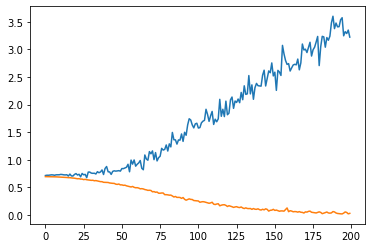

In [330]:
plt.plot(logs['val_loss'])
plt.plot(logs['train_loss'])

## Aug and Tansfer

In [ ]:
train_x = np.load('./data/train_x_ts_43.npy')
train_y = np.load('./data/train_y_ts_43.npy')
test_x = np.load('./data/test_x_ts_43.npy')
aug_data = np.load('./data/aug_data_ts_43.npy')

In [ ]:
train_set_aug = EggTSAugDataset(train_x, train_y, test_x, aug_data)
val_set = EggTSTDataset(test_x, y = np.ones((len(test_x),), dtype = np.int16))

In [ ]:
num_epoch = 5
lr = 1e-3
batch_size = 128

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)

# set_seed(0)
train_loader = data.DataLoader(train_set_aug, batch_size=128, shuffle=True)
test_loader = data.DataLoader(val_set, batch_size=128, shuffle=False)
set_seed(0)
training(model, train_loader, test_loader, adam, num_epoch = num_epoch, lr = lr)
torch.save(model, './model/step_one.model')

In [52]:
def freeze(model, n_frozen):
#     print(summary(model, torch.zeros(1,1,500)))
    n_frozen = 500
    for i,(n,p) in enumerate(model.named_parameters()):
        if i < n_frozen:
            p.requires_grad = False
#             print(n, p.shape)
        else:
            break

In [53]:
class FCModel(nn.Module):
    def __init__(self, model):
        super(FCModel, self).__init__()
        def hook(module, in_, out_):
            self.out_,_ = out_
            self.out_ = self.out_[:,-1,:]
            
        self.model = model
        self.model.lstm.register_forward_hook(hook)
        self.fc = nn.Sequential(
            nn.Linear(128, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16,2)
        )

    def forward(self, x):
        self.model(x)
        out = self.fc(self.out_)
        return out

In [55]:
model = torch.load('./model/step_one.model')
freeze(model,100)
fc_model = FCModel(model).to(DEVICE)

train_x = np.load('./data/train_x_ts_w.npy')
train_y = np.load('./data/train_y_ts_w.npy')
test_x = np.load('./data/test_x_ts_w.npy')
set_seed(0)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)

train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)

train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 15
lr = 1e-3
batch_size = 128

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(fc_model.parameters(), lr = lr)

# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=16, shuffle=False)
set_seed(0)
training(fc_model, train_loader, val_loader, adam, num_epoch = num_epoch, lr = lr)

[001/015] 1.29 sec(s) Train Acc: 0.84708 Loss: 45.734960 | Val Acc: 86.11111 loss: 0.4066 
Saving with acc : 0.8611111111111112
[002/015] 1.29 sec(s) Train Acc: 0.84708 Loss: 44.587627 | Val Acc: 86.11111 loss: 0.4108 
[003/015] 1.29 sec(s) Train Acc: 0.84708 Loss: 43.935402 | Val Acc: 86.11111 loss: 0.4164 
[004/015] 1.28 sec(s) Train Acc: 0.84708 Loss: 43.405005 | Val Acc: 86.11111 loss: 0.4048 
[005/015] 1.32 sec(s) Train Acc: 0.84708 Loss: 43.487124 | Val Acc: 86.11111 loss: 0.4067 
[006/015] 1.31 sec(s) Train Acc: 0.84708 Loss: 43.676398 | Val Acc: 86.11111 loss: 0.4042 
[007/015] 1.29 sec(s) Train Acc: 0.84708 Loss: 43.468002 | Val Acc: 86.11111 loss: 0.4084 
[008/015] 1.32 sec(s) Train Acc: 0.84708 Loss: 43.366694 | Val Acc: 86.11111 loss: 0.4037 
[009/015] 1.33 sec(s) Train Acc: 0.84708 Loss: 43.218472 | Val Acc: 86.11111 loss: 0.4046 
[010/015] 1.30 sec(s) Train Acc: 0.84708 Loss: 43.068296 | Val Acc: 86.11111 loss: 0.4063 
[011/015] 1.31 sec(s) Train Acc: 0.84708 Loss: 43.069

In [509]:
np.sum(train_y==0)/len(train_y)

0.8470819304152637

## Aug

In [36]:
class EggTSAugDataset(data.Dataset):
    def __init__(self, train_x, train_y, test_x, aug_data):
        # train + test
        self.x_base = train_x
        self.y_base = train_y
        self.aug_data = aug_data
        self.init_data()
        
    def init_data(self):
        aug_idx = np.arange(len(self.aug_data))[:-126]
        np.random.shuffle(aug_data)
        aug_idx = aug_idx[:300]
        x_aug, y_aug = ext_ts_data(aug_idx, aug_data)
#         print(x_aug.shape)
        base_idx = np.arange(len(self.y_base))
        np.random.shuffle(base_idx)
        self.x_base = self.x_base[base_idx]
        self.y_base = self.y_base[base_idx]
        idx = np.concatenate([np.where(self.y_base==0)[0][:500], np.where(self.y_base==1)[0]])
        
        self.x = np.concatenate([self.x_base[idx],x_aug])
        self.y = np.concatenate([self.y_base[idx], y_aug])
        
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    
    def __len__(self):
        return len(self.x)

In [37]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
aug_data = np.load('./data/aug_data_ts_w_43.npy')

train_set = EggTSAugDataset(train_x, train_y, test_x, aug_data)

In [38]:
set_seed(0)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)

In [93]:
train_set = EggTSAugDataset(train_x, train_y, test_x, aug_data)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 16

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.CrossEntropyLoss(weight=torch.tensor([0.1,0.9], device=DEVICE))
loss = nn.CrossEntropyLoss()
# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch,loss_func=loss, lr = lr, if_save=True, save_name='w_43_weighted_aug.model')
# 56.17

[001/200] 1.65 sec(s) Train Acc: 0.54647 Loss: 0.691219 | Val Acc: 0.86111 loss: 0.6591
 >                    Train Accw: 0.51886 Val Accw: 0.50000
Saving with acc : 0.4999999999999963
[002/200] 1.63 sec(s) Train Acc: 0.59777 Loss: 0.680369 | Val Acc: 0.86111 loss: 0.6182
 >                    Train Accw: 0.50368 Val Accw: 0.50000
[003/200] 1.60 sec(s) Train Acc: 0.59480 Loss: 0.672558 | Val Acc: 0.86111 loss: 0.5784
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[004/200] 1.63 sec(s) Train Acc: 0.59257 Loss: 0.667800 | Val Acc: 0.86111 loss: 0.5760
 >                    Train Accw: 0.49234 Val Accw: 0.50000
[005/200] 1.59 sec(s) Train Acc: 0.59405 Loss: 0.666058 | Val Acc: 0.85354 loss: 0.5716
 >                    Train Accw: 0.49322 Val Accw: 0.49583
[006/200] 1.61 sec(s) Train Acc: 0.59926 Loss: 0.653004 | Val Acc: 0.84596 loss: 0.5586
 >                    Train Accw: 0.50788 Val Accw: 0.50691
Saving with acc : 0.5069139194139152
[007/200] 1.62 sec(s) Train Acc: 0.601

[056/200] 1.62 sec(s) Train Acc: 0.69665 Loss: 0.513123 | Val Acc: 0.47727 loss: 0.7112
 >                    Train Accw: 0.69600 Val Accw: 0.48564
[057/200] 1.68 sec(s) Train Acc: 0.70037 Loss: 0.518371 | Val Acc: 0.47475 loss: 0.7210
 >                    Train Accw: 0.68836 Val Accw: 0.49111
[058/200] 1.64 sec(s) Train Acc: 0.64981 Loss: 0.574147 | Val Acc: 0.21970 loss: 0.8358
 >                    Train Accw: 0.69678 Val Accw: 0.46716
[059/200] 1.63 sec(s) Train Acc: 0.64015 Loss: 0.622343 | Val Acc: 0.30556 loss: 0.7793
 >                    Train Accw: 0.68655 Val Accw: 0.49526
[060/200] 1.64 sec(s) Train Acc: 0.64758 Loss: 0.605772 | Val Acc: 0.38889 loss: 0.7382
 >                    Train Accw: 0.67431 Val Accw: 0.48826
[061/200] 1.67 sec(s) Train Acc: 0.67286 Loss: 0.567439 | Val Acc: 0.46212 loss: 0.7150
 >                    Train Accw: 0.68966 Val Accw: 0.52602
[062/200] 1.62 sec(s) Train Acc: 0.67732 Loss: 0.596523 | Val Acc: 0.53030 loss: 0.6849
 >                    Tr

[112/200] 1.61 sec(s) Train Acc: 0.71078 Loss: 0.498150 | Val Acc: 0.49242 loss: 0.7071
 >                    Train Accw: 0.69752 Val Accw: 0.50144
[113/200] 1.60 sec(s) Train Acc: 0.70112 Loss: 0.497832 | Val Acc: 0.47727 loss: 0.7101
 >                    Train Accw: 0.70349 Val Accw: 0.48396
[114/200] 1.62 sec(s) Train Acc: 0.71004 Loss: 0.495459 | Val Acc: 0.46465 loss: 0.7191
 >                    Train Accw: 0.71229 Val Accw: 0.49506
[115/200] 1.62 sec(s) Train Acc: 0.68996 Loss: 0.501948 | Val Acc: 0.47980 loss: 0.7119
 >                    Train Accw: 0.68801 Val Accw: 0.49094
[116/200] 1.60 sec(s) Train Acc: 0.69442 Loss: 0.505807 | Val Acc: 0.48737 loss: 0.7027
 >                    Train Accw: 0.68958 Val Accw: 0.49842
[117/200] 1.61 sec(s) Train Acc: 0.72193 Loss: 0.487047 | Val Acc: 0.48737 loss: 0.7046
 >                    Train Accw: 0.72347 Val Accw: 0.49778
[118/200] 1.59 sec(s) Train Acc: 0.70781 Loss: 0.494875 | Val Acc: 0.46970 loss: 0.7117
 >                    Tr

[168/200] 1.65 sec(s) Train Acc: 0.75019 Loss: 0.457048 | Val Acc: 0.51010 loss: 0.7144
 >                    Train Accw: 0.74343 Val Accw: 0.48464
[169/200] 1.66 sec(s) Train Acc: 0.75465 Loss: 0.446032 | Val Acc: 0.52778 loss: 0.7129
 >                    Train Accw: 0.74774 Val Accw: 0.49403
[170/200] 1.63 sec(s) Train Acc: 0.75167 Loss: 0.450826 | Val Acc: 0.46970 loss: 0.7607
 >                    Train Accw: 0.73798 Val Accw: 0.49443
[171/200] 1.64 sec(s) Train Acc: 0.74126 Loss: 0.459611 | Val Acc: 0.53283 loss: 0.7009
 >                    Train Accw: 0.74592 Val Accw: 0.48568
[172/200] 1.62 sec(s) Train Acc: 0.74498 Loss: 0.465439 | Val Acc: 0.47980 loss: 0.7389
 >                    Train Accw: 0.75858 Val Accw: 0.49213
[173/200] 1.63 sec(s) Train Acc: 0.73606 Loss: 0.458085 | Val Acc: 0.57323 loss: 0.6736
 >                    Train Accw: 0.73461 Val Accw: 0.50419
[174/200] 1.63 sec(s) Train Acc: 0.74721 Loss: 0.453320 | Val Acc: 0.54293 loss: 0.7017
 >                    Tr

0.5440763403263205

In [979]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
# idx = np.concatenate([np.where(train_y==0)[0][:500], np.where(train_y==1)[0]])
# train_x = train_x[idx]
# train_y = train_y[idx]
num_epoch = 100
lr = 1e-4
batch_size = 32
loss = nn.CrossEntropyLoss(weight=torch.tensor([0.1,0.9],device = DEVICE))
training_kfold(train_x, train_y, kfold_n = 5, num_epoch = num_epoch, loss_func = loss, batch_size =batch_size, lr = lr, if_save = True, save_name = 'w_43_aug_5fold_weighted.model')
# 0.5442326547145042

[001/100] 1.57 sec(s) Train Acc: 0.49728 Loss: 68.734350 | Val Acc: 50.00000 loss: 0.6769 
Saving with acc : 0.49999999999998834
[002/100] 1.57 sec(s) Train Acc: 0.50000 Loss: 68.298676 | Val Acc: 50.00000 loss: 0.6712 
[003/100] 1.55 sec(s) Train Acc: 0.50000 Loss: 67.990815 | Val Acc: 50.00000 loss: 0.6665 
[004/100] 1.57 sec(s) Train Acc: 0.50000 Loss: 67.848641 | Val Acc: 50.00000 loss: 0.6641 
[005/100] 1.52 sec(s) Train Acc: 0.50000 Loss: 67.962756 | Val Acc: 50.00000 loss: 0.6638 
[006/100] 1.56 sec(s) Train Acc: 0.50017 Loss: 67.756998 | Val Acc: 50.00000 loss: 0.6634 
[007/100] 1.52 sec(s) Train Acc: 0.50094 Loss: 67.636934 | Val Acc: 50.00000 loss: 0.6629 
[008/100] 1.58 sec(s) Train Acc: 0.49513 Loss: 67.832921 | Val Acc: 50.00000 loss: 0.6650 
[009/100] 1.60 sec(s) Train Acc: 0.50070 Loss: 67.438292 | Val Acc: 50.15100 loss: 0.6638 
Saving with acc : 0.5015099715099599
[010/100] 1.64 sec(s) Train Acc: 0.50776 Loss: 67.152444 | Val Acc: 49.85814 loss: 0.6638 
[011/100] 1.57 

[089/100] 1.54 sec(s) Train Acc: 0.83399 Loss: 36.027090 | Val Acc: 50.03127 loss: 1.7915 
[090/100] 1.54 sec(s) Train Acc: 0.83622 Loss: 35.924068 | Val Acc: 44.88716 loss: 1.5239 
[091/100] 1.53 sec(s) Train Acc: 0.81767 Loss: 37.796539 | Val Acc: 48.13619 loss: 1.7125 
[092/100] 1.58 sec(s) Train Acc: 0.83976 Loss: 34.680812 | Val Acc: 48.82370 loss: 1.7325 
[093/100] 1.55 sec(s) Train Acc: 0.83419 Loss: 33.894528 | Val Acc: 47.89118 loss: 1.8480 
[094/100] 1.55 sec(s) Train Acc: 0.83552 Loss: 34.176624 | Val Acc: 47.94165 loss: 1.8192 
[095/100] 1.53 sec(s) Train Acc: 0.84655 Loss: 32.768725 | Val Acc: 48.54260 loss: 1.8422 
[096/100] 1.55 sec(s) Train Acc: 0.84476 Loss: 32.533558 | Val Acc: 49.15996 loss: 1.8947 
[097/100] 1.59 sec(s) Train Acc: 0.84468 Loss: 32.626412 | Val Acc: 48.62597 loss: 1.8679 
[098/100] 1.55 sec(s) Train Acc: 0.85096 Loss: 32.242827 | Val Acc: 49.15967 loss: 1.9611 
[099/100] 1.52 sec(s) Train Acc: 0.83633 Loss: 33.012542 | Val Acc: 48.70015 loss: 2.1819 

[073/100] 1.63 sec(s) Train Acc: 0.76685 Loss: 45.572055 | Val Acc: 49.13385 loss: 0.9938 
[074/100] 1.57 sec(s) Train Acc: 0.76381 Loss: 45.638933 | Val Acc: 48.29200 loss: 1.0360 
[075/100] 1.57 sec(s) Train Acc: 0.77218 Loss: 46.031636 | Val Acc: 49.14332 loss: 1.0173 
[076/100] 1.54 sec(s) Train Acc: 0.77938 Loss: 44.584693 | Val Acc: 48.67559 loss: 1.0458 
[077/100] 1.63 sec(s) Train Acc: 0.77565 Loss: 43.907400 | Val Acc: 46.78749 loss: 1.0715 
[078/100] 1.58 sec(s) Train Acc: 0.78072 Loss: 43.364293 | Val Acc: 48.42436 loss: 1.0696 
[079/100] 1.53 sec(s) Train Acc: 0.78170 Loss: 43.035980 | Val Acc: 48.86622 loss: 1.0863 
[080/100] 1.54 sec(s) Train Acc: 0.78399 Loss: 44.281636 | Val Acc: 48.67580 loss: 1.0638 
[081/100] 1.58 sec(s) Train Acc: 0.79695 Loss: 42.004920 | Val Acc: 49.98435 loss: 1.1148 
[082/100] 1.56 sec(s) Train Acc: 0.79388 Loss: 42.369955 | Val Acc: 49.42556 loss: 1.1119 
[083/100] 1.57 sec(s) Train Acc: 0.79340 Loss: 41.354921 | Val Acc: 49.02032 loss: 1.1173 

[061/100] 1.61 sec(s) Train Acc: 0.71951 Loss: 53.271679 | Val Acc: 50.39730 loss: 0.8093 
[062/100] 1.54 sec(s) Train Acc: 0.73447 Loss: 51.956329 | Val Acc: 51.32833 loss: 0.8045 
[063/100] 1.56 sec(s) Train Acc: 0.74740 Loss: 50.799747 | Val Acc: 49.88787 loss: 0.8539 
[064/100] 1.57 sec(s) Train Acc: 0.74817 Loss: 51.179550 | Val Acc: 50.31177 loss: 0.8370 
[065/100] 1.50 sec(s) Train Acc: 0.75208 Loss: 51.232790 | Val Acc: 48.98433 loss: 0.8370 
[066/100] 1.51 sec(s) Train Acc: 0.75505 Loss: 49.659951 | Val Acc: 49.65916 loss: 0.8509 
[067/100] 1.59 sec(s) Train Acc: 0.74888 Loss: 49.890229 | Val Acc: 49.08070 loss: 0.8689 
[068/100] 1.51 sec(s) Train Acc: 0.74588 Loss: 49.208224 | Val Acc: 48.77129 loss: 0.8685 
[069/100] 1.51 sec(s) Train Acc: 0.75268 Loss: 48.563169 | Val Acc: 48.32063 loss: 0.8875 
[070/100] 1.50 sec(s) Train Acc: 0.75790 Loss: 48.622530 | Val Acc: 50.17051 loss: 0.8776 
[071/100] 1.56 sec(s) Train Acc: 0.77756 Loss: 46.934689 | Val Acc: 49.81900 loss: 0.8981 

[047/100] 1.57 sec(s) Train Acc: 0.66917 Loss: 58.871306 | Val Acc: 50.85748 loss: 0.7532 
[048/100] 1.62 sec(s) Train Acc: 0.67382 Loss: 57.830523 | Val Acc: 49.72924 loss: 0.7616 
[049/100] 1.59 sec(s) Train Acc: 0.66307 Loss: 58.225576 | Val Acc: 48.82431 loss: 0.7622 
[050/100] 1.59 sec(s) Train Acc: 0.66600 Loss: 57.726715 | Val Acc: 51.97454 loss: 0.7578 
[051/100] 1.55 sec(s) Train Acc: 0.66788 Loss: 57.135817 | Val Acc: 51.26887 loss: 0.7573 
[052/100] 1.54 sec(s) Train Acc: 0.67510 Loss: 56.762710 | Val Acc: 50.17648 loss: 0.7817 
[053/100] 1.53 sec(s) Train Acc: 0.69101 Loss: 56.058477 | Val Acc: 51.66823 loss: 0.7725 
[054/100] 1.55 sec(s) Train Acc: 0.67583 Loss: 57.248339 | Val Acc: 51.35594 loss: 0.7733 
[055/100] 1.60 sec(s) Train Acc: 0.69207 Loss: 55.808036 | Val Acc: 50.64243 loss: 0.7797 
[056/100] 1.60 sec(s) Train Acc: 0.69555 Loss: 55.420100 | Val Acc: 50.53846 loss: 0.7930 
[057/100] 1.55 sec(s) Train Acc: 0.70515 Loss: 54.708653 | Val Acc: 50.81433 loss: 0.8079 

[033/100] 1.52 sec(s) Train Acc: 0.61131 Loss: 62.217419 | Val Acc: 53.59608 loss: 0.7036 
[034/100] 1.55 sec(s) Train Acc: 0.61722 Loss: 62.055613 | Val Acc: 55.83237 loss: 0.7035 
Saving with acc : 0.5583237208224887
[035/100] 1.57 sec(s) Train Acc: 0.62195 Loss: 60.773421 | Val Acc: 55.58483 loss: 0.7011 
[036/100] 1.53 sec(s) Train Acc: 0.62682 Loss: 60.698235 | Val Acc: 55.96609 loss: 0.7098 
Saving with acc : 0.5596608589079028
[037/100] 1.50 sec(s) Train Acc: 0.63830 Loss: 60.404328 | Val Acc: 53.97340 loss: 0.7194 
[038/100] 1.51 sec(s) Train Acc: 0.64734 Loss: 59.588646 | Val Acc: 54.85001 loss: 0.7090 
[039/100] 1.54 sec(s) Train Acc: 0.64921 Loss: 59.147448 | Val Acc: 55.37250 loss: 0.7189 
[040/100] 1.50 sec(s) Train Acc: 0.64104 Loss: 59.805704 | Val Acc: 55.42465 loss: 0.7159 
[041/100] 1.58 sec(s) Train Acc: 0.66039 Loss: 58.245228 | Val Acc: 56.29769 loss: 0.7325 
Saving with acc : 0.5629768828625253
[042/100] 1.50 sec(s) Train Acc: 0.66714 Loss: 58.765395 | Val Acc: 54

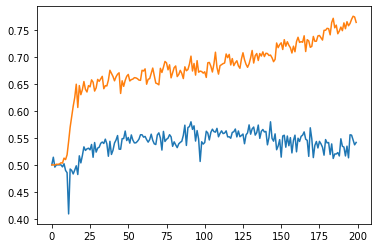

In [351]:
logs = np.load('./model/w_43_aug.model_best_log.npy',allow_pickle=True).item()
plt.plot(logs['val_acc'])
plt.plot(logs['train_acc'])

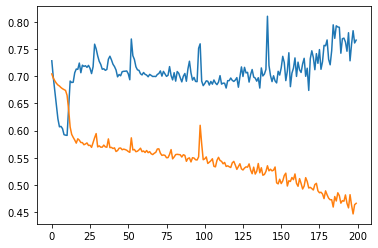

In [352]:
plt.plot(logs['val_loss'])
plt.plot(logs['train_loss'])

## TST Model

In [47]:
class EggTSTDataset(data.Dataset):
    def __init__(self, x, y = None, mode = 'train'):
        self.mode = mode
        self.x = x
        if mode == 'eval':
            self.y = y
            
    def __getitem(self, i):
        if mode == 'eval':
            return self.x[i]
        return self.x[i], self.y[i]
    
    def __len__(self):
        return len(self.x)

## Boosting

In [11]:
train_x = np.load('./data/train_x_tst.npy')
train_y = np.load('./data/train_y_tst.npy')
test_x = np.load('./data/test_x_tst.npy')

In [12]:
train_set = EggTSTDataset(train_x, y = train_y)
val_set = EggTSTDataset(val_x, y = val_y)
num_epoch = 200
lr = 1e-4
batch_size = 128

model = TSModel().to(DEVICE)
adam = torch.optim.Adam(model.parameters(), lr = lr)

# set_seed(0)
train_loader = data.DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = data.DataLoader(val_set, batch_size=16, shuffle=False)
set_seed(0)
training(model, train_loader, val_loader, adam, num_epoch = num_epoch, lr = lr)

(2880, 20)

In [299]:
from sklearn.model_selection import KFold
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.ensemble import  AdaBoostClassifier 
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier

# from tqdm import tqdm

In [300]:
n_folds = 5
def acc_cv(model):
    # KFold用于cross validation中数据集的切分，返回trian index和test index的generator
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse = cross_val_score(gbc, train_x, train_y, scoring='accuracy', cv = kf)
    return rmse

In [56]:
gbc = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                   min_samples_split = 10, random_state=5)
lgb_ = lgb.LGBMClassifier(n_estimators = 720)
ada_ = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators = 500)

In [307]:
from sklearn.model_selection import KFold
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.ensemble import  AdaBoostClassifier 
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier

# from tqdm import tqdm
n_folds = 5
def acc_cv(model, train_x, train_y):
    # KFold用于cross validation中数据集的切分，返回trian index和test index的generator
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse = cross_val_score(gbc, train_x, train_y, scoring='accuracy', cv = kf)
    return rmse

gbc = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                   min_samples_split = 10, random_state=5)
lgb_ = lgb.LGBMClassifier(n_estimators = 720)
ada_ = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators = 500)

In [308]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')

In [310]:
acc_cv(rfc, train_x.reshape(train_x.shape[0],-1), train_y)

KeyboardInterrupt: 

In [312]:
ada_.fit(train_x.reshape(train_x.shape[0],-1), train_y)

AdaBoostClassifier()

In [315]:
y = ada_.predict(test_x.reshape(test_x.shape[0], -1))

In [318]:
np.sum(y==1)

76

In [39]:
from sklearn.model_selection import KFold
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier 
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier

In [62]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x = train_x[:,:,select_idx]
train_x = train_x.reshape(train_x.shape[0],-1)
test_x = test_x.reshape(test_x.shape[0], -1)
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)

In [40]:
n_folds = 5
def acc_cv(model, train_x, train_y):
    # KFold用于cross validation中数据集的切分，返回trian index和test index的generator
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    score = cross_val_score(model, train_x, train_y, scoring='accuracy', cv = kf)
    return score
def cal_acc_w(pred, val_y):
    acc_w = np.sum(val_y[val_y==0]==pred[val_y==0])/(np.sum(val_y==0)+1e-13) + np.sum(val_y[val_y==1]==pred[val_y==1])/(np.sum(val_y==1)+1e-13)
    return acc_w/2

In [64]:
import xgboost as xgb
import sklearn.metrics as metrics
params = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 12,
    'lambda': 1,
    'eta': 1e-3,
    'seed': 0,
    'nthread': 4 
}

xg_train = xgb.DMatrix(train_x, label=train_y)
xg_test = xgb.DMatrix(val_x, label=val_y)

model = xgb.train(params, xg_train, num_boost_round=10)
predict = model.predict(xg_test)

acc = metrics.accuracy_score(predict, val_y)
acc_w = cal_acc_w(predict, val_y)
print(acc, acc_w)
print(f'test_acc: {acc:.4f}')
print(type(xg_train))
xgb_ = xgb.XGBClassifier(learning_rate=1e-3,
                       n_estimators=100,         # 树的个数--1000棵树建立xgboost
                       max_depth=12,               # 树的深度
                       min_child_weight = 1,      # 叶子节点最小权重
                       gamma=0.1,                  # 惩罚项中叶子结点个数前的参数
                       subsample=0.8,             # 随机选择80%样本建立决策树
                       colsample_btree=0.8,       # 随机选择80%特征建立决策树
#                        objective='multi:softmax', # 指定损失函数
                       scale_pos_weight=1,        # 解决样本个数不平衡的问题
                       random_state=0           # 随机数
                        )
xgb_.fit(train_x, train_y)
pred = xgb_.predict(val_x)
acc = metrics.accuracy_score(pred, val_y)
acc_w = cal_acc_w(pred, val_y)
print(acc, acc_w)

0.8055555555555556 0.48299120234604087
test_acc: 0.8056
<class 'xgboost.core.DMatrix'>
[15:11:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_btree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8611111111111112 0.49999999999999983


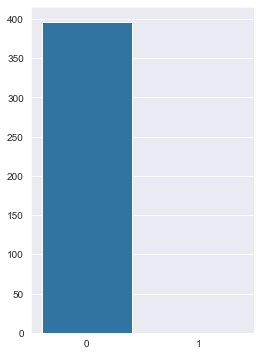

In [68]:
plot_result(pred)

## Test

In [41]:
def ext_data_cr(name):
    labels = []
    for sheet_idx in range(12):
        try:
            test_data = pd.read_excel(f'./data/{name}/{name}_test_data.xlsx', header=None, sheet_name =  sheet_idx)
            test_event = pd.read_excel(f'./data/{name}/{name}_test_event.xlsx', header=None, sheet_name =  sheet_idx)
            idx = test_event[(test_event[0]!=666) & (test_event[0]!=100)][1]
            labels.append(test_event[0][(test_event[0]!=666) & (test_event[0]!=100)])
             
        except IndexError:
            print(sheet_idx," is not exit")
            break
    labels = np.concatenate(labels)
    return labels

In [369]:
labels = []
for name in files:
    label_t = ext_data_cr(name)
    labels.append(label_t)
labels = np.concatenate(labels)
np.save('./data/labels.npy', labels)

10  is not exit
9  is not exit
9  is not exit
10  is not exit
10  is not exit


In [42]:
labels = np.load('./data/labels.npy')

In [43]:
def  test_model(model, test_x):
    model.eval()
    with torch.no_grad():
        test_x = torch.tensor(test_x, dtype = torch.float).to(DEVICE)
        probs = model(test_x)
        probs = torch.softmax(probs.cpu(), dim=1).numpy()
        pred = np.argmax(probs, axis=1)
    return probs, pred

In [44]:
def plot_result(preds):
    
    sns.barplot(x=list(range(2)), y = [np.sum(preds==0), np.sum(preds==1)])
def show_infer(probs, if_print = False):
#     print('M F 5 2 I')
#     print([letter_to_cr[l] for l in 'M F 5 2 I'.split()])
    rows,cols=[], []
    for i in range(0,len(probs),12):
        if i % 5 == 0:
            pass
#             print('=====================')
        group = probs[i:i+12]
        group_label = labels[i:i+12]
        col = group_label[group_label>6][group[group_label>6].max(axis=1).argmax()]
        row = group_label[group_label<=6][group[group_label<=6].max(axis=1).argmax()]
        if if_print:
            pass
#             print(row, col, letter_mat[row-1][col-1-6])
        rows.append(row)
        cols.append(col)
    return rows,cols
def hit(rows, cols, if_print=False):
    j = 0
    hit_num = 0
    for letter in 'M F 5 2 I'.split():
        row_tar, col_tar = letter_to_cr[letter]
        if if_print:
            print('Target ', letter, letter_to_cr[letter])
            print("====================")
        for i in range(5):
            row_pred, col_pred = rows[j], cols[j]
            hit_str = ''
            if row_pred==row_tar:
                hit_str += str(row_tar) + ' '
                hit_num += 1
            if col_pred==col_tar:
                hit_str += str(col_tar)
                hit_num += 1
            if if_print:
                print('pred:',row_pred, col_pred, ' hit:',hit_str )
            j+=1
    return hit_num
def cal_hit_acc(rows, cols, if_print = False):
    nums = [50, 45, 45, 50, 50]
    base = 0
    hit_rc = 0
    for num in nums:
        row_t, col_t = rows[base:base+num],cols[base:base+num]
        hit_rc_t = hit(row_t, col_t, if_print = if_print)
        base += num
        hit_rc += hit_rc_t

    hit_rc_acc = hit_rc/len(rows)/2
    return hit_rc_acc
def model_infer(model, test_x, if_print = False):
    probs, preds = test_model(model, test_x[:,:,:])
    rows,cols = show_infer(probs)
    acc = cal_hit_acc(rows, cols, if_print=if_print)
    return acc

In [45]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')

In [35]:
fig = plt.figure(figsize=(5,4))
plot_result(preds)
save_fig(fig, 'balan_result')

NameError: name 'preds' is not defined

<Figure size 360x288 with 0 Axes>

In [102]:
# 正常维度
model = torch.load('./model/w_43_base.model_best.model')
probs, preds = test_model(model, test_x[:,:,:])
rows,cols = show_infer(probs)
cal_hit_acc(rows, cols, if_print=True)

Target  M [3, 7]
pred: 4 7  hit: 7
pred: 3 8  hit: 3 
pred: 3 7  hit: 3 7
pred: 6 11  hit: 
pred: 6 8  hit: 
Target  F [1, 12]
pred: 4 7  hit: 
pred: 5 11  hit: 
pred: 2 9  hit: 
pred: 2 10  hit: 
pred: 6 10  hit: 
Target  5 [6, 7]
pred: 6 11  hit: 6 
pred: 5 7  hit: 7
pred: 5 12  hit: 
pred: 6 10  hit: 6 
pred: 3 12  hit: 
Target  2 [5, 10]
pred: 2 12  hit: 
pred: 6 12  hit: 
pred: 2 10  hit: 10
pred: 4 10  hit: 10
pred: 4 11  hit: 
Target  I [2, 9]
pred: 3 11  hit: 
pred: 6 8  hit: 
pred: 5 10  hit: 
pred: 4 7  hit: 
pred: 5 11  hit: 
Target  M [3, 7]
pred: 4 8  hit: 
pred: 1 12  hit: 
pred: 3 11  hit: 3 
pred: 1 9  hit: 
pred: 6 12  hit: 
Target  F [1, 12]
pred: 3 10  hit: 
pred: 5 8  hit: 
pred: 6 7  hit: 
pred: 6 7  hit: 
pred: 1 12  hit: 1 12
Target  5 [6, 7]
pred: 3 10  hit: 
pred: 2 9  hit: 
pred: 6 12  hit: 6 
pred: 3 11  hit: 
pred: 5 7  hit: 7
Target  2 [5, 10]
pred: 2 12  hit: 
pred: 5 7  hit: 5 
pred: 5 8  hit: 5 
pred: 5 11  hit: 5 
pred: 5 12  hit: 5 
Target  I [2, 9]
pr

0.1

In [33]:
# select
model = torch.load('./model/w_43_base_self.model_best_f.model_61.7')
probs, preds = test_model(model, test_x[:,40:,select_idx])
rows,cols = show_infer(probs)
cal_hit_acc(rows, cols)

0.09166666666666666

In [1002]:
show_infer(probs)

M F 5 2 I
[[3, 7], [1, 12], [6, 7], [5, 10], [2, 9]]
4 7 S
2 8 H
3 9 O
6 10 8
4 8 T
4 7 S
5 9 1
2 9 I
5 10 2
6 10 8
6 12 0
5 7 Y
4 9 U
6 9 7
3 8 N
3 12 R
6 7 5
3 10 P
4 10 V
4 10 V
4 10 V
6 12 0
2 10 J
3 7 M
5 11 3
5 10 2
1 8 B
2 12 L
3 7 M
5 10 2
2 10 J
1 12 F
4 10 V
1 7 A
2 7 G
4 12 X
5 12 4
4 12 X
3 11 Q
3 11 Q
2 7 G
1 10 D
6 10 8
6 12 0
3 8 N
4 10 V
2 9 I
6 12 0
5 12 4
2 8 H
2 10 J
1 12 F
2 11 K
6 9 7
6 12 0
5 7 Y
3 10 P
5 7 Y
6 7 5
1 9 C
5 7 Y
4 12 X
5 9 1
3 12 R
3 7 M
5 7 Y
2 7 G
3 7 M
5 11 3
5 7 Y
6 11 9
2 12 L
3 12 R
6 7 5
4 8 T
4 8 T
3 11 Q
3 7 M
5 8 Z
6 10 8
2 7 G
5 12 4
1 9 C
1 12 F
6 9 7
6 12 0
5 12 4
1 7 A
4 11 W
4 12 X
4 12 X
4 7 S
1 11 E
6 7 5
1 9 C
5 7 Y
1 12 F
2 9 I
6 8 6
1 9 C
5 12 4
3 12 R
6 9 7
2 11 K
2 12 L
1 10 D
6 8 6
2 9 I
5 9 1
1 8 B
3 7 M
1 7 A
2 10 J
4 12 X
3 8 N
3 10 P
6 11 9
5 9 1
2 8 H
5 7 Y
1 10 D
5 7 Y
3 12 R
3 9 O
1 8 B
5 11 3
3 9 O
1 12 F
2 7 G
3 11 Q
3 7 M
1 11 E
2 7 G
6 11 9
5 10 2
4 7 S
2 10 J
3 8 N
5 9 1
3 7 M
3 12 R
1 11 E
5 10 2
5 9 1
6 9 7
2 7 G

In [143]:
select_idx2 = np.array([0, 1, 2, 3, 4, 5, 6, 8, 11, 13, 16, 19])

In [147]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')

In [148]:
# select
model = torch.load('./model/w_43_weighted.model_best.model')
probs, preds = test_model(model, test_x[:,:,])
rows,cols = show_infer(probs)


In [149]:
i = 0
while i < len(rows):
    vec_r = np.zeros((6,),np.int32)
    vec_c = np.zeros((6,),np.int32)
    for j in range(5):
        vec_r[rows[i]-1] += 1
        vec_c[cols[i]-7] += 1
        i+=1
    r = vec_r.argsort()[-1]
    c = vec_c.argsort()[-1]
    print(letter_mat[r,c], end=', ')
print()

I, 2, 1, X, V, M, H, 4, P, I, 0, Y, R, Y, 0, Q, 8, U, F, 1, L, 1, U, 4, 4, M, 9, R, O, P, N, Q, Y, 7, W, L, 3, 0, 8, S, 3, 9, M, R, P, 4, R, 5, 


In [138]:
letter_mat

array([['A', 'B', 'C', 'D', 'E', 'F'],
       ['G', 'H', 'I', 'J', 'K', 'L'],
       ['M', 'N', 'O', 'P', 'Q', 'R'],
       ['S', 'T', 'U', 'V', 'W', 'X'],
       ['Y', 'Z', '1', '2', '3', '4'],
       ['5', '6', '7', '8', '9', '0']], dtype='<U1')

In [133]:
rows[:5], cols[:5]

([5, 6, 2, 4, 1], [9, 11, 8, 11, 11])

## Semi

In [69]:
def training(model, train_loader, test_loader, optimizer, num_epoch = 10, lr = 1e-3,
                 if_save = False, save_path = './model', save_name = 'best.model',loss_func = nn.CrossEntropyLoss()):
    
#     optimizer = torch.optim.Adam(model.parameters(), lr = lr) # optim take charge of gradient descent
#     optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum=0.9)
    # log
#     mkdir_p(save_path)
    logs ={'time':[], 'train_loss': [], 'train_acc':[], 'val_loss':[], 'val_acc': [], 'train_acc_w':[], 'val_acc_w':[]}
    best = 0
    for epoch in range(num_epoch):
        epoch_start_time = time.time() 
        # renew normal samples in train_loader 
        train_loader.dataset.init_data()
        # train
        train_acc,train_acc_w, train_loss,_,probs = run_epoch(model, train_loader, loss_func, optimizer=optimizer, mode='train')
#         print(probs)
        # val
        val_acc, val_acc_w, val_loss, preds, _ = run_epoch(model, test_loader, loss_func)
#         print(preds)
        
        # print log
        logs['time'].append(time.time()-epoch_start_time)
        logs['train_acc'].append(train_acc)
        logs['train_loss'].append(train_loss)
        logs['val_acc'].append(val_acc)
        logs['val_loss'].append(val_loss) 
        logs['train_acc_w'].append(train_acc_w)
        logs['val_acc_w'].append(val_acc_w)


        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.5f Loss: %3.6f | Val Acc: %3.5f loss: %3.4f\n >                    Train Accw: %3.5f Val Accw: %3.5f' % \
                (epoch + 1, num_epoch,  logs['time'][-1], \
                train_acc , train_loss, val_acc, val_loss, train_acc_w, val_acc_w))
        if val_acc_w > best:
            best = val_acc_w
            if if_save:
                print("Saving with acc : {}".format(val_acc_w))
                torch.save(model, os.path.join(save_path, f'{save_name}_best.model'))
    if if_save:
        np.save(os.path.join(save_path, f'{save_name}_best_log.npy'), logs)
    return best


In [78]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x = train_x[:, 40:,select_idx]
test_x = test_x[:,40:, select_idx]
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)
idx = np.concatenate([np.where(train_y==0)[0][:500], np.where(train_y==1)[0]])
train_x = train_x[idx]
train_y = train_y[idx]

In [81]:
self_epoch = 100
batch_size = 16
train_test_x = train_x
train_test_y = train_y

# thredhold = 0.68
thredhold = 0.8
num_epoch = 15
lr = 1e-4
batch_size = 128

model = TSModel(input_dim=len(select_idx)).to(DEVICE)

loss = nn.CrossEntropyLoss()

In [82]:
best = 0
logs = {'train_acc_w':[], 'val_acc_w':[]}
for epoch in range(self_epoch):
    print("===================")
    train_set = EggTSTDataset(train_test_x, y = train_test_y)
    val_set = EggTSTDataset(val_x, y = val_y)
    train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
    adam = torch.optim.Adam(model.parameters(), lr = lr)
    val_acc = training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_base_self.model')
    # add no label data
    best_model = torch.load('./model/w_43_base_self.model_best.model')
    if best < val_acc:
        best = val_acc
        print("Self savning ", best)
        torch.save(best_model, './model/w_43_base_self.model_best_f.model')
    probs,preds = test_model(best_model, test_x)
    probs = probs.max(axis =1)
    add_x =  test_x[probs >thredhold]
    add_y = preds[probs>thredhold]
    train_test_x = np.concatenate([train_x, add_x])
    train_test_y = np.concatenate([train_y, add_y])
    print("Add number of data : ", len(add_x), len(add_y))
    model = torch.load('./model/w_43_base_self.model_best_f.model')
    # log
    log = np.load('./model/w_43_base_self.model_best_log.npy', allow_pickle=True).item()
    logs['train_acc_w'] = logs['train_acc_w'] + log['train_acc_w']
    logs['val_acc_w'] = logs['val_acc_w'] + log['val_acc_w']

[001/015] 0.13 sec(s) Train Acc: 0.52057 Loss: 0.693106 | Val Acc: 0.13889 loss: 0.7393
 >                    Train Accw: 0.49913 Val Accw: 0.50000
Saving with acc : 0.49999999999999156
[002/015] 0.12 sec(s) Train Acc: 0.52153 Loss: 0.693007 | Val Acc: 0.13889 loss: 0.7404
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[003/015] 0.13 sec(s) Train Acc: 0.52153 Loss: 0.692630 | Val Acc: 0.13889 loss: 0.7386
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[004/015] 0.12 sec(s) Train Acc: 0.52153 Loss: 0.692699 | Val Acc: 0.13889 loss: 0.7354
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[005/015] 0.13 sec(s) Train Acc: 0.52249 Loss: 0.692345 | Val Acc: 0.13889 loss: 0.7334
 >                    Train Accw: 0.50101 Val Accw: 0.50000
[006/015] 0.12 sec(s) Train Acc: 0.52153 Loss: 0.692341 | Val Acc: 0.13889 loss: 0.7324
 >                    Train Accw: 0.50000 Val Accw: 0.50000
[007/015] 0.12 sec(s) Train Acc: 0.52153 Loss: 0.691638 | Val Acc: 0.13889

[009/015] 0.13 sec(s) Train Acc: 0.53397 Loss: 0.689274 | Val Acc: 0.16667 loss: 0.7218
 >                    Train Accw: 0.51311 Val Accw: 0.52385
[010/015] 0.13 sec(s) Train Acc: 0.53014 Loss: 0.689714 | Val Acc: 0.16414 loss: 0.7246
 >                    Train Accw: 0.51028 Val Accw: 0.52270
[011/015] 0.13 sec(s) Train Acc: 0.53301 Loss: 0.688840 | Val Acc: 0.16414 loss: 0.7251
 >                    Train Accw: 0.51909 Val Accw: 0.52270
[012/015] 0.12 sec(s) Train Acc: 0.52919 Loss: 0.689088 | Val Acc: 0.16162 loss: 0.7234
 >                    Train Accw: 0.50106 Val Accw: 0.50893
[013/015] 0.13 sec(s) Train Acc: 0.53206 Loss: 0.688512 | Val Acc: 0.18939 loss: 0.7207
 >                    Train Accw: 0.51265 Val Accw: 0.51599
[014/015] 0.14 sec(s) Train Acc: 0.54545 Loss: 0.687513 | Val Acc: 0.20960 loss: 0.7193
 >                    Train Accw: 0.52611 Val Accw: 0.52509
Saving with acc : 0.5250876872501052
[015/015] 0.13 sec(s) Train Acc: 0.54163 Loss: 0.688528 | Val Acc: 0.23990 

[015/015] 0.12 sec(s) Train Acc: 0.59139 Loss: 0.672474 | Val Acc: 0.45202 loss: 0.7332
 >                    Train Accw: 0.58100 Val Accw: 0.54855
Self savning  0.5929007512082063
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.58182 Loss: 0.676394 | Val Acc: 0.45707 loss: 0.7174
 >                    Train Accw: 0.57304 Val Accw: 0.52679
Saving with acc : 0.5267939832124711
[002/015] 0.13 sec(s) Train Acc: 0.57990 Loss: 0.674539 | Val Acc: 0.45960 loss: 0.7184
 >                    Train Accw: 0.56772 Val Accw: 0.46659
[003/015] 0.12 sec(s) Train Acc: 0.57608 Loss: 0.675336 | Val Acc: 0.46212 loss: 0.7217
 >                    Train Accw: 0.59022 Val Accw: 0.54175
Saving with acc : 0.5417468582147856
[004/015] 0.12 sec(s) Train Acc: 0.56364 Loss: 0.675245 | Val Acc: 0.43182 loss: 0.7320
 >                    Train Accw: 0.56688 Val Accw: 0.52819
[005/015] 0.13 sec(s) Train Acc: 0.57129 Loss: 0.674158 | Val Acc: 0.41919 loss: 0.7383
 >                    Train Accw: 0.548

[007/015] 0.13 sec(s) Train Acc: 0.58852 Loss: 0.672372 | Val Acc: 0.47727 loss: 0.7175
 >                    Train Accw: 0.58273 Val Accw: 0.46776
[008/015] 0.12 sec(s) Train Acc: 0.57321 Loss: 0.672070 | Val Acc: 0.49747 loss: 0.7088
 >                    Train Accw: 0.57492 Val Accw: 0.45876
[009/015] 0.13 sec(s) Train Acc: 0.58086 Loss: 0.671187 | Val Acc: 0.50253 loss: 0.7067
 >                    Train Accw: 0.58734 Val Accw: 0.45550
[010/015] 0.15 sec(s) Train Acc: 0.59617 Loss: 0.670838 | Val Acc: 0.47727 loss: 0.7211
 >                    Train Accw: 0.59588 Val Accw: 0.55439
Saving with acc : 0.5543862675890778
[011/015] 0.14 sec(s) Train Acc: 0.58660 Loss: 0.670140 | Val Acc: 0.47727 loss: 0.7224
 >                    Train Accw: 0.56915 Val Accw: 0.55982
Saving with acc : 0.5598184259666731
[012/015] 0.13 sec(s) Train Acc: 0.59043 Loss: 0.668542 | Val Acc: 0.47980 loss: 0.7215
 >                    Train Accw: 0.58629 Val Accw: 0.54998
[013/015] 0.15 sec(s) Train Acc: 0.576

[014/015] 0.13 sec(s) Train Acc: 0.57729 Loss: 0.667860 | Val Acc: 0.47475 loss: 0.7331
 >                    Train Accw: 0.56618 Val Accw: 0.49189
[015/015] 0.13 sec(s) Train Acc: 0.58397 Loss: 0.665898 | Val Acc: 0.48737 loss: 0.7246
 >                    Train Accw: 0.58513 Val Accw: 0.49031
Add number of data :  2 2
[001/015] 0.14 sec(s) Train Acc: 0.57689 Loss: 0.674901 | Val Acc: 0.44697 loss: 0.7230
 >                    Train Accw: 0.57610 Val Accw: 0.51331
Saving with acc : 0.5133064912423086
[002/015] 0.13 sec(s) Train Acc: 0.57211 Loss: 0.673731 | Val Acc: 0.45455 loss: 0.7207
 >                    Train Accw: 0.55851 Val Accw: 0.45531
[003/015] 0.13 sec(s) Train Acc: 0.55587 Loss: 0.673880 | Val Acc: 0.45455 loss: 0.7179
 >                    Train Accw: 0.54651 Val Accw: 0.43358
[004/015] 0.13 sec(s) Train Acc: 0.57307 Loss: 0.672879 | Val Acc: 0.45707 loss: 0.7233
 >                    Train Accw: 0.56768 Val Accw: 0.46540
[005/015] 0.13 sec(s) Train Acc: 0.58453 Loss: 0.

[006/015] 0.13 sec(s) Train Acc: 0.58086 Loss: 0.673396 | Val Acc: 0.45455 loss: 0.7313
 >                    Train Accw: 0.56997 Val Accw: 0.54382
[007/015] 0.12 sec(s) Train Acc: 0.57799 Loss: 0.672784 | Val Acc: 0.45960 loss: 0.7309
 >                    Train Accw: 0.57771 Val Accw: 0.53885
[008/015] 0.12 sec(s) Train Acc: 0.59426 Loss: 0.672088 | Val Acc: 0.46717 loss: 0.7247
 >                    Train Accw: 0.59432 Val Accw: 0.46872
[009/015] 0.12 sec(s) Train Acc: 0.57799 Loss: 0.670792 | Val Acc: 0.47727 loss: 0.7241
 >                    Train Accw: 0.56810 Val Accw: 0.46771
[010/015] 0.12 sec(s) Train Acc: 0.58278 Loss: 0.669548 | Val Acc: 0.48232 loss: 0.7211
 >                    Train Accw: 0.57795 Val Accw: 0.47001
[011/015] 0.12 sec(s) Train Acc: 0.56651 Loss: 0.670751 | Val Acc: 0.48990 loss: 0.7212
 >                    Train Accw: 0.55445 Val Accw: 0.47880
[012/015] 0.13 sec(s) Train Acc: 0.57416 Loss: 0.670075 | Val Acc: 0.48737 loss: 0.7200
 >                    Tr

[013/015] 0.13 sec(s) Train Acc: 0.58565 Loss: 0.668501 | Val Acc: 0.50253 loss: 0.7153
 >                    Train Accw: 0.60249 Val Accw: 0.46644
[014/015] 0.12 sec(s) Train Acc: 0.57895 Loss: 0.669218 | Val Acc: 0.50505 loss: 0.7164
 >                    Train Accw: 0.57606 Val Accw: 0.46755
[015/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.667875 | Val Acc: 0.50505 loss: 0.7120
 >                    Train Accw: 0.56910 Val Accw: 0.47343
Add number of data :  0 0
[001/015] 0.12 sec(s) Train Acc: 0.57512 Loss: 0.674748 | Val Acc: 0.44444 loss: 0.7228
 >                    Train Accw: 0.57192 Val Accw: 0.52653
Saving with acc : 0.5265327909364983
[002/015] 0.12 sec(s) Train Acc: 0.58469 Loss: 0.673904 | Val Acc: 0.46717 loss: 0.7169
 >                    Train Accw: 0.56805 Val Accw: 0.52591
[003/015] 0.12 sec(s) Train Acc: 0.57990 Loss: 0.673816 | Val Acc: 0.45960 loss: 0.7214
 >                    Train Accw: 0.56814 Val Accw: 0.52794
Saving with acc : 0.5279407722032968
[004/015] 0.

[005/015] 0.13 sec(s) Train Acc: 0.57895 Loss: 0.674619 | Val Acc: 0.43687 loss: 0.7354
 >                    Train Accw: 0.57381 Val Accw: 0.53583
[006/015] 0.13 sec(s) Train Acc: 0.57129 Loss: 0.674255 | Val Acc: 0.45707 loss: 0.7277
 >                    Train Accw: 0.56712 Val Accw: 0.53227
[007/015] 0.13 sec(s) Train Acc: 0.57799 Loss: 0.672186 | Val Acc: 0.46717 loss: 0.7197
 >                    Train Accw: 0.58746 Val Accw: 0.46868
[008/015] 0.13 sec(s) Train Acc: 0.58660 Loss: 0.670982 | Val Acc: 0.47475 loss: 0.7191
 >                    Train Accw: 0.59515 Val Accw: 0.47927
[009/015] 0.12 sec(s) Train Acc: 0.57033 Loss: 0.670626 | Val Acc: 0.47475 loss: 0.7177
 >                    Train Accw: 0.57861 Val Accw: 0.47384
[010/015] 0.13 sec(s) Train Acc: 0.58469 Loss: 0.670505 | Val Acc: 0.47222 loss: 0.7167
 >                    Train Accw: 0.57635 Val Accw: 0.46550
[011/015] 0.12 sec(s) Train Acc: 0.58756 Loss: 0.670212 | Val Acc: 0.47222 loss: 0.7191
 >                    Tr

[014/015] 0.12 sec(s) Train Acc: 0.58373 Loss: 0.668708 | Val Acc: 0.47222 loss: 0.7205
 >                    Train Accw: 0.57869 Val Accw: 0.45460
[015/015] 0.13 sec(s) Train Acc: 0.58086 Loss: 0.666962 | Val Acc: 0.47222 loss: 0.7262
 >                    Train Accw: 0.57205 Val Accw: 0.46550
Add number of data :  0 0
[001/015] 0.12 sec(s) Train Acc: 0.58182 Loss: 0.674149 | Val Acc: 0.45707 loss: 0.7211
 >                    Train Accw: 0.56611 Val Accw: 0.53223
Saving with acc : 0.5322261415900664
[002/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.675204 | Val Acc: 0.43434 loss: 0.7297
 >                    Train Accw: 0.57692 Val Accw: 0.53469
Saving with acc : 0.534686120594979
[003/015] 0.12 sec(s) Train Acc: 0.57416 Loss: 0.675119 | Val Acc: 0.43434 loss: 0.7312
 >                    Train Accw: 0.55882 Val Accw: 0.53469
[004/015] 0.13 sec(s) Train Acc: 0.58373 Loss: 0.673496 | Val Acc: 0.42929 loss: 0.7337
 >                    Train Accw: 0.58411 Val Accw: 0.53966
Saving with a

[006/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.673687 | Val Acc: 0.45707 loss: 0.7290
 >                    Train Accw: 0.57860 Val Accw: 0.55624
[007/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.670073 | Val Acc: 0.45707 loss: 0.7292
 >                    Train Accw: 0.58229 Val Accw: 0.55077
[008/015] 0.12 sec(s) Train Acc: 0.57129 Loss: 0.673135 | Val Acc: 0.45707 loss: 0.7341
 >                    Train Accw: 0.56018 Val Accw: 0.55628
[009/015] 0.13 sec(s) Train Acc: 0.57895 Loss: 0.670861 | Val Acc: 0.44697 loss: 0.7398
 >                    Train Accw: 0.56572 Val Accw: 0.55177
[010/015] 0.13 sec(s) Train Acc: 0.58660 Loss: 0.670898 | Val Acc: 0.46970 loss: 0.7320
 >                    Train Accw: 0.60241 Val Accw: 0.48241
[011/015] 0.12 sec(s) Train Acc: 0.59330 Loss: 0.668758 | Val Acc: 0.47727 loss: 0.7304
 >                    Train Accw: 0.57589 Val Accw: 0.48033
[012/015] 0.13 sec(s) Train Acc: 0.58278 Loss: 0.669100 | Val Acc: 0.47980 loss: 0.7256
 >                    Tr

[015/015] 0.12 sec(s) Train Acc: 0.59330 Loss: 0.666753 | Val Acc: 0.49242 loss: 0.7193
 >                    Train Accw: 0.58334 Val Accw: 0.55620
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.57703 Loss: 0.675617 | Val Acc: 0.45202 loss: 0.7228
 >                    Train Accw: 0.55187 Val Accw: 0.54263
Saving with acc : 0.5426324549296384
[002/015] 0.12 sec(s) Train Acc: 0.57799 Loss: 0.676695 | Val Acc: 0.46212 loss: 0.7191
 >                    Train Accw: 0.58563 Val Accw: 0.52909
[003/015] 0.13 sec(s) Train Acc: 0.56651 Loss: 0.675247 | Val Acc: 0.46212 loss: 0.7161
 >                    Train Accw: 0.56969 Val Accw: 0.46822
[004/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.674326 | Val Acc: 0.46970 loss: 0.7167
 >                    Train Accw: 0.56991 Val Accw: 0.46983
[005/015] 0.12 sec(s) Train Acc: 0.57512 Loss: 0.673382 | Val Acc: 0.46717 loss: 0.7179
 >                    Train Accw: 0.55182 Val Accw: 0.46325
[006/015] 0.12 sec(s) Train Acc: 0.57990 Loss: 0.

[009/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.670010 | Val Acc: 0.48232 loss: 0.7165
 >                    Train Accw: 0.58185 Val Accw: 0.48271
[010/015] 0.12 sec(s) Train Acc: 0.57608 Loss: 0.671999 | Val Acc: 0.51263 loss: 0.7093
 >                    Train Accw: 0.56967 Val Accw: 0.50219
[011/015] 0.13 sec(s) Train Acc: 0.58947 Loss: 0.671006 | Val Acc: 0.52020 loss: 0.7018
 >                    Train Accw: 0.58118 Val Accw: 0.47476
[012/015] 0.12 sec(s) Train Acc: 0.59043 Loss: 0.669310 | Val Acc: 0.51515 loss: 0.7076
 >                    Train Accw: 0.58919 Val Accw: 0.49067
[013/015] 0.12 sec(s) Train Acc: 0.57703 Loss: 0.671543 | Val Acc: 0.51515 loss: 0.7090
 >                    Train Accw: 0.56072 Val Accw: 0.47798
[014/015] 0.12 sec(s) Train Acc: 0.58182 Loss: 0.668988 | Val Acc: 0.48737 loss: 0.7171
 >                    Train Accw: 0.60071 Val Accw: 0.48357
[015/015] 0.12 sec(s) Train Acc: 0.57703 Loss: 0.668523 | Val Acc: 0.50000 loss: 0.7146
 >                    Tr

[001/015] 0.12 sec(s) Train Acc: 0.56925 Loss: 0.675144 | Val Acc: 0.43687 loss: 0.7267
 >                    Train Accw: 0.57597 Val Accw: 0.53583
Saving with acc : 0.5358329095858047
[002/015] 0.12 sec(s) Train Acc: 0.58262 Loss: 0.673860 | Val Acc: 0.44949 loss: 0.7261
 >                    Train Accw: 0.57384 Val Accw: 0.54149
Saving with acc : 0.5414856659388128
[003/015] 0.13 sec(s) Train Acc: 0.57880 Loss: 0.674700 | Val Acc: 0.43687 loss: 0.7316
 >                    Train Accw: 0.57594 Val Accw: 0.53579
[004/015] 0.13 sec(s) Train Acc: 0.57307 Loss: 0.673248 | Val Acc: 0.42929 loss: 0.7345
 >                    Train Accw: 0.58460 Val Accw: 0.53243
[005/015] 0.13 sec(s) Train Acc: 0.57116 Loss: 0.672638 | Val Acc: 0.44697 loss: 0.7318
 >                    Train Accw: 0.56177 Val Accw: 0.53491
[006/015] 0.12 sec(s) Train Acc: 0.57307 Loss: 0.672079 | Val Acc: 0.46212 loss: 0.7265
 >                    Train Accw: 0.54557 Val Accw: 0.49171
[007/015] 0.12 sec(s) Train Acc: 0.587

[008/015] 0.12 sec(s) Train Acc: 0.59139 Loss: 0.671413 | Val Acc: 0.43182 loss: 0.7355
 >                    Train Accw: 0.59107 Val Accw: 0.53354
[009/015] 0.12 sec(s) Train Acc: 0.57512 Loss: 0.672488 | Val Acc: 0.44192 loss: 0.7366
 >                    Train Accw: 0.56850 Val Accw: 0.53813
[010/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.669714 | Val Acc: 0.43182 loss: 0.7384
 >                    Train Accw: 0.58996 Val Accw: 0.53358
[011/015] 0.13 sec(s) Train Acc: 0.57990 Loss: 0.670562 | Val Acc: 0.45455 loss: 0.7335
 >                    Train Accw: 0.55458 Val Accw: 0.55513
Saving with acc : 0.5551324549296383
[012/015] 0.12 sec(s) Train Acc: 0.57033 Loss: 0.670807 | Val Acc: 0.46717 loss: 0.7262
 >                    Train Accw: 0.56639 Val Accw: 0.56675
Saving with acc : 0.5667468582147853
[013/015] 0.12 sec(s) Train Acc: 0.57703 Loss: 0.668901 | Val Acc: 0.47980 loss: 0.7201
 >                    Train Accw: 0.57643 Val Accw: 0.55423
[014/015] 0.12 sec(s) Train Acc: 0.588

[015/015] 0.13 sec(s) Train Acc: 0.57321 Loss: 0.667017 | Val Acc: 0.46212 loss: 0.7425
 >                    Train Accw: 0.55867 Val Accw: 0.55849
Add number of data :  2 2
[001/015] 0.13 sec(s) Train Acc: 0.56543 Loss: 0.676373 | Val Acc: 0.41667 loss: 0.7284
 >                    Train Accw: 0.55537 Val Accw: 0.57547
Saving with acc : 0.5754742945493878
[002/015] 0.12 sec(s) Train Acc: 0.56829 Loss: 0.674396 | Val Acc: 0.45202 loss: 0.7226
 >                    Train Accw: 0.56607 Val Accw: 0.52997
[003/015] 0.12 sec(s) Train Acc: 0.57975 Loss: 0.673882 | Val Acc: 0.44192 loss: 0.7286
 >                    Train Accw: 0.56981 Val Accw: 0.53805
[004/015] 0.13 sec(s) Train Acc: 0.57498 Loss: 0.674293 | Val Acc: 0.44192 loss: 0.7284
 >                    Train Accw: 0.55883 Val Accw: 0.53800
[005/015] 0.13 sec(s) Train Acc: 0.57689 Loss: 0.673534 | Val Acc: 0.45960 loss: 0.7254
 >                    Train Accw: 0.55571 Val Accw: 0.55191
[006/015] 0.13 sec(s) Train Acc: 0.58739 Loss: 0.

[007/015] 0.13 sec(s) Train Acc: 0.58469 Loss: 0.673172 | Val Acc: 0.46212 loss: 0.7234
 >                    Train Accw: 0.56603 Val Accw: 0.45508
[008/015] 0.13 sec(s) Train Acc: 0.58947 Loss: 0.670222 | Val Acc: 0.47980 loss: 0.7223
 >                    Train Accw: 0.57674 Val Accw: 0.47437
[009/015] 0.13 sec(s) Train Acc: 0.58469 Loss: 0.670141 | Val Acc: 0.48232 loss: 0.7237
 >                    Train Accw: 0.58773 Val Accw: 0.47552
[010/015] 0.13 sec(s) Train Acc: 0.57703 Loss: 0.670336 | Val Acc: 0.48737 loss: 0.7218
 >                    Train Accw: 0.55414 Val Accw: 0.47777
[011/015] 0.14 sec(s) Train Acc: 0.58278 Loss: 0.669409 | Val Acc: 0.49495 loss: 0.7152
 >                    Train Accw: 0.58137 Val Accw: 0.47570
[012/015] 0.14 sec(s) Train Acc: 0.57129 Loss: 0.669933 | Val Acc: 0.48990 loss: 0.7160
 >                    Train Accw: 0.57125 Val Accw: 0.48476
[013/015] 0.13 sec(s) Train Acc: 0.58565 Loss: 0.668544 | Val Acc: 0.48485 loss: 0.7194
 >                    Tr

[015/015] 0.12 sec(s) Train Acc: 0.59256 Loss: 0.666207 | Val Acc: 0.47980 loss: 0.7405
 >                    Train Accw: 0.58553 Val Accw: 0.48691
Add number of data :  0 0
[001/015] 0.12 sec(s) Train Acc: 0.57512 Loss: 0.674782 | Val Acc: 0.45960 loss: 0.7199
 >                    Train Accw: 0.58562 Val Accw: 0.52071
Saving with acc : 0.520713633560229
[002/015] 0.12 sec(s) Train Acc: 0.58278 Loss: 0.674546 | Val Acc: 0.45960 loss: 0.7192
 >                    Train Accw: 0.57157 Val Accw: 0.52251
Saving with acc : 0.5225086138257015
[003/015] 0.12 sec(s) Train Acc: 0.57895 Loss: 0.674146 | Val Acc: 0.46212 loss: 0.7210
 >                    Train Accw: 0.58093 Val Accw: 0.53452
Saving with acc : 0.5345197195717178
[004/015] 0.13 sec(s) Train Acc: 0.57895 Loss: 0.673458 | Val Acc: 0.46212 loss: 0.7226
 >                    Train Accw: 0.56931 Val Accw: 0.53627
Saving with acc : 0.5362741055366301
[005/015] 0.13 sec(s) Train Acc: 0.58565 Loss: 0.673366 | Val Acc: 0.47222 loss: 0.7206

[007/015] 0.12 sec(s) Train Acc: 0.58166 Loss: 0.671198 | Val Acc: 0.46717 loss: 0.7185
 >                    Train Accw: 0.57122 Val Accw: 0.46321
[008/015] 0.13 sec(s) Train Acc: 0.58262 Loss: 0.669013 | Val Acc: 0.48485 loss: 0.7186
 >                    Train Accw: 0.57888 Val Accw: 0.46393
[009/015] 0.14 sec(s) Train Acc: 0.57975 Loss: 0.670836 | Val Acc: 0.48232 loss: 0.7235
 >                    Train Accw: 0.56089 Val Accw: 0.47548
[010/015] 0.14 sec(s) Train Acc: 0.57784 Loss: 0.670271 | Val Acc: 0.48737 loss: 0.7264
 >                    Train Accw: 0.57972 Val Accw: 0.47773
[011/015] 0.15 sec(s) Train Acc: 0.58548 Loss: 0.670038 | Val Acc: 0.45960 loss: 0.7370
 >                    Train Accw: 0.56588 Val Accw: 0.54652
[012/015] 0.14 sec(s) Train Acc: 0.59217 Loss: 0.669139 | Val Acc: 0.45960 loss: 0.7370
 >                    Train Accw: 0.58511 Val Accw: 0.55195
Saving with acc : 0.5519532802331341
[013/015] 0.14 sec(s) Train Acc: 0.57402 Loss: 0.668322 | Val Acc: 0.48485 

[015/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.667779 | Val Acc: 0.46970 loss: 0.7326
 >                    Train Accw: 0.58266 Val Accw: 0.56071
Add number of data :  1 1
[001/015] 0.12 sec(s) Train Acc: 0.58031 Loss: 0.673815 | Val Acc: 0.44949 loss: 0.7250
 >                    Train Accw: 0.58261 Val Accw: 0.54149
Saving with acc : 0.5414856659388128
[002/015] 0.14 sec(s) Train Acc: 0.58413 Loss: 0.673214 | Val Acc: 0.44697 loss: 0.7278
 >                    Train Accw: 0.57768 Val Accw: 0.54034
[003/015] 0.12 sec(s) Train Acc: 0.58795 Loss: 0.673310 | Val Acc: 0.45202 loss: 0.7296
 >                    Train Accw: 0.59121 Val Accw: 0.54263
Saving with acc : 0.5426324549296384
[004/015] 0.13 sec(s) Train Acc: 0.57839 Loss: 0.672223 | Val Acc: 0.45707 loss: 0.7282
 >                    Train Accw: 0.56425 Val Accw: 0.53945
[005/015] 0.12 sec(s) Train Acc: 0.57935 Loss: 0.672182 | Val Acc: 0.44949 loss: 0.7343
 >                    Train Accw: 0.58188 Val Accw: 0.54153
[006/015] 0.

[007/015] 0.13 sec(s) Train Acc: 0.57129 Loss: 0.671668 | Val Acc: 0.43939 loss: 0.7360
 >                    Train Accw: 0.56053 Val Accw: 0.53694
[008/015] 0.13 sec(s) Train Acc: 0.58469 Loss: 0.671085 | Val Acc: 0.45960 loss: 0.7300
 >                    Train Accw: 0.58194 Val Accw: 0.55195
Saving with acc : 0.5519532802331341
[009/015] 0.13 sec(s) Train Acc: 0.57225 Loss: 0.669945 | Val Acc: 0.46212 loss: 0.7286
 >                    Train Accw: 0.57334 Val Accw: 0.48448
[010/015] 0.12 sec(s) Train Acc: 0.57895 Loss: 0.668546 | Val Acc: 0.47727 loss: 0.7249
 >                    Train Accw: 0.57132 Val Accw: 0.48581
[011/015] 0.13 sec(s) Train Acc: 0.58852 Loss: 0.668239 | Val Acc: 0.47727 loss: 0.7256
 >                    Train Accw: 0.57647 Val Accw: 0.48585
[012/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.667581 | Val Acc: 0.47222 loss: 0.7257
 >                    Train Accw: 0.58323 Val Accw: 0.48355
[013/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.669182 | Val Acc: 0.45455 

[014/015] 0.13 sec(s) Train Acc: 0.59295 Loss: 0.664016 | Val Acc: 0.48990 loss: 0.7308
 >                    Train Accw: 0.59311 Val Accw: 0.51004
[015/015] 0.12 sec(s) Train Acc: 0.57960 Loss: 0.663542 | Val Acc: 0.46970 loss: 0.7405
 >                    Train Accw: 0.57695 Val Accw: 0.50099
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.57799 Loss: 0.675049 | Val Acc: 0.44697 loss: 0.7263
 >                    Train Accw: 0.57067 Val Accw: 0.53491
Saving with acc : 0.5349067185703917
[002/015] 0.13 sec(s) Train Acc: 0.57895 Loss: 0.673955 | Val Acc: 0.44192 loss: 0.7299
 >                    Train Accw: 0.56033 Val Accw: 0.53805
Saving with acc : 0.5380452989663357
[003/015] 0.13 sec(s) Train Acc: 0.57799 Loss: 0.674836 | Val Acc: 0.42929 loss: 0.7317
 >                    Train Accw: 0.56384 Val Accw: 0.53235
[004/015] 0.12 sec(s) Train Acc: 0.58469 Loss: 0.671717 | Val Acc: 0.42677 loss: 0.7316
 >                    Train Accw: 0.57173 Val Accw: 0.53125
[005/015] 0.

[006/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.674591 | Val Acc: 0.47980 loss: 0.7187
 >                    Train Accw: 0.58406 Val Accw: 0.55565
[007/015] 0.12 sec(s) Train Acc: 0.57512 Loss: 0.672119 | Val Acc: 0.47222 loss: 0.7186
 >                    Train Accw: 0.57261 Val Accw: 0.53241
[008/015] 0.12 sec(s) Train Acc: 0.57129 Loss: 0.672045 | Val Acc: 0.47727 loss: 0.7211
 >                    Train Accw: 0.56462 Val Accw: 0.54728
[009/015] 0.12 sec(s) Train Acc: 0.58852 Loss: 0.670485 | Val Acc: 0.46212 loss: 0.7306
 >                    Train Accw: 0.58405 Val Accw: 0.55310
[010/015] 0.12 sec(s) Train Acc: 0.58852 Loss: 0.670466 | Val Acc: 0.46465 loss: 0.7311
 >                    Train Accw: 0.59475 Val Accw: 0.55421
[011/015] 0.12 sec(s) Train Acc: 0.57608 Loss: 0.670290 | Val Acc: 0.45707 loss: 0.7359
 >                    Train Accw: 0.57753 Val Accw: 0.55081
[012/015] 0.12 sec(s) Train Acc: 0.57990 Loss: 0.669422 | Val Acc: 0.46212 loss: 0.7342
 >                    Tr

[013/015] 0.12 sec(s) Train Acc: 0.59426 Loss: 0.667819 | Val Acc: 0.46717 loss: 0.7300
 >                    Train Accw: 0.58755 Val Accw: 0.55535
Saving with acc : 0.555353052905051
[014/015] 0.13 sec(s) Train Acc: 0.57990 Loss: 0.668055 | Val Acc: 0.46970 loss: 0.7277
 >                    Train Accw: 0.55873 Val Accw: 0.55695
Saving with acc : 0.5569481418493
[015/015] 0.12 sec(s) Train Acc: 0.57608 Loss: 0.668251 | Val Acc: 0.46212 loss: 0.7374
 >                    Train Accw: 0.57287 Val Accw: 0.56445
Saving with acc : 0.5644532802331339
Add number of data :  5 5
[001/015] 0.13 sec(s) Train Acc: 0.56857 Loss: 0.673244 | Val Acc: 0.44444 loss: 0.7284
 >                    Train Accw: 0.55823 Val Accw: 0.53923
Saving with acc : 0.5392326822577216
[002/015] 0.12 sec(s) Train Acc: 0.58095 Loss: 0.672776 | Val Acc: 0.45455 loss: 0.7258
 >                    Train Accw: 0.56730 Val Accw: 0.54374
Saving with acc : 0.5437386496199039
[003/015] 0.12 sec(s) Train Acc: 0.57810 Loss: 0.6719

[003/015] 0.13 sec(s) Train Acc: 0.56966 Loss: 0.673645 | Val Acc: 0.45960 loss: 0.7234
 >                    Train Accw: 0.55655 Val Accw: 0.47206
[004/015] 0.12 sec(s) Train Acc: 0.57729 Loss: 0.672212 | Val Acc: 0.45960 loss: 0.7227
 >                    Train Accw: 0.56307 Val Accw: 0.47202
[005/015] 0.12 sec(s) Train Acc: 0.58015 Loss: 0.670102 | Val Acc: 0.46717 loss: 0.7239
 >                    Train Accw: 0.57513 Val Accw: 0.54988
Saving with acc : 0.5498803002268954
[006/015] 0.13 sec(s) Train Acc: 0.57920 Loss: 0.672587 | Val Acc: 0.46970 loss: 0.7246
 >                    Train Accw: 0.56309 Val Accw: 0.48959
[007/015] 0.13 sec(s) Train Acc: 0.57824 Loss: 0.672289 | Val Acc: 0.46465 loss: 0.7273
 >                    Train Accw: 0.59491 Val Accw: 0.48734
[008/015] 0.12 sec(s) Train Acc: 0.58588 Loss: 0.668401 | Val Acc: 0.46970 loss: 0.7259
 >                    Train Accw: 0.58061 Val Accw: 0.48959
[009/015] 0.13 sec(s) Train Acc: 0.57634 Loss: 0.670504 | Val Acc: 0.48232 

[012/015] 0.13 sec(s) Train Acc: 0.57895 Loss: 0.670154 | Val Acc: 0.46212 loss: 0.7309
 >                    Train Accw: 0.57434 Val Accw: 0.54767
[013/015] 0.12 sec(s) Train Acc: 0.58469 Loss: 0.668273 | Val Acc: 0.45960 loss: 0.7358
 >                    Train Accw: 0.58191 Val Accw: 0.56331
Saving with acc : 0.5633064912423082
[014/015] 0.12 sec(s) Train Acc: 0.60287 Loss: 0.666814 | Val Acc: 0.45455 loss: 0.7407
 >                    Train Accw: 0.59818 Val Accw: 0.56824
Saving with acc : 0.5682400519037247
[015/015] 0.12 sec(s) Train Acc: 0.59330 Loss: 0.668076 | Val Acc: 0.46717 loss: 0.7307
 >                    Train Accw: 0.57825 Val Accw: 0.56667
Add number of data :  4 4
[001/015] 0.12 sec(s) Train Acc: 0.57674 Loss: 0.674929 | Val Acc: 0.44697 loss: 0.7243
 >                    Train Accw: 0.56718 Val Accw: 0.53491
Saving with acc : 0.5349067185703917
[002/015] 0.12 sec(s) Train Acc: 0.57769 Loss: 0.673433 | Val Acc: 0.44192 loss: 0.7301
 >                    Train Accw: 0

[002/015] 0.12 sec(s) Train Acc: 0.57225 Loss: 0.674499 | Val Acc: 0.44697 loss: 0.7308
 >                    Train Accw: 0.57934 Val Accw: 0.54042
[003/015] 0.12 sec(s) Train Acc: 0.56938 Loss: 0.672721 | Val Acc: 0.45707 loss: 0.7262
 >                    Train Accw: 0.56539 Val Accw: 0.53227
[004/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.673272 | Val Acc: 0.45960 loss: 0.7272
 >                    Train Accw: 0.59414 Val Accw: 0.53341
[005/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.670173 | Val Acc: 0.46465 loss: 0.7217
 >                    Train Accw: 0.59585 Val Accw: 0.46345
[006/015] 0.12 sec(s) Train Acc: 0.58086 Loss: 0.673697 | Val Acc: 0.48737 loss: 0.7132
 >                    Train Accw: 0.57876 Val Accw: 0.46687
[007/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.669899 | Val Acc: 0.50000 loss: 0.7096
 >                    Train Accw: 0.57330 Val Accw: 0.47256
[008/015] 0.12 sec(s) Train Acc: 0.56842 Loss: 0.670881 | Val Acc: 0.47727 loss: 0.7183
 >                    Tr

[011/015] 0.13 sec(s) Train Acc: 0.58756 Loss: 0.669781 | Val Acc: 0.45960 loss: 0.7393
 >                    Train Accw: 0.57541 Val Accw: 0.55739
Saving with acc : 0.5573854386107294
[012/015] 0.12 sec(s) Train Acc: 0.58278 Loss: 0.669947 | Val Acc: 0.45455 loss: 0.7404
 >                    Train Accw: 0.57277 Val Accw: 0.55513
[013/015] 0.12 sec(s) Train Acc: 0.59426 Loss: 0.668144 | Val Acc: 0.47222 loss: 0.7280
 >                    Train Accw: 0.59743 Val Accw: 0.53229
[014/015] 0.12 sec(s) Train Acc: 0.57703 Loss: 0.666745 | Val Acc: 0.47222 loss: 0.7274
 >                    Train Accw: 0.58313 Val Accw: 0.53229
[015/015] 0.12 sec(s) Train Acc: 0.58660 Loss: 0.668070 | Val Acc: 0.48232 loss: 0.7267
 >                    Train Accw: 0.60038 Val Accw: 0.47548
Add number of data :  4 4
[001/015] 0.13 sec(s) Train Acc: 0.57483 Loss: 0.673488 | Val Acc: 0.46212 loss: 0.7218
 >                    Train Accw: 0.56795 Val Accw: 0.45332
Saving with acc : 0.4533206671993759
[002/015] 0.

[003/015] 0.12 sec(s) Train Acc: 0.58745 Loss: 0.669041 | Val Acc: 0.45960 loss: 0.7286
 >                    Train Accw: 0.58132 Val Accw: 0.54060
[004/015] 0.12 sec(s) Train Acc: 0.56939 Loss: 0.671765 | Val Acc: 0.46970 loss: 0.7257
 >                    Train Accw: 0.56387 Val Accw: 0.55103
Saving with acc : 0.5510270892177211
[005/015] 0.12 sec(s) Train Acc: 0.57985 Loss: 0.670043 | Val Acc: 0.47475 loss: 0.7280
 >                    Train Accw: 0.57692 Val Accw: 0.55871
Saving with acc : 0.5587122312764077
[006/015] 0.12 sec(s) Train Acc: 0.58175 Loss: 0.668650 | Val Acc: 0.46970 loss: 0.7298
 >                    Train Accw: 0.57627 Val Accw: 0.49511
[007/015] 0.13 sec(s) Train Acc: 0.58080 Loss: 0.667522 | Val Acc: 0.47980 loss: 0.7238
 >                    Train Accw: 0.57982 Val Accw: 0.46886
[008/015] 0.13 sec(s) Train Acc: 0.58555 Loss: 0.666789 | Val Acc: 0.48485 loss: 0.7225
 >                    Train Accw: 0.58121 Val Accw: 0.47655
[009/015] 0.13 sec(s) Train Acc: 0.566

[010/015] 0.13 sec(s) Train Acc: 0.59234 Loss: 0.668897 | Val Acc: 0.48737 loss: 0.7180
 >                    Train Accw: 0.58178 Val Accw: 0.50175
[011/015] 0.12 sec(s) Train Acc: 0.59426 Loss: 0.668994 | Val Acc: 0.47980 loss: 0.7254
 >                    Train Accw: 0.58846 Val Accw: 0.56689
Saving with acc : 0.5668862675890777
[012/015] 0.12 sec(s) Train Acc: 0.58852 Loss: 0.667932 | Val Acc: 0.45707 loss: 0.7357
 >                    Train Accw: 0.58889 Val Accw: 0.56220
[013/015] 0.13 sec(s) Train Acc: 0.58182 Loss: 0.667092 | Val Acc: 0.44192 loss: 0.7424
 >                    Train Accw: 0.59203 Val Accw: 0.54397
[014/015] 0.12 sec(s) Train Acc: 0.58373 Loss: 0.668187 | Val Acc: 0.45707 loss: 0.7415
 >                    Train Accw: 0.55926 Val Accw: 0.56212
[015/015] 0.12 sec(s) Train Acc: 0.59426 Loss: 0.669290 | Val Acc: 0.45455 loss: 0.7442
 >                    Train Accw: 0.58819 Val Accw: 0.56097
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.57608 Loss: 0.

In [83]:
best

0.5995202928771874

In [90]:

 def smooth_curve(points, factor = 0):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

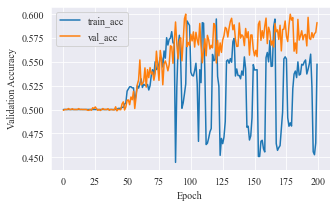

In [102]:
fig = plt.figure(figsize=(5,3))
plt.plot(smooth_curve(logs['val_acc_w'][:200], factor = 0), label = 'train_acc')
plt.plot(smooth_curve(logs['train_acc_w'][:200], factor = 0), label = 'val_acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
save_fig(fig, 'val_acc')

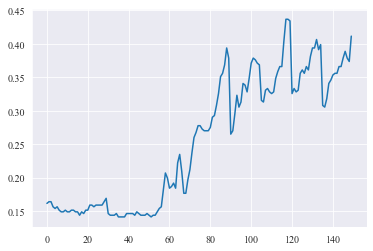

In [76]:
plt.plot(logs['val_acc_w'])

In [51]:
best

0.5896904720191234

In [58]:
model = torch.load('./model/w_43_base_self.model_best_f.model_61.7')

In [63]:
probs, pred = test_model(model, val_x)

In [68]:
model_infer(model, test_x)

0.09166666666666666

In [61]:
show_infer(probs)

M F 5 2 I
[[3, 7], [1, 12], [6, 7], [5, 10], [2, 9]]
5 9 1
6 12 0
1 12 F
6 11 9
5 8 Z
4 7 S
5 11 3
3 10 P
6 10 8
1 10 D
4 10 V
5 7 Y
5 7 Y
1 8 B
6 9 7
5 10 2
6 12 0
4 11 W
4 10 V
3 12 R
1 12 F
3 9 O
1 10 D
3 11 Q
4 9 U
1 9 C
1 11 E
4 11 W
3 7 M
3 10 P
4 10 V
1 11 E
5 8 Z
1 12 F
5 11 3
2 12 L
5 9 1
4 10 V
5 8 Z
2 12 L
4 8 T
4 10 V
5 10 2
6 11 9
4 7 S
4 10 V
1 12 F
2 12 L
5 10 2
2 10 J
4 7 S
2 7 G
1 9 C
3 11 Q
1 12 F
6 12 0
6 9 7
4 10 V
6 9 7
1 11 E
5 7 Y
5 9 1
6 12 0
3 12 R
3 10 P
3 11 Q
2 8 H
4 7 S
5 9 1
4 12 X
1 11 E
6 12 0
6 9 7
6 10 8
5 9 1
1 11 E
3 10 P
3 12 R
2 8 H
6 10 8
1 12 F
2 11 K
3 7 M
6 10 8
4 10 V
3 7 M
5 10 2
4 9 U
4 10 V
5 7 Y
6 10 8
3 9 O
4 9 U
2 7 G
2 10 J
2 9 I
5 11 3
3 9 O
3 9 O
2 8 H
3 10 P
4 8 T
6 12 0
2 12 L
2 12 L
5 9 1
3 8 N
1 9 C
3 8 N
5 8 Z
1 11 E
6 8 6
5 12 4
3 9 O
3 10 P
6 8 6
5 7 Y
5 11 3
3 9 O
5 9 1
3 9 O
1 11 E
3 10 P
3 11 Q
5 9 1
3 10 P
1 9 C
6 10 8
2 8 H
3 11 Q
5 10 2
1 10 D
2 11 K
1 7 A
5 8 Z
2 12 L
3 8 N
5 11 3
4 11 W
3 12 R
3 12 R
1 9 C
4 11 W
5 9 1


## Semi Infer

In [113]:
def training(model, train_loader, test_loader, optimizer, num_epoch = 10, lr = 1e-3,
                 if_save = False, save_path = './model', save_name = 'best.model',loss_func = nn.CrossEntropyLoss()):
    
#     optimizer = torch.optim.Adam(model.parameters(), lr = lr) # optim take charge of gradient descent
#     optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum=0.9)
    # log
#     mkdir_p(save_path)
    logs ={'time':[], 'train_loss': [], 'train_acc':[], 'val_loss':[], 'val_acc': [], 'train_acc_w':[], 'val_acc_w':[]}
    best = 0
    for epoch in range(num_epoch):
        epoch_start_time = time.time() 
        # renew normal samples in train_loader 
        train_loader.dataset.init_data()
        # train
        train_acc,train_acc_w, train_loss,_,probs = run_epoch(model, train_loader, loss_func, optimizer=optimizer, mode='train')
#         print(probs)
        # val
        val_acc, val_acc_w, val_loss, preds, _ = run_epoch(model, test_loader, loss_func)
#         print(preds)
        
        # print log
        logs['time'].append(time.time()-epoch_start_time)
        logs['train_acc'].append(train_acc)
        logs['train_loss'].append(train_loss)
        logs['val_acc'].append(val_acc)
        logs['val_loss'].append(val_loss) 
        logs['train_acc_w'].append(train_acc_w)
        logs['val_acc_w'].append(val_acc_w)

        acc_infer = model_infer(model, test_x)
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.5f Loss: %3.6f | Val Acc: %3.5f loss: %3.4f\n >                    Train Accw: %3.5f Val Accw: %3.5f' % \
                (epoch + 1, num_epoch,  logs['time'][-1], \
                train_acc , train_loss, val_acc, val_loss, train_acc_w, val_acc_w))
        if acc_infer > best:
            best = acc_infer
            if if_save:
                print("Saving with infer acc : {}".format(acc_infer))
                torch.save(model, os.path.join(save_path, f'{save_name}_best.model'))
    if if_save:
        np.save(os.path.join(save_path, f'{save_name}_best_log.npy'), logs)
    return best


In [114]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')
set_seed(0)
train_x = train_x[:, 40:,select_idx]
test_x = test_x[:,40:, select_idx]
train_x, train_y, val_x, val_y = random_split(train_x, train_y, split_rate=0.1)
idx = np.concatenate([np.where(train_y==0)[0][:500], np.where(train_y==1)[0]])
train_x = train_x[idx]
train_y = train_y[idx]
self_epoch = 100
batch_size = 16
train_test_x = train_x
train_test_y = train_y

# thredhold = 0.68
thredhold = 0.6
num_epoch = 15
lr = 1e-4
batch_size = 128

model = TSModel(input_dim=len(select_idx)).to(DEVICE)

loss = nn.CrossEntropyLoss()

In [115]:
best = 0
for epoch in range(self_epoch):
    print("===================")
    train_set = EggTSTDataset(train_test_x, y = train_test_y)
    val_set = EggTSTDataset(val_x, y = val_y)
    train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
    adam = torch.optim.Adam(model.parameters(), lr = lr)
    val_acc = training(model, train_loader, val_loader, adam, num_epoch = num_epoch, loss_func=loss,lr = lr, if_save = True, save_name = 'w_43_base_self_infer')
    # add no label data
    best_model = torch.load('./model/w_43_base_self_infer_best.model')
    if best < val_acc:
        best = val_acc
        print("Self savning ", best)
        torch.save(best_model, './model/w_43_base_self_infer_best_f.model')
    probs,preds = test_model(best_model, test_x)
    probs = probs.max(axis =1)
    add_x =  test_x[probs >thredhold]
    add_y = preds[probs>thredhold]
    train_test_x = np.concatenate([train_x, add_x])
    train_test_y = np.concatenate([train_y, add_y])
    print("Add number of data : ", len(add_x), len(add_y))
    model = torch.load('./model/w_43_base_self_infer_best_f.model')

[001/015] 0.14 sec(s) Train Acc: 0.51483 Loss: 0.692798 | Val Acc: 0.16414 loss: 0.7083
 >                    Train Accw: 0.50468 Val Accw: 0.51184
Saving with infer acc : 0.08541666666666667
[002/015] 0.13 sec(s) Train Acc: 0.52057 Loss: 0.692888 | Val Acc: 0.16414 loss: 0.7074
 >                    Train Accw: 0.51047 Val Accw: 0.53401
[003/015] 0.12 sec(s) Train Acc: 0.51388 Loss: 0.692607 | Val Acc: 0.15909 loss: 0.7078
 >                    Train Accw: 0.49400 Val Accw: 0.51493
[004/015] 0.12 sec(s) Train Acc: 0.51675 Loss: 0.692064 | Val Acc: 0.15152 loss: 0.7087
 >                    Train Accw: 0.49450 Val Accw: 0.51157
[005/015] 0.12 sec(s) Train Acc: 0.51866 Loss: 0.691911 | Val Acc: 0.14899 loss: 0.7110
 >                    Train Accw: 0.49949 Val Accw: 0.51043
[006/015] 0.12 sec(s) Train Acc: 0.51770 Loss: 0.691960 | Val Acc: 0.15152 loss: 0.7129
 >                    Train Accw: 0.49891 Val Accw: 0.51153
[007/015] 0.12 sec(s) Train Acc: 0.52249 Loss: 0.691609 | Val Acc: 0

[008/015] 0.12 sec(s) Train Acc: 0.53397 Loss: 0.688690 | Val Acc: 0.22727 loss: 0.7184
 >                    Train Accw: 0.51679 Val Accw: 0.53851
Saving with infer acc : 0.09791666666666667
[009/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.688858 | Val Acc: 0.23737 loss: 0.7182
 >                    Train Accw: 0.51036 Val Accw: 0.53758
[010/015] 0.13 sec(s) Train Acc: 0.53780 Loss: 0.688106 | Val Acc: 0.26263 loss: 0.7182
 >                    Train Accw: 0.51902 Val Accw: 0.54758
[011/015] 0.13 sec(s) Train Acc: 0.54545 Loss: 0.687956 | Val Acc: 0.28030 loss: 0.7177
 >                    Train Accw: 0.53491 Val Accw: 0.55545
[012/015] 0.12 sec(s) Train Acc: 0.55024 Loss: 0.688077 | Val Acc: 0.29545 loss: 0.7169
 >                    Train Accw: 0.54322 Val Accw: 0.56224
[013/015] 0.12 sec(s) Train Acc: 0.55311 Loss: 0.688077 | Val Acc: 0.31313 loss: 0.7162
 >                    Train Accw: 0.54645 Val Accw: 0.56472
[014/015] 0.13 sec(s) Train Acc: 0.54258 Loss: 0.687382 | Val Acc: 0

 >                    Train Accw: 0.49714 Val Accw: 0.51153
Saving with infer acc : 0.1
[002/015] 0.12 sec(s) Train Acc: 0.52632 Loss: 0.689990 | Val Acc: 0.15404 loss: 0.7233
 >                    Train Accw: 0.50520 Val Accw: 0.51268
[003/015] 0.12 sec(s) Train Acc: 0.52249 Loss: 0.689468 | Val Acc: 0.15657 loss: 0.7234
 >                    Train Accw: 0.50724 Val Accw: 0.52518
[004/015] 0.12 sec(s) Train Acc: 0.52727 Loss: 0.689853 | Val Acc: 0.15909 loss: 0.7237
 >                    Train Accw: 0.50235 Val Accw: 0.52633
[005/015] 0.12 sec(s) Train Acc: 0.51866 Loss: 0.689321 | Val Acc: 0.16162 loss: 0.7247
 >                    Train Accw: 0.49505 Val Accw: 0.52743
[006/015] 0.13 sec(s) Train Acc: 0.53301 Loss: 0.688621 | Val Acc: 0.15909 loss: 0.7265
 >                    Train Accw: 0.52187 Val Accw: 0.52633
[007/015] 0.13 sec(s) Train Acc: 0.53110 Loss: 0.688687 | Val Acc: 0.16414 loss: 0.7267
 >                    Train Accw: 0.51363 Val Accw: 0.52862
[008/015] 0.12 sec(s) Tr

[010/015] 0.12 sec(s) Train Acc: 0.53684 Loss: 0.687618 | Val Acc: 0.23737 loss: 0.7217
 >                    Train Accw: 0.51665 Val Accw: 0.55420
[011/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.688139 | Val Acc: 0.23990 loss: 0.7222
 >                    Train Accw: 0.52010 Val Accw: 0.54992
[012/015] 0.12 sec(s) Train Acc: 0.52727 Loss: 0.688587 | Val Acc: 0.22980 loss: 0.7248
 >                    Train Accw: 0.51421 Val Accw: 0.54537
[013/015] 0.12 sec(s) Train Acc: 0.52919 Loss: 0.687998 | Val Acc: 0.23990 loss: 0.7247
 >                    Train Accw: 0.51552 Val Accw: 0.54992
[014/015] 0.13 sec(s) Train Acc: 0.54641 Loss: 0.687544 | Val Acc: 0.23990 loss: 0.7250
 >                    Train Accw: 0.52934 Val Accw: 0.54996
[015/015] 0.13 sec(s) Train Acc: 0.54641 Loss: 0.687394 | Val Acc: 0.24495 loss: 0.7260
 >                    Train Accw: 0.53802 Val Accw: 0.55217
Add number of data :  0 0
[001/015] 0.12 sec(s) Train Acc: 0.52057 Loss: 0.690157 | Val Acc: 0.15152 loss: 0.722

[003/015] 0.13 sec(s) Train Acc: 0.52344 Loss: 0.689928 | Val Acc: 0.16162 loss: 0.7252
 >                    Train Accw: 0.50334 Val Accw: 0.52743
Saving with infer acc : 0.09791666666666667
[004/015] 0.13 sec(s) Train Acc: 0.52632 Loss: 0.689353 | Val Acc: 0.16919 loss: 0.7243
 >                    Train Accw: 0.50562 Val Accw: 0.53087
[005/015] 0.12 sec(s) Train Acc: 0.52344 Loss: 0.689601 | Val Acc: 0.16162 loss: 0.7269
 >                    Train Accw: 0.49964 Val Accw: 0.51608
[006/015] 0.13 sec(s) Train Acc: 0.51866 Loss: 0.688990 | Val Acc: 0.15909 loss: 0.7267
 >                    Train Accw: 0.49915 Val Accw: 0.51501
[007/015] 0.13 sec(s) Train Acc: 0.53206 Loss: 0.688741 | Val Acc: 0.16919 loss: 0.7276
 >                    Train Accw: 0.49843 Val Accw: 0.51948
[008/015] 0.12 sec(s) Train Acc: 0.52344 Loss: 0.688235 | Val Acc: 0.17929 loss: 0.7247
 >                    Train Accw: 0.49978 Val Accw: 0.51680
Saving with infer acc : 0.1
[009/015] 0.13 sec(s) Train Acc: 0.53397

[012/015] 0.13 sec(s) Train Acc: 0.54258 Loss: 0.687655 | Val Acc: 0.32828 loss: 0.7193
 >                    Train Accw: 0.51751 Val Accw: 0.58242
[013/015] 0.13 sec(s) Train Acc: 0.54545 Loss: 0.687059 | Val Acc: 0.35859 loss: 0.7160
 >                    Train Accw: 0.52617 Val Accw: 0.57793
[014/015] 0.12 sec(s) Train Acc: 0.55120 Loss: 0.686403 | Val Acc: 0.35354 loss: 0.7164
 >                    Train Accw: 0.53755 Val Accw: 0.57572
[015/015] 0.13 sec(s) Train Acc: 0.55885 Loss: 0.686495 | Val Acc: 0.34848 loss: 0.7170
 >                    Train Accw: 0.53588 Val Accw: 0.57342
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.53493 Loss: 0.690010 | Val Acc: 0.15152 loss: 0.7227
 >                    Train Accw: 0.51382 Val Accw: 0.51153
Saving with infer acc : 0.1
[002/015] 0.13 sec(s) Train Acc: 0.52919 Loss: 0.689589 | Val Acc: 0.15909 loss: 0.7216
 >                    Train Accw: 0.50322 Val Accw: 0.52633
[003/015] 0.13 sec(s) Train Acc: 0.53014 Loss: 0.689855 | 

[006/015] 0.13 sec(s) Train Acc: 0.53206 Loss: 0.689099 | Val Acc: 0.20960 loss: 0.7183
 >                    Train Accw: 0.51536 Val Accw: 0.54179
[007/015] 0.12 sec(s) Train Acc: 0.52536 Loss: 0.689384 | Val Acc: 0.20707 loss: 0.7191
 >                    Train Accw: 0.50370 Val Accw: 0.54065
[008/015] 0.13 sec(s) Train Acc: 0.52440 Loss: 0.688810 | Val Acc: 0.21465 loss: 0.7208
 >                    Train Accw: 0.51179 Val Accw: 0.54413
[009/015] 0.13 sec(s) Train Acc: 0.53493 Loss: 0.688350 | Val Acc: 0.23232 loss: 0.7221
 >                    Train Accw: 0.51225 Val Accw: 0.55203
[010/015] 0.12 sec(s) Train Acc: 0.53493 Loss: 0.688099 | Val Acc: 0.24747 loss: 0.7216
 >                    Train Accw: 0.51152 Val Accw: 0.55891
[011/015] 0.12 sec(s) Train Acc: 0.53301 Loss: 0.688020 | Val Acc: 0.28030 loss: 0.7201
 >                    Train Accw: 0.51640 Val Accw: 0.57358
[012/015] 0.13 sec(s) Train Acc: 0.54641 Loss: 0.687528 | Val Acc: 0.28030 loss: 0.7211
 >                    Tr

[001/015] 0.13 sec(s) Train Acc: 0.52536 Loss: 0.689613 | Val Acc: 0.15657 loss: 0.7203
 >                    Train Accw: 0.50280 Val Accw: 0.52518
Saving with infer acc : 0.10416666666666667
[002/015] 0.13 sec(s) Train Acc: 0.51866 Loss: 0.689271 | Val Acc: 0.16414 loss: 0.7213
 >                    Train Accw: 0.49497 Val Accw: 0.52854
[003/015] 0.14 sec(s) Train Acc: 0.52440 Loss: 0.689474 | Val Acc: 0.15909 loss: 0.7244
 >                    Train Accw: 0.50251 Val Accw: 0.52633
[004/015] 0.12 sec(s) Train Acc: 0.52727 Loss: 0.689935 | Val Acc: 0.16667 loss: 0.7235
 >                    Train Accw: 0.51599 Val Accw: 0.52973
[005/015] 0.13 sec(s) Train Acc: 0.52632 Loss: 0.689139 | Val Acc: 0.16162 loss: 0.7256
 >                    Train Accw: 0.50536 Val Accw: 0.52747
[006/015] 0.13 sec(s) Train Acc: 0.52919 Loss: 0.688654 | Val Acc: 0.15909 loss: 0.7267
 >                    Train Accw: 0.50398 Val Accw: 0.51497
[007/015] 0.13 sec(s) Train Acc: 0.52727 Loss: 0.688487 | Val Acc: 0

[010/015] 0.12 sec(s) Train Acc: 0.54258 Loss: 0.688078 | Val Acc: 0.27273 loss: 0.7190
 >                    Train Accw: 0.52776 Val Accw: 0.55744
[011/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.687546 | Val Acc: 0.32071 loss: 0.7175
 >                    Train Accw: 0.55164 Val Accw: 0.57902
[012/015] 0.12 sec(s) Train Acc: 0.54928 Loss: 0.687353 | Val Acc: 0.34848 loss: 0.7173
 >                    Train Accw: 0.54085 Val Accw: 0.59148
[013/015] 0.13 sec(s) Train Acc: 0.55789 Loss: 0.686514 | Val Acc: 0.34343 loss: 0.7205
 >                    Train Accw: 0.53158 Val Accw: 0.58922
[014/015] 0.13 sec(s) Train Acc: 0.55120 Loss: 0.686380 | Val Acc: 0.32828 loss: 0.7228
 >                    Train Accw: 0.54325 Val Accw: 0.58957
[015/015] 0.12 sec(s) Train Acc: 0.54641 Loss: 0.686374 | Val Acc: 0.29545 loss: 0.7264
 >                    Train Accw: 0.54611 Val Accw: 0.57482
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.52153 Loss: 0.689598 | Val Acc: 0.18182 loss: 0.718

[004/015] 0.12 sec(s) Train Acc: 0.52823 Loss: 0.689396 | Val Acc: 0.18182 loss: 0.7225
 >                    Train Accw: 0.50819 Val Accw: 0.52930
Saving with infer acc : 0.09375
[005/015] 0.13 sec(s) Train Acc: 0.53110 Loss: 0.689144 | Val Acc: 0.19192 loss: 0.7234
 >                    Train Accw: 0.51567 Val Accw: 0.53376
[006/015] 0.13 sec(s) Train Acc: 0.51675 Loss: 0.689266 | Val Acc: 0.19444 loss: 0.7236
 >                    Train Accw: 0.49322 Val Accw: 0.53491
[007/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.688884 | Val Acc: 0.20707 loss: 0.7224
 >                    Train Accw: 0.52734 Val Accw: 0.54065
[008/015] 0.12 sec(s) Train Acc: 0.51675 Loss: 0.688491 | Val Acc: 0.24495 loss: 0.7196
 >                    Train Accw: 0.50606 Val Accw: 0.55209
[009/015] 0.13 sec(s) Train Acc: 0.53876 Loss: 0.687986 | Val Acc: 0.27273 loss: 0.7199
 >                    Train Accw: 0.52482 Val Accw: 0.56462
[010/015] 0.13 sec(s) Train Acc: 0.53684 Loss: 0.687894 | Val Acc: 0.27778 loss:

[013/015] 0.12 sec(s) Train Acc: 0.54450 Loss: 0.686961 | Val Acc: 0.30808 loss: 0.7177
 >                    Train Accw: 0.54021 Val Accw: 0.56610
[014/015] 0.12 sec(s) Train Acc: 0.53589 Loss: 0.687569 | Val Acc: 0.32828 loss: 0.7169
 >                    Train Accw: 0.52771 Val Accw: 0.55894
[015/015] 0.12 sec(s) Train Acc: 0.55311 Loss: 0.686149 | Val Acc: 0.33586 loss: 0.7165
 >                    Train Accw: 0.55385 Val Accw: 0.49551
Add number of data :  0 0
[001/015] 0.12 sec(s) Train Acc: 0.51962 Loss: 0.690419 | Val Acc: 0.16667 loss: 0.7198
 >                    Train Accw: 0.50088 Val Accw: 0.52969
Saving with infer acc : 0.1
[002/015] 0.13 sec(s) Train Acc: 0.52536 Loss: 0.689868 | Val Acc: 0.18939 loss: 0.7180
 >                    Train Accw: 0.50164 Val Accw: 0.53266
Saving with infer acc : 0.10208333333333333
[003/015] 0.12 sec(s) Train Acc: 0.53206 Loss: 0.689260 | Val Acc: 0.18939 loss: 0.7193
 >                    Train Accw: 0.51670 Val Accw: 0.53266
[004/015] 0.12

[007/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.688533 | Val Acc: 0.19192 loss: 0.7262
 >                    Train Accw: 0.51551 Val Accw: 0.54099
[008/015] 0.12 sec(s) Train Acc: 0.53397 Loss: 0.688021 | Val Acc: 0.19949 loss: 0.7274
 >                    Train Accw: 0.51420 Val Accw: 0.53725
[009/015] 0.12 sec(s) Train Acc: 0.53780 Loss: 0.687735 | Val Acc: 0.20960 loss: 0.7281
 >                    Train Accw: 0.51992 Val Accw: 0.54175
[010/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.687175 | Val Acc: 0.22222 loss: 0.7288
 >                    Train Accw: 0.52316 Val Accw: 0.54749
[011/015] 0.12 sec(s) Train Acc: 0.53301 Loss: 0.687333 | Val Acc: 0.23232 loss: 0.7298
 >                    Train Accw: 0.51699 Val Accw: 0.55203
[012/015] 0.13 sec(s) Train Acc: 0.54163 Loss: 0.686943 | Val Acc: 0.26263 loss: 0.7286
 >                    Train Accw: 0.53015 Val Accw: 0.56567
[013/015] 0.13 sec(s) Train Acc: 0.53493 Loss: 0.687178 | Val Acc: 0.28283 loss: 0.7268
 >                    Tr

[001/015] 0.13 sec(s) Train Acc: 0.51292 Loss: 0.690082 | Val Acc: 0.16162 loss: 0.7226
 >                    Train Accw: 0.50114 Val Accw: 0.52743
Saving with infer acc : 0.09375
[002/015] 0.12 sec(s) Train Acc: 0.53014 Loss: 0.689422 | Val Acc: 0.16667 loss: 0.7229
 >                    Train Accw: 0.51285 Val Accw: 0.52973
[003/015] 0.14 sec(s) Train Acc: 0.52536 Loss: 0.689337 | Val Acc: 0.17677 loss: 0.7217
 >                    Train Accw: 0.51185 Val Accw: 0.53419
Saving with infer acc : 0.1
[004/015] 0.13 sec(s) Train Acc: 0.52919 Loss: 0.688756 | Val Acc: 0.19697 loss: 0.7198
 >                    Train Accw: 0.51317 Val Accw: 0.53606
[005/015] 0.12 sec(s) Train Acc: 0.52536 Loss: 0.688887 | Val Acc: 0.19949 loss: 0.7203
 >                    Train Accw: 0.50746 Val Accw: 0.53720
[006/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.688284 | Val Acc: 0.20455 loss: 0.7210
 >                    Train Accw: 0.51663 Val Accw: 0.53950
[007/015] 0.12 sec(s) Train Acc: 0.53684 Loss: 0.688

[010/015] 0.14 sec(s) Train Acc: 0.53876 Loss: 0.687782 | Val Acc: 0.24747 loss: 0.7250
 >                    Train Accw: 0.52672 Val Accw: 0.55879
[011/015] 0.13 sec(s) Train Acc: 0.53493 Loss: 0.687334 | Val Acc: 0.28030 loss: 0.7222
 >                    Train Accw: 0.51808 Val Accw: 0.56810
[012/015] 0.13 sec(s) Train Acc: 0.54833 Loss: 0.686906 | Val Acc: 0.28030 loss: 0.7235
 >                    Train Accw: 0.52913 Val Accw: 0.56810
[013/015] 0.13 sec(s) Train Acc: 0.55981 Loss: 0.686293 | Val Acc: 0.29798 loss: 0.7234
 >                    Train Accw: 0.53932 Val Accw: 0.57605
[014/015] 0.13 sec(s) Train Acc: 0.55311 Loss: 0.686231 | Val Acc: 0.32323 loss: 0.7222
 >                    Train Accw: 0.53850 Val Accw: 0.57462
Saving with infer acc : 0.09791666666666667
[015/015] 0.13 sec(s) Train Acc: 0.55502 Loss: 0.686142 | Val Acc: 0.32323 loss: 0.7231
 >                    Train Accw: 0.53385 Val Accw: 0.56375
Add number of data :  11 11
[001/015] 0.14 sec(s) Train Acc: 0.52652

[004/015] 0.13 sec(s) Train Acc: 0.52919 Loss: 0.689444 | Val Acc: 0.19192 loss: 0.7208
 >                    Train Accw: 0.49972 Val Accw: 0.53380
[005/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.689223 | Val Acc: 0.19949 loss: 0.7213
 >                    Train Accw: 0.52051 Val Accw: 0.53720
[006/015] 0.12 sec(s) Train Acc: 0.52919 Loss: 0.688054 | Val Acc: 0.21970 loss: 0.7204
 >                    Train Accw: 0.50834 Val Accw: 0.54626
[007/015] 0.12 sec(s) Train Acc: 0.52249 Loss: 0.689059 | Val Acc: 0.24747 loss: 0.7206
 >                    Train Accw: 0.50139 Val Accw: 0.55879
[008/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.688803 | Val Acc: 0.25505 loss: 0.7226
 >                    Train Accw: 0.51533 Val Accw: 0.55680
[009/015] 0.12 sec(s) Train Acc: 0.53780 Loss: 0.687926 | Val Acc: 0.27525 loss: 0.7221
 >                    Train Accw: 0.49186 Val Accw: 0.56593
[010/015] 0.12 sec(s) Train Acc: 0.54833 Loss: 0.687175 | Val Acc: 0.31061 loss: 0.7190
 >                    Tr

[013/015] 0.12 sec(s) Train Acc: 0.54278 Loss: 0.684844 | Val Acc: 0.26263 loss: 0.7336
 >                    Train Accw: 0.52109 Val Accw: 0.56559
Saving with infer acc : 0.09166666666666666
[014/015] 0.12 sec(s) Train Acc: 0.53802 Loss: 0.684749 | Val Acc: 0.27273 loss: 0.7348
 >                    Train Accw: 0.54075 Val Accw: 0.57010
[015/015] 0.12 sec(s) Train Acc: 0.55228 Loss: 0.683776 | Val Acc: 0.27525 loss: 0.7359
 >                    Train Accw: 0.53504 Val Accw: 0.57124
Add number of data :  36 36
[001/015] 0.13 sec(s) Train Acc: 0.54024 Loss: 0.686006 | Val Acc: 0.16414 loss: 0.7248
 >                    Train Accw: 0.50605 Val Accw: 0.52858
Saving with infer acc : 0.09166666666666666
[002/015] 0.13 sec(s) Train Acc: 0.53377 Loss: 0.685342 | Val Acc: 0.16667 loss: 0.7289
 >                    Train Accw: 0.50019 Val Accw: 0.52254
[003/015] 0.13 sec(s) Train Acc: 0.53932 Loss: 0.684775 | Val Acc: 0.16919 loss: 0.7330
 >                    Train Accw: 0.50706 Val Accw: 0.52

[007/015] 0.12 sec(s) Train Acc: 0.52727 Loss: 0.688268 | Val Acc: 0.17172 loss: 0.7300
 >                    Train Accw: 0.51404 Val Accw: 0.53198
[008/015] 0.13 sec(s) Train Acc: 0.53876 Loss: 0.687856 | Val Acc: 0.18182 loss: 0.7277
 >                    Train Accw: 0.52486 Val Accw: 0.52930
[009/015] 0.13 sec(s) Train Acc: 0.54928 Loss: 0.687590 | Val Acc: 0.19949 loss: 0.7272
 >                    Train Accw: 0.53276 Val Accw: 0.53729
[010/015] 0.12 sec(s) Train Acc: 0.53301 Loss: 0.687964 | Val Acc: 0.21212 loss: 0.7261
 >                    Train Accw: 0.50744 Val Accw: 0.53755
[011/015] 0.13 sec(s) Train Acc: 0.54928 Loss: 0.687758 | Val Acc: 0.24747 loss: 0.7235
 >                    Train Accw: 0.52299 Val Accw: 0.55340
[012/015] 0.13 sec(s) Train Acc: 0.54258 Loss: 0.687342 | Val Acc: 0.25758 loss: 0.7212
 >                    Train Accw: 0.52091 Val Accw: 0.55072
Saving with infer acc : 0.09583333333333334
[013/015] 0.13 sec(s) Train Acc: 0.56172 Loss: 0.686547 | Val Acc: 0

[002/015] 0.13 sec(s) Train Acc: 0.52536 Loss: 0.689930 | Val Acc: 0.16414 loss: 0.7220
 >                    Train Accw: 0.51377 Val Accw: 0.52858
[003/015] 0.12 sec(s) Train Acc: 0.51770 Loss: 0.689214 | Val Acc: 0.15909 loss: 0.7253
 >                    Train Accw: 0.49853 Val Accw: 0.52633
Saving with infer acc : 0.1
[004/015] 0.12 sec(s) Train Acc: 0.52536 Loss: 0.689351 | Val Acc: 0.16414 loss: 0.7255
 >                    Train Accw: 0.50469 Val Accw: 0.52858
[005/015] 0.13 sec(s) Train Acc: 0.52344 Loss: 0.689151 | Val Acc: 0.17172 loss: 0.7250
 >                    Train Accw: 0.49938 Val Accw: 0.53198
[006/015] 0.13 sec(s) Train Acc: 0.51866 Loss: 0.688646 | Val Acc: 0.18687 loss: 0.7249
 >                    Train Accw: 0.49554 Val Accw: 0.53155
[007/015] 0.13 sec(s) Train Acc: 0.53971 Loss: 0.687925 | Val Acc: 0.19697 loss: 0.7249
 >                    Train Accw: 0.51925 Val Accw: 0.53606
[008/015] 0.13 sec(s) Train Acc: 0.52440 Loss: 0.688551 | Val Acc: 0.19444 loss: 0.7

[010/015] 0.13 sec(s) Train Acc: 0.53537 Loss: 0.687936 | Val Acc: 0.22222 loss: 0.7257
 >                    Train Accw: 0.51533 Val Accw: 0.54749
[011/015] 0.12 sec(s) Train Acc: 0.54111 Loss: 0.687119 | Val Acc: 0.23990 loss: 0.7260
 >                    Train Accw: 0.52311 Val Accw: 0.54996
[012/015] 0.12 sec(s) Train Acc: 0.55163 Loss: 0.686967 | Val Acc: 0.25758 loss: 0.7264
 >                    Train Accw: 0.53172 Val Accw: 0.55791
[013/015] 0.13 sec(s) Train Acc: 0.54015 Loss: 0.686673 | Val Acc: 0.25758 loss: 0.7291
 >                    Train Accw: 0.51654 Val Accw: 0.55791
[014/015] 0.12 sec(s) Train Acc: 0.54015 Loss: 0.686436 | Val Acc: 0.24495 loss: 0.7329
 >                    Train Accw: 0.53312 Val Accw: 0.55225
[015/015] 0.13 sec(s) Train Acc: 0.54685 Loss: 0.685912 | Val Acc: 0.25000 loss: 0.7354
 >                    Train Accw: 0.52025 Val Accw: 0.55459
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.52632 Loss: 0.690001 | Val Acc: 0.16162 loss: 0.722

[003/015] 0.13 sec(s) Train Acc: 0.52727 Loss: 0.689289 | Val Acc: 0.16667 loss: 0.7235
 >                    Train Accw: 0.51087 Val Accw: 0.52973
[004/015] 0.13 sec(s) Train Acc: 0.52153 Loss: 0.688858 | Val Acc: 0.18687 loss: 0.7225
 >                    Train Accw: 0.50161 Val Accw: 0.53151
[005/015] 0.14 sec(s) Train Acc: 0.52919 Loss: 0.688943 | Val Acc: 0.19697 loss: 0.7221
 >                    Train Accw: 0.50335 Val Accw: 0.53606
Saving with infer acc : 0.09166666666666666
[006/015] 0.13 sec(s) Train Acc: 0.54258 Loss: 0.688542 | Val Acc: 0.20455 loss: 0.7210
 >                    Train Accw: 0.52906 Val Accw: 0.53950
[007/015] 0.13 sec(s) Train Acc: 0.53589 Loss: 0.688471 | Val Acc: 0.20707 loss: 0.7228
 >                    Train Accw: 0.51188 Val Accw: 0.54069
Saving with infer acc : 0.09375
[008/015] 0.14 sec(s) Train Acc: 0.52440 Loss: 0.688588 | Val Acc: 0.18939 loss: 0.7263
 >                    Train Accw: 0.50690 Val Accw: 0.53266
[009/015] 0.14 sec(s) Train Acc: 0.5

[011/015] 0.13 sec(s) Train Acc: 0.53897 Loss: 0.685800 | Val Acc: 0.25758 loss: 0.7307
 >                    Train Accw: 0.52202 Val Accw: 0.56338
[012/015] 0.12 sec(s) Train Acc: 0.53802 Loss: 0.685434 | Val Acc: 0.27778 loss: 0.7317
 >                    Train Accw: 0.51057 Val Accw: 0.57243
[013/015] 0.14 sec(s) Train Acc: 0.54848 Loss: 0.684200 | Val Acc: 0.29545 loss: 0.7308
 >                    Train Accw: 0.54185 Val Accw: 0.57490
[014/015] 0.13 sec(s) Train Acc: 0.54848 Loss: 0.684170 | Val Acc: 0.32323 loss: 0.7303
 >                    Train Accw: 0.52860 Val Accw: 0.58192
[015/015] 0.13 sec(s) Train Acc: 0.55323 Loss: 0.683691 | Val Acc: 0.31566 loss: 0.7328
 >                    Train Accw: 0.53808 Val Accw: 0.58396
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.52344 Loss: 0.689685 | Val Acc: 0.16414 loss: 0.7211
 >                    Train Accw: 0.50371 Val Accw: 0.52854
Saving with infer acc : 0.10416666666666667
[002/015] 0.12 sec(s) Train Acc: 0.52344 L

[005/015] 0.13 sec(s) Train Acc: 0.52919 Loss: 0.688603 | Val Acc: 0.17929 loss: 0.7248
 >                    Train Accw: 0.51336 Val Accw: 0.53534
[006/015] 0.12 sec(s) Train Acc: 0.51675 Loss: 0.689300 | Val Acc: 0.18687 loss: 0.7245
 >                    Train Accw: 0.50440 Val Accw: 0.53870
[007/015] 0.12 sec(s) Train Acc: 0.53397 Loss: 0.688124 | Val Acc: 0.18687 loss: 0.7262
 >                    Train Accw: 0.51768 Val Accw: 0.53870
[008/015] 0.12 sec(s) Train Acc: 0.52057 Loss: 0.688535 | Val Acc: 0.18434 loss: 0.7297
 >                    Train Accw: 0.50372 Val Accw: 0.53759
[009/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.687371 | Val Acc: 0.17677 loss: 0.7329
 >                    Train Accw: 0.52201 Val Accw: 0.53423
[010/015] 0.12 sec(s) Train Acc: 0.53301 Loss: 0.687010 | Val Acc: 0.18182 loss: 0.7317
 >                    Train Accw: 0.51243 Val Accw: 0.53649
[011/015] 0.12 sec(s) Train Acc: 0.52632 Loss: 0.687793 | Val Acc: 0.18434 loss: 0.7323
 >                    Tr

[014/015] 0.13 sec(s) Train Acc: 0.55694 Loss: 0.686599 | Val Acc: 0.32576 loss: 0.7182
 >                    Train Accw: 0.54518 Val Accw: 0.50187
Saving with infer acc : 0.09583333333333334
[015/015] 0.12 sec(s) Train Acc: 0.55502 Loss: 0.686062 | Val Acc: 0.33081 loss: 0.7188
 >                    Train Accw: 0.54915 Val Accw: 0.49698
Add number of data :  3 3
[001/015] 0.13 sec(s) Train Acc: 0.52958 Loss: 0.689290 | Val Acc: 0.15909 loss: 0.7214
 >                    Train Accw: 0.50785 Val Accw: 0.52633
Saving with infer acc : 0.09791666666666667
[002/015] 0.12 sec(s) Train Acc: 0.53912 Loss: 0.689204 | Val Acc: 0.17677 loss: 0.7208
 >                    Train Accw: 0.52121 Val Accw: 0.52701
[003/015] 0.13 sec(s) Train Acc: 0.52672 Loss: 0.689051 | Val Acc: 0.17172 loss: 0.7235
 >                    Train Accw: 0.51402 Val Accw: 0.52479
[004/015] 0.13 sec(s) Train Acc: 0.53435 Loss: 0.688146 | Val Acc: 0.17172 loss: 0.7256
 >                    Train Accw: 0.50959 Val Accw: 0.5247

[007/015] 0.12 sec(s) Train Acc: 0.52536 Loss: 0.688765 | Val Acc: 0.18434 loss: 0.7246
 >                    Train Accw: 0.50571 Val Accw: 0.53759
[008/015] 0.12 sec(s) Train Acc: 0.53110 Loss: 0.687998 | Val Acc: 0.19697 loss: 0.7233
 >                    Train Accw: 0.51482 Val Accw: 0.53606
[009/015] 0.12 sec(s) Train Acc: 0.53301 Loss: 0.688388 | Val Acc: 0.23485 loss: 0.7222
 >                    Train Accw: 0.50371 Val Accw: 0.55318
[010/015] 0.12 sec(s) Train Acc: 0.53780 Loss: 0.687106 | Val Acc: 0.24747 loss: 0.7207
 >                    Train Accw: 0.51673 Val Accw: 0.55883
[011/015] 0.12 sec(s) Train Acc: 0.54928 Loss: 0.687330 | Val Acc: 0.26768 loss: 0.7204
 >                    Train Accw: 0.53159 Val Accw: 0.56074
[012/015] 0.13 sec(s) Train Acc: 0.53301 Loss: 0.688043 | Val Acc: 0.28788 loss: 0.7190
 >                    Train Accw: 0.51760 Val Accw: 0.55893
[013/015] 0.12 sec(s) Train Acc: 0.54641 Loss: 0.687286 | Val Acc: 0.28788 loss: 0.7202
 >                    Tr

[001/015] 0.13 sec(s) Train Acc: 0.53206 Loss: 0.689389 | Val Acc: 0.15909 loss: 0.7212
 >                    Train Accw: 0.51138 Val Accw: 0.52633
Saving with infer acc : 0.09791666666666667
[002/015] 0.12 sec(s) Train Acc: 0.52057 Loss: 0.689597 | Val Acc: 0.15657 loss: 0.7242
 >                    Train Accw: 0.50433 Val Accw: 0.52518
Saving with infer acc : 0.1
[003/015] 0.12 sec(s) Train Acc: 0.52440 Loss: 0.689063 | Val Acc: 0.16162 loss: 0.7246
 >                    Train Accw: 0.49937 Val Accw: 0.52743
[004/015] 0.12 sec(s) Train Acc: 0.52919 Loss: 0.688889 | Val Acc: 0.17424 loss: 0.7237
 >                    Train Accw: 0.50887 Val Accw: 0.53313
[005/015] 0.12 sec(s) Train Acc: 0.53206 Loss: 0.688965 | Val Acc: 0.18182 loss: 0.7223
 >                    Train Accw: 0.51149 Val Accw: 0.52926
[006/015] 0.13 sec(s) Train Acc: 0.53301 Loss: 0.688891 | Val Acc: 0.20202 loss: 0.7206
 >                    Train Accw: 0.51158 Val Accw: 0.53835
[007/015] 0.12 sec(s) Train Acc: 0.53971

[009/015] 0.13 sec(s) Train Acc: 0.53589 Loss: 0.688099 | Val Acc: 0.25505 loss: 0.7214
 >                    Train Accw: 0.50806 Val Accw: 0.55676
[010/015] 0.13 sec(s) Train Acc: 0.54833 Loss: 0.687602 | Val Acc: 0.26768 loss: 0.7213
 >                    Train Accw: 0.53234 Val Accw: 0.56245
[011/015] 0.13 sec(s) Train Acc: 0.54354 Loss: 0.687344 | Val Acc: 0.27778 loss: 0.7230
 >                    Train Accw: 0.52004 Val Accw: 0.56696
[012/015] 0.13 sec(s) Train Acc: 0.53780 Loss: 0.687321 | Val Acc: 0.27778 loss: 0.7241
 >                    Train Accw: 0.51414 Val Accw: 0.56696
[013/015] 0.13 sec(s) Train Acc: 0.54545 Loss: 0.687331 | Val Acc: 0.26010 loss: 0.7263
 >                    Train Accw: 0.53244 Val Accw: 0.55897
[014/015] 0.12 sec(s) Train Acc: 0.55694 Loss: 0.686441 | Val Acc: 0.26263 loss: 0.7265
 >                    Train Accw: 0.53942 Val Accw: 0.56012
[015/015] 0.12 sec(s) Train Acc: 0.55024 Loss: 0.686690 | Val Acc: 0.25505 loss: 0.7279
 >                    Tr

[003/015] 0.12 sec(s) Train Acc: 0.52249 Loss: 0.689577 | Val Acc: 0.18687 loss: 0.7198
 >                    Train Accw: 0.49609 Val Accw: 0.53151
[004/015] 0.12 sec(s) Train Acc: 0.51579 Loss: 0.689244 | Val Acc: 0.19949 loss: 0.7190
 >                    Train Accw: 0.49497 Val Accw: 0.53720
[005/015] 0.13 sec(s) Train Acc: 0.53397 Loss: 0.688460 | Val Acc: 0.24242 loss: 0.7176
 >                    Train Accw: 0.51726 Val Accw: 0.55654
[006/015] 0.12 sec(s) Train Acc: 0.54067 Loss: 0.688894 | Val Acc: 0.26010 loss: 0.7174
 >                    Train Accw: 0.50604 Val Accw: 0.56448
[007/015] 0.13 sec(s) Train Acc: 0.53971 Loss: 0.688077 | Val Acc: 0.24747 loss: 0.7198
 >                    Train Accw: 0.51926 Val Accw: 0.55883
[008/015] 0.13 sec(s) Train Acc: 0.53971 Loss: 0.688641 | Val Acc: 0.27020 loss: 0.7177
 >                    Train Accw: 0.53329 Val Accw: 0.56356
[009/015] 0.12 sec(s) Train Acc: 0.52536 Loss: 0.688484 | Val Acc: 0.31061 loss: 0.7163
 >                    Tr

[012/015] 0.13 sec(s) Train Acc: 0.54163 Loss: 0.687878 | Val Acc: 0.30051 loss: 0.7207
 >                    Train Accw: 0.53923 Val Accw: 0.57716
[013/015] 0.13 sec(s) Train Acc: 0.54450 Loss: 0.687005 | Val Acc: 0.29293 loss: 0.7245
 >                    Train Accw: 0.53036 Val Accw: 0.57380
[014/015] 0.12 sec(s) Train Acc: 0.54545 Loss: 0.687483 | Val Acc: 0.28535 loss: 0.7273
 >                    Train Accw: 0.53540 Val Accw: 0.57036
[015/015] 0.13 sec(s) Train Acc: 0.54450 Loss: 0.685856 | Val Acc: 0.29293 loss: 0.7278
 >                    Train Accw: 0.52320 Val Accw: 0.57376
Add number of data :  0 0
[001/015] 0.13 sec(s) Train Acc: 0.51866 Loss: 0.690415 | Val Acc: 0.16414 loss: 0.7196
 >                    Train Accw: 0.50433 Val Accw: 0.52858
Saving with infer acc : 0.09375
[002/015] 0.14 sec(s) Train Acc: 0.53493 Loss: 0.690131 | Val Acc: 0.15657 loss: 0.7231
 >                    Train Accw: 0.51447 Val Accw: 0.51383
[003/015] 0.13 sec(s) Train Acc: 0.52727 Loss: 0.68968

# 通道选择

## Activation

In [45]:
def get_saliency_map(model, test_x, test_y):
    def normalize(x):
        return (x - x.min())/ (x.max() - x.min())
    if len(test_x.shape) == 2:
        test_x = test_x[np.newaxis, :]
        test_y = np.array([test_y])
    print(test_x.shape)
    model = model.to(DEVICE)
    x,y = torch.tensor(test_x).to(DEVICE, torch.float32),torch.tensor(test_y).to(DEVICE, torch.long)
    model.train()
    loss=nn.CrossEntropyLoss()
    x.requires_grad = True
    pred = model(x)
    l = loss(pred, y)
    l.backward()
    x_grad = np.abs(x.grad.cpu()).numpy()
    x_grad = np.array([normalize(np.abs(g)) for g in x_grad])
    return np.squeeze(x_grad)

In [46]:
model = torch.load('./model/w_43_base.model_best.model')

In [47]:
train_x = np.load('./data/train_x_ts_w_43.npy')
train_y = np.load('./data/train_y_ts_w_43.npy')
test_x = np.load('./data/test_x_ts_w_43.npy')

In [48]:
def normalize(x):
    return (x - x.min())/ (x.max() - x.min())
x,y = torch.tensor(train_x).to(DEVICE, torch.float32),torch.tensor(train_y).to(DEVICE, torch.long)
model.train()
loss=nn.CrossEntropyLoss()
x.requires_grad = True
pred = model(x)
l = loss(pred, y)
l.backward()
x_grad = np.abs(x.grad.cpu()).numpy()
x_grad = np.array([normalize(np.abs(g)) for g in x_grad])

In [54]:
# np.save('./x_grad.npy', x_grad)

In [61]:
x_grad_t = x_grad[:int(len(x_grad)/5)]

In [62]:
x_grad_t.mean(axis = 0).shape

(75, 20)

In [73]:
select_idx = x_grad.mean(axis=1).mean(axis=0).argsort()[-15:]

In [75]:
select_idx = np.array([ 9, 18,  7,  4,  5,  8, 19,  2,  6, 11, 16,  1,  0, 13,  3])

In [124]:
facs = x_grad.mean(axis=1).mean(axis=0)
idx = np.ones(20,dtype=np.int16)
idx[select_idx] = 0
facs[idx==1] = facs[idx==1]-0.015

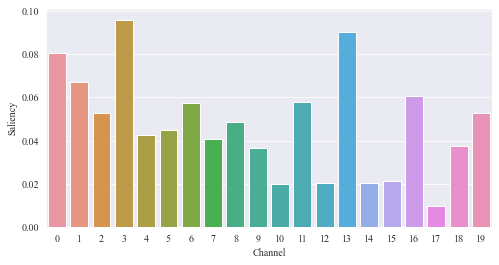

In [125]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x=list(range(20)), y = facs)
plt.xlabel('Channel')
plt.ylabel('Saliency')
save_fig(fig, 'sal_fac')

In [ ]:
def get_activation_img(x_grad_t, return_mtx = True):
    img = np.zeros((x_grad_t.shape[1],20,3))
    bound = int(len(x_grad_t)/3)
    fig = plt.figure(figsize=(10,6))
    img[:,:,0] = x_grad_t[:bound,:,:].mean(0)
    img[:,:,1] = x_grad_t[bound:bound*2,:,:].mean(0)
    img[:,:,2] = x_grad_t[bound*2:bound*3,:,:].mean(0)
    
    plt.imshow(img.transpose(1,0,2)+0.2,interpolation='nearest', cmap='Blues')
    if return_mtx:
        return fig, img
    return fig
    

In [68]:
sns.set_style('dark')

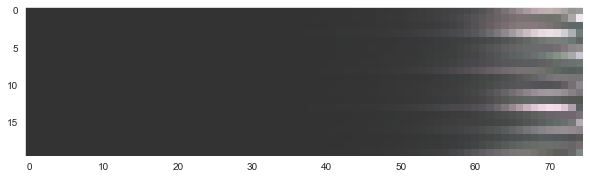

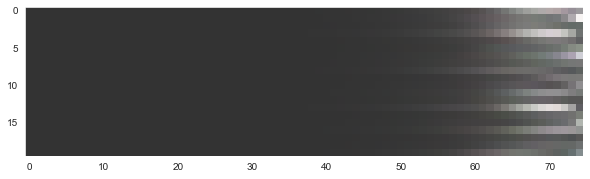

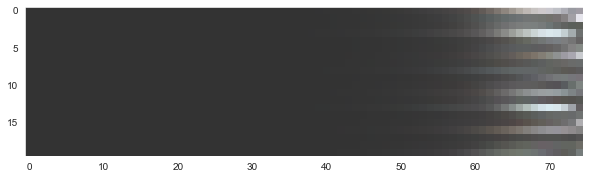

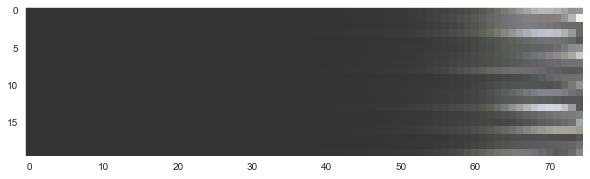

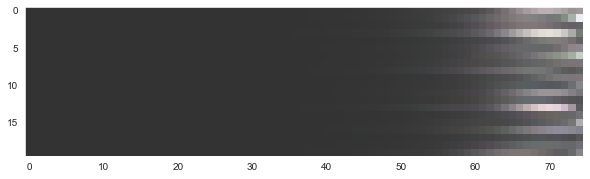

In [69]:
bound = int(len(x_grad)/5)
for i in range(5):
    x_grad_t = x_grad[bound*i:bound*(i+1)]
    fig = get_activation_img(x_grad_t)

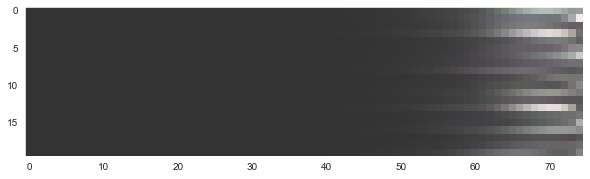

In [70]:
fig = get_activation_img(x_grad[:,:,:])

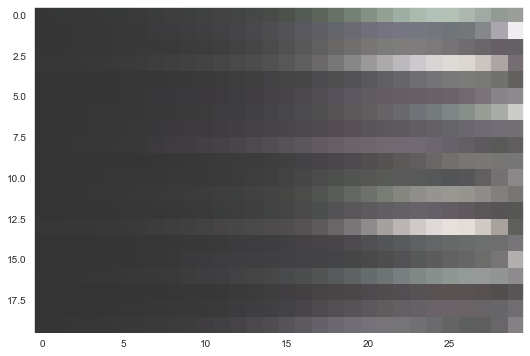

In [71]:
fig, mtx = get_activation_img(x_grad[:,45:,:], return_mtx=True)

In [ ]:
# np.save('./mtx.npy', mtx)

## 相关性

In [127]:
train_x = np.load('./data/train_x_tst.npy')
train_y = np.load('./data/train_y_tst.npy')

In [128]:
df = pd.DataFrame(train_x)

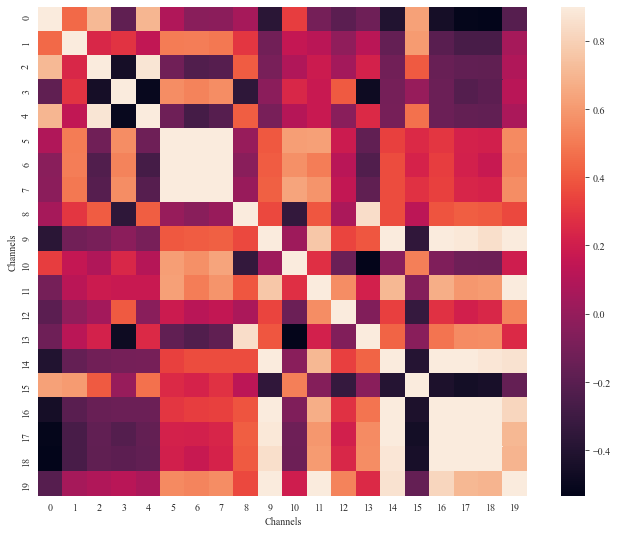

In [132]:
corr = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corr, vmax=0.9,square=True)
plt.xlabel('Channels')
plt.ylabel('Channels')
save_fig(fig, 'cor_mtx')

## 画图

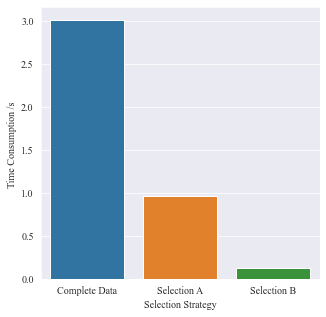

In [53]:
# 训练时间对比
training_time = [3.01,  0.96, 0.12]
names = ['Complete Data', 'Selection A', 'Selection B']
fig = plt.figure(figsize=(5,5))
sns.barplot(x = names, y = training_time)
plt.xlabel('Selection Strategy')
plt.ylabel('Time Consumption /s ')
save_fig(fig, 'time_consum')

In [191]:

def al_u(y_t, beta):
    return (1-y_t)**beta

def al2_u(y_t, beta):
    return (np.exp(1-y_t))**beta

def al3_u(y_t, beta):
    return (np.exp(1-y_t)-1)**beta

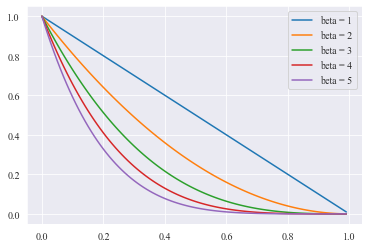

In [192]:
y_t = np.arange(0,1,0.01)
plt.plot(al_u(y_t,1),label = 'beta = 1')
plt.plot(al_u(y_t,2),label = 'beta = 2')
plt.plot(al_u(y_t,3),label = 'beta = 3')
plt.plot(al_u(y_t,4),label = 'beta = 4')
plt.plot(al_u(y_t,5),label = 'beta = 5')
plt.xticks(range(0,101,20), [x/10 for x in np.arange(0,11,2)])
plt.legend()

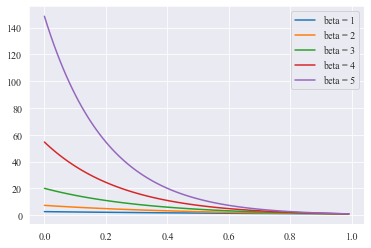

In [193]:
y_t = np.arange(0,1,0.01)
plt.plot(al2_u(y_t,1),label = 'beta = 1')
plt.plot(al2_u(y_t,2),label = 'beta = 2')
plt.plot(al2_u(y_t,3),label = 'beta = 3')
plt.plot(al2_u(y_t,4),label = 'beta = 4')
plt.plot(al2_u(y_t,5),label = 'beta = 5')
plt.xticks(range(0,101,20), [x/10 for x in np.arange(0,11,2)])
plt.legend()

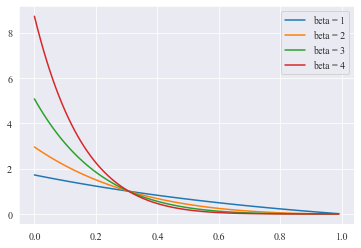

In [197]:
y_t = np.arange(0,1,0.01)
plt.plot(al3_u(y_t,1),label = 'beta = 1')
plt.plot(al3_u(y_t,2),label = 'beta = 2')
plt.plot(al3_u(y_t,3),label = 'beta = 3')
plt.plot(al3_u(y_t,4),label = 'beta = 4')

plt.xticks(range(0,101,20), [x/10 for x in np.arange(0,11,2)])
plt.legend()

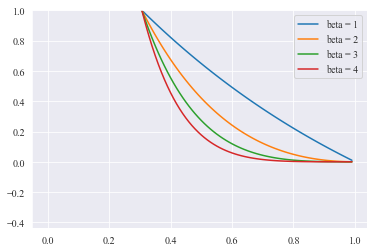

In [207]:
y_t = np.arange(0,1,0.01)
plt.plot(al3_u(y_t,1),label = 'beta = 1')
plt.plot(al3_u(y_t,2),label = 'beta = 2')
plt.plot(al3_u(y_t,3),label = 'beta = 3')
plt.plot(al3_u(y_t,4),label = 'beta = 4')
# plt.xlim(xmin = 50, xmax=100)
plt.ylim(ymax=1)
plt.xticks(range(0,101,20), [x/10 for x in np.arange(0,11,2)])
plt.legend()

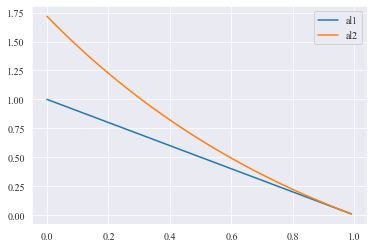

In [211]:
y_t = np.arange(0,1,0.01)
plt.plot(al_u(y_t,1),label = 'al1')
plt.plot(al3_u(y_t,1),label = 'al2')
plt.xticks(range(0,101,20), [x/10 for x in np.arange(0,11,2)])
plt.legend()